# INTEGRATE on ESBJERG data

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # #%load_ext autoreload
    # # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True

Notebook detected. Parallel processing is OK


Getting data for case: ESBJERG
--> Got data for case: ESBJERG
Using data file: ESBJERG_ALL.h5
Using GEX file: TX07_20230906_2x4_RC20-33.gex
f_data_h5=ESBJERG_ALL.h5


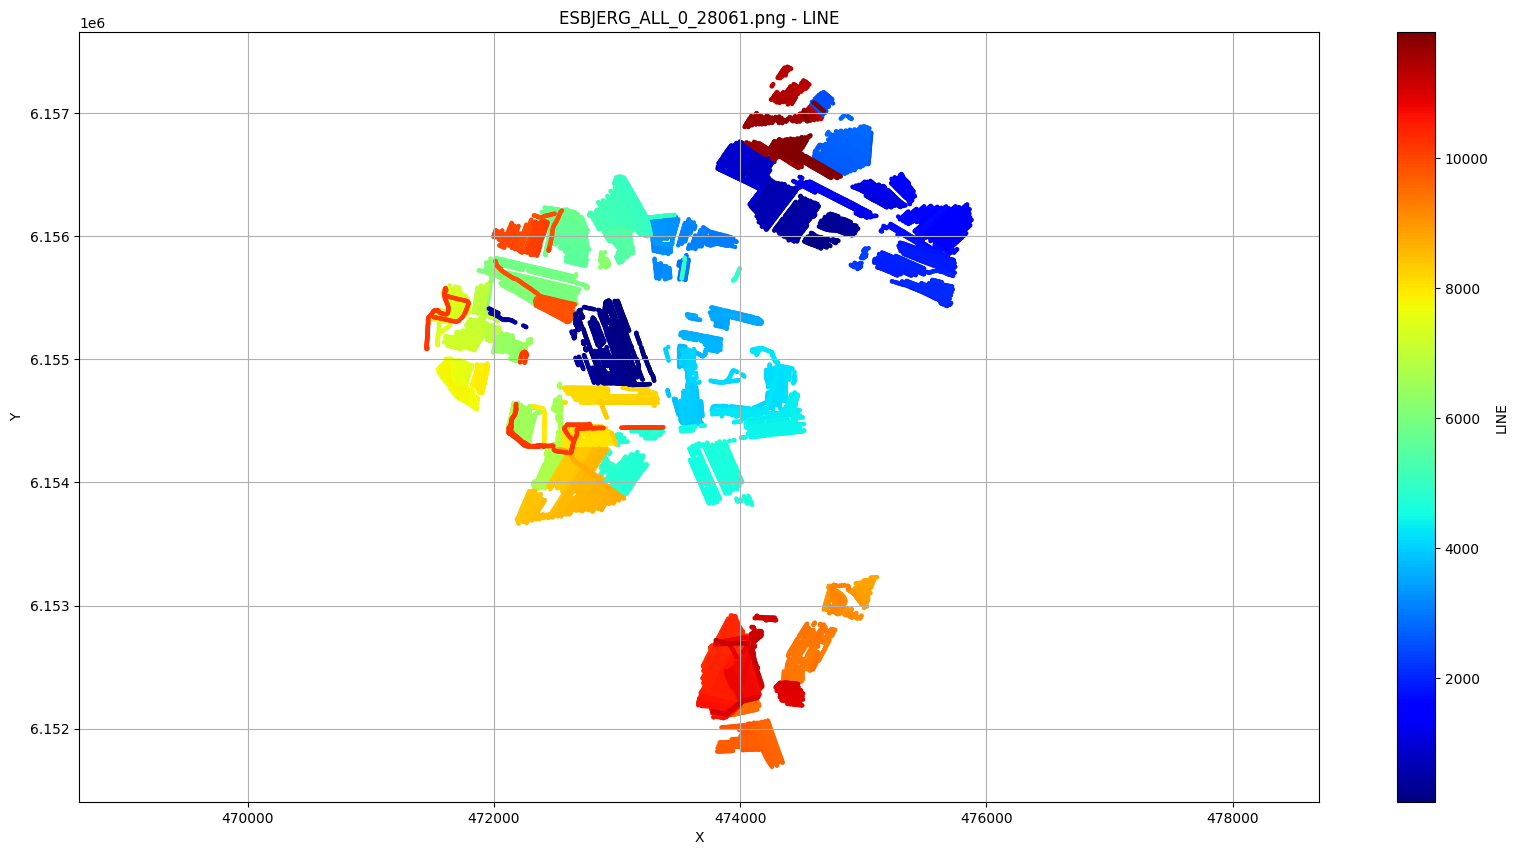

In [3]:
N=5000000
N=50000
case = 'ESBJERG'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

ig.plot_geometry(f_data_h5, pl='LINE')
X, Y, LINE, ELEVATION = ig.get_geometry(f_data_h5)

## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:

# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=500)
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='uniform', NLAY_min=1, NLAY_max=8, RHO_min=1, RHO_max=500)

# Plot some summary statistics of the prior model
#ig.plot_prior_stats(f_prior_h5)

prior_layered:   0%|                                                                                      | 0/50000 [00:00<?, ?it/s]

prior_layered:   0%|                                                                                      | 0/50000 [00:00<?, ?it/s]

### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

In [5]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)

Creating a copy of PRIOR_UNIFORM_NL_1-8_log-uniform_N50000.h5
                as PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5
prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                           | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   2%|█▋                                                                                | 33/1563 [00:01<00:47, 32.53it/s]

gatdaem1d:   3%|██▏                                                                               | 42/1563 [00:01<00:36, 41.69it/s]

gatdaem1d:   2%|█▋                                                                                | 32/1563 [00:01<00:48, 31.71it/s]

gatdaem1d:   2%|█▋                                                                                | 31/1563 [00:01<00:49, 30.96it/s]

gatdaem1d:   2%|█▊                                                                                | 34/1563 [00:01<00:45, 33.39it/s]

gatdaem1d:   3%|██▏                                                                               | 42/1562 [00:01<00:36, 41.68it/s]

gatdaem1d:   3%|██▌                                                                               | 50/1562 [00:01<00:30, 49.86it/s]

gatdaem1d:   2%|█▋                                                                                | 31/1563 [00:01<00:50, 30.50it/s]

gatdaem1d:   2%|█▎                                                                                | 25/1562 [00:01<01:02, 24.78it/s]

gatdaem1d:   3%|██▎                                                                               | 43/1562 [00:01<00:35, 42.42it/s]

gatdaem1d:   2%|█▋                                                                                | 32/1563 [00:01<00:47, 31.97it/s]

gatdaem1d:   2%|█▋                                                                                | 31/1562 [00:01<00:50, 30.36it/s]

gatdaem1d:   3%|██▏                                                                               | 42/1562 [00:01<00:37, 40.94it/s]

gatdaem1d:   2%|█▋                                                                                | 33/1562 [00:01<00:47, 32.16it/s]

gatdaem1d:   3%|██▎                                                                               | 44/1563 [00:01<00:35, 43.15it/s]

gatdaem1d:   2%|█▋                                                                                | 31/1562 [00:01<00:49, 30.71it/s]

gatdaem1d:   2%|█▎                                                                                | 26/1562 [00:01<00:59, 25.95it/s]

gatdaem1d:   2%|█▋                                                                                | 32/1563 [00:01<00:47, 31.91it/s]

gatdaem1d:   2%|█▋                                                                                | 31/1563 [00:01<00:50, 30.50it/s]

gatdaem1d:   3%|██                                                                                | 40/1563 [00:01<00:38, 39.55it/s]

gatdaem1d:   3%|██▎                                                                               | 43/1562 [00:01<00:35, 42.65it/s]

gatdaem1d:   3%|██▎                                                                               | 43/1562 [00:01<00:35, 42.33it/s]

gatdaem1d:   2%|█▋                                                                                | 32/1563 [00:01<00:48, 31.30it/s]

gatdaem1d:   3%|██▏                                                                               | 41/1562 [00:01<00:37, 40.87it/s]

gatdaem1d:   3%|██▎                                                                               | 43/1563 [00:01<00:35, 42.37it/s]

gatdaem1d:   3%|██▏                                                                               | 42/1562 [00:01<00:36, 41.46it/s]

gatdaem1d:   3%|██                                                                                | 40/1562 [00:01<00:38, 39.54it/s]

gatdaem1d:   2%|█▎                                                                                | 26/1563 [00:01<01:00, 25.45it/s]

gatdaem1d:   2%|█▊                                                                                | 35/1563 [00:01<00:44, 34.53it/s]

gatdaem1d:   3%|██▏                                                                               | 42/1562 [00:01<00:36, 41.69it/s]

gatdaem1d:   1%|█▏                                                                                | 23/1563 [00:01<01:09, 22.28it/s]

gatdaem1d:   2%|█▎                                                                                | 26/1562 [00:01<01:00, 25.48it/s]

gatdaem1d:   4%|███▎                                                                              | 63/1563 [00:02<00:47, 31.39it/s]

gatdaem1d:   5%|███▉                                                                              | 76/1563 [00:02<00:38, 38.31it/s]

gatdaem1d:   5%|████▍                                                                             | 85/1562 [00:02<00:35, 42.03it/s]

gatdaem1d:   5%|████▍                                                                             | 84/1562 [00:02<00:35, 41.40it/s]

gatdaem1d:   4%|███▌                                                                              | 67/1562 [00:02<00:45, 33.21it/s]

gatdaem1d:   4%|███▎                                                                              | 62/1562 [00:02<00:49, 30.42it/s]

gatdaem1d:   4%|███▎                                                                              | 63/1563 [00:02<00:48, 30.97it/s]

gatdaem1d:   4%|███▍                                                                              | 66/1563 [00:02<00:45, 32.55it/s]

gatdaem1d:   4%|███▍                                                                              | 66/1563 [00:02<00:47, 31.79it/s]

gatdaem1d:   4%|██▉                                                                               | 55/1562 [00:02<00:55, 27.36it/s]

gatdaem1d:   6%|████▌                                                                             | 86/1562 [00:02<00:35, 41.91it/s]

gatdaem1d:   6%|████▌                                                                             | 88/1563 [00:02<00:34, 42.65it/s]

gatdaem1d:   4%|███▍                                                                              | 65/1563 [00:02<00:46, 32.16it/s]

gatdaem1d:   3%|██▋                                                                               | 52/1562 [00:02<00:59, 25.56it/s]

gatdaem1d:   4%|███▎                                                                              | 62/1562 [00:02<00:49, 30.05it/s]

gatdaem1d:   5%|████▏                                                                             | 81/1563 [00:02<00:36, 40.21it/s]

gatdaem1d:   4%|███▎                                                                              | 64/1563 [00:02<00:48, 30.79it/s]

gatdaem1d:   4%|███▍                                                                              | 66/1563 [00:02<00:44, 33.65it/s]

gatdaem1d:   5%|████▍                                                                             | 84/1562 [00:02<00:35, 41.24it/s]

gatdaem1d:   6%|████▌                                                                             | 86/1563 [00:02<00:35, 41.97it/s]

gatdaem1d:   5%|████▎                                                                             | 81/1562 [00:02<00:37, 39.77it/s]

gatdaem1d:   4%|███▎                                                                              | 63/1563 [00:02<00:46, 32.37it/s]

gatdaem1d:   5%|████▍                                                                             | 84/1562 [00:02<00:35, 41.17it/s]

gatdaem1d:   4%|███▍                                                                              | 66/1563 [00:02<00:46, 32.26it/s]

gatdaem1d:   6%|████▌                                                                             | 86/1562 [00:02<00:35, 41.20it/s]

gatdaem1d:   6%|████▌                                                                             | 86/1562 [00:02<00:35, 41.06it/s]

gatdaem1d:   4%|███▋                                                                              | 70/1563 [00:02<00:45, 32.94it/s]

gatdaem1d:   3%|██▋                                                                               | 52/1562 [00:02<01:02, 24.14it/s]

gatdaem1d:   5%|████▍                                                                             | 84/1563 [00:02<00:40, 36.49it/s]

gatdaem1d:   6%|█████▏                                                                           | 100/1562 [00:02<00:33, 43.16it/s]

gatdaem1d:   4%|███▎                                                                              | 62/1563 [00:02<00:55, 27.00it/s]

gatdaem1d:   5%|████▎                                                                             | 82/1562 [00:02<00:44, 33.24it/s]

gatdaem1d:   6%|█████                                                                             | 96/1563 [00:03<00:46, 31.86it/s]

gatdaem1d:   8%|██████▌                                                                          | 126/1562 [00:03<00:34, 41.55it/s]

gatdaem1d:   7%|█████▎                                                                           | 103/1562 [00:03<00:41, 35.12it/s]

gatdaem1d:   6%|████▉                                                                             | 94/1563 [00:03<00:47, 30.77it/s]

gatdaem1d:   7%|█████▌                                                                           | 107/1563 [00:03<00:40, 36.01it/s]

gatdaem1d:   8%|██████▋                                                                          | 128/1562 [00:03<00:34, 41.96it/s]

gatdaem1d:   6%|█████▏                                                                            | 98/1563 [00:03<00:46, 31.62it/s]

gatdaem1d:   6%|████▌                                                                             | 86/1562 [00:03<00:51, 28.80it/s]

gatdaem1d:   8%|██████▎                                                                          | 123/1563 [00:03<00:35, 40.78it/s]

gatdaem1d:   8%|██████▋                                                                          | 128/1562 [00:03<00:34, 41.11it/s]

gatdaem1d:   7%|█████▌                                                                           | 108/1563 [00:03<00:39, 37.29it/s]

gatdaem1d:   5%|████▎                                                                             | 81/1562 [00:03<00:55, 26.80it/s]

gatdaem1d:   8%|██████▌                                                                          | 126/1562 [00:03<00:34, 41.22it/s]

gatdaem1d:   6%|█████▏                                                                            | 98/1563 [00:03<00:44, 33.26it/s]

gatdaem1d:   8%|██████▋                                                                          | 128/1563 [00:03<00:34, 41.56it/s]

gatdaem1d:   8%|██████▌                                                                          | 127/1562 [00:03<00:34, 41.55it/s]

gatdaem1d:   6%|█████▏                                                                           | 101/1562 [00:03<00:45, 32.22it/s]

gatdaem1d:   6%|█████▏                                                                            | 99/1563 [00:03<00:45, 31.86it/s]

gatdaem1d:   8%|██████▎                                                                          | 121/1562 [00:03<00:36, 38.95it/s]

gatdaem1d:   6%|█████▏                                                                            | 98/1563 [00:03<00:46, 31.21it/s]

gatdaem1d:   7%|█████▎                                                                           | 103/1563 [00:03<00:44, 32.75it/s]

gatdaem1d:   5%|████▎                                                                             | 82/1562 [00:03<00:55, 26.59it/s]

gatdaem1d:   6%|████▉                                                                             | 95/1563 [00:03<00:50, 28.87it/s]

gatdaem1d:   7%|█████▉                                                                           | 115/1563 [00:03<00:41, 35.01it/s]

gatdaem1d:   6%|████▉                                                                             | 93/1562 [00:03<00:51, 28.44it/s]

gatdaem1d:   8%|██████▋                                                                          | 128/1562 [00:03<00:37, 38.72it/s]

gatdaem1d:   9%|███████▍                                                                         | 144/1562 [00:03<00:33, 42.70it/s]

gatdaem1d:   7%|█████▍                                                                           | 106/1563 [00:03<00:42, 33.95it/s]

gatdaem1d:   8%|██████▊                                                                          | 131/1563 [00:03<00:38, 37.10it/s]

gatdaem1d:   8%|██████▋                                                                          | 128/1562 [00:03<00:39, 36.04it/s]

gatdaem1d:   7%|██████                                                                           | 117/1562 [00:03<00:44, 32.44it/s]

gatdaem1d:   8%|██████▎                                                                          | 121/1563 [00:03<00:45, 31.61it/s]

gatdaem1d:   8%|██████▌                                                                          | 126/1563 [00:04<00:46, 31.15it/s]

gatdaem1d:  11%|████████▋                                                                        | 168/1562 [00:04<00:33, 41.34it/s]

gatdaem1d:  10%|███████▊                                                                         | 150/1563 [00:04<00:36, 38.42it/s]

gatdaem1d:  11%|████████▊                                                                        | 170/1562 [00:04<00:33, 41.62it/s]

gatdaem1d:   7%|██████                                                                           | 117/1562 [00:04<00:49, 29.45it/s]

gatdaem1d:   8%|██████▋                                                                          | 128/1563 [00:04<00:46, 31.17it/s]

gatdaem1d:   8%|██████▋                                                                          | 130/1563 [00:04<00:45, 31.31it/s]

gatdaem1d:   7%|█████▊                                                                           | 113/1562 [00:04<00:50, 28.74it/s]

gatdaem1d:  11%|████████▌                                                                        | 165/1563 [00:04<00:34, 40.93it/s]

gatdaem1d:  11%|████████▊                                                                        | 171/1562 [00:04<00:32, 42.46it/s]

gatdaem1d:   9%|██████▉                                                                          | 134/1562 [00:04<00:44, 32.38it/s]

gatdaem1d:  11%|████████▊                                                                        | 170/1563 [00:04<00:33, 41.49it/s]

gatdaem1d:  11%|████████▊                                                                        | 170/1562 [00:04<00:34, 40.58it/s]

gatdaem1d:   9%|███████▏                                                                         | 139/1562 [00:04<00:41, 33.90it/s]

gatdaem1d:   9%|███████▎                                                                         | 140/1563 [00:04<00:40, 35.25it/s]

gatdaem1d:  11%|████████▊                                                                        | 169/1562 [00:04<00:33, 41.09it/s]

gatdaem1d:   8%|██████▊                                                                          | 132/1563 [00:04<00:44, 32.14it/s]

gatdaem1d:   8%|██████▊                                                                          | 132/1563 [00:04<00:43, 32.57it/s]

gatdaem1d:   9%|███████▌                                                                         | 146/1563 [00:04<00:39, 35.97it/s]

gatdaem1d:   7%|█████▉                                                                           | 114/1562 [00:04<00:50, 28.44it/s]

gatdaem1d:   9%|███████                                                                          | 136/1563 [00:04<00:42, 33.22it/s]

gatdaem1d:   8%|██████▍                                                                          | 124/1562 [00:04<00:49, 29.13it/s]

gatdaem1d:  11%|████████▊                                                                        | 170/1562 [00:04<00:34, 39.83it/s]

gatdaem1d:   9%|███████▌                                                                         | 147/1563 [00:04<00:39, 36.31it/s]

gatdaem1d:  12%|█████████▋                                                                       | 187/1562 [00:04<00:32, 42.29it/s]

gatdaem1d:   9%|███████                                                                          | 136/1563 [00:04<00:46, 30.88it/s]

gatdaem1d:  10%|███████▊                                                                         | 151/1563 [00:04<00:42, 33.24it/s]

gatdaem1d:  10%|████████▎                                                                        | 160/1562 [00:04<00:40, 34.25it/s]

gatdaem1d:  10%|████████▏                                                                        | 157/1563 [00:04<00:42, 33.00it/s]

gatdaem1d:  10%|███████▊                                                                         | 150/1562 [00:04<00:44, 31.89it/s]

gatdaem1d:  11%|████████▊                                                                        | 169/1563 [00:04<00:40, 34.54it/s]

gatdaem1d:  11%|████████▌                                                                        | 165/1562 [00:04<00:40, 34.10it/s]

gatdaem1d:  10%|████████▏                                                                        | 159/1563 [00:05<00:44, 31.58it/s]

gatdaem1d:   9%|███████▌                                                                         | 147/1562 [00:05<00:47, 29.55it/s]

gatdaem1d:  12%|█████████▉                                                                       | 192/1563 [00:05<00:34, 39.40it/s]

gatdaem1d:  10%|████████▎                                                                        | 161/1563 [00:05<00:44, 31.58it/s]

gatdaem1d:  10%|████████▍                                                                        | 162/1563 [00:05<00:44, 31.37it/s]

gatdaem1d:   9%|███████▌                                                                         | 145/1562 [00:05<00:47, 29.78it/s]

gatdaem1d:  13%|██████████▋                                                                      | 207/1563 [00:05<00:33, 41.02it/s]

gatdaem1d:  13%|██████████▉                                                                      | 210/1562 [00:05<00:33, 40.52it/s]

gatdaem1d:  14%|██████████▉                                                                      | 212/1562 [00:05<00:33, 40.79it/s]

gatdaem1d:  12%|█████████▍                                                                       | 183/1563 [00:05<00:36, 37.79it/s]

gatdaem1d:  14%|██████████▉                                                                      | 211/1562 [00:05<00:32, 41.21it/s]

gatdaem1d:  14%|██████████▉                                                                      | 212/1563 [00:05<00:33, 40.89it/s]

gatdaem1d:  11%|████████▌                                                                        | 165/1563 [00:05<00:43, 32.13it/s]

gatdaem1d:  12%|█████████▋                                                                       | 188/1563 [00:05<00:36, 37.95it/s]

gatdaem1d:  11%|█████████                                                                        | 176/1563 [00:05<00:39, 35.51it/s]

gatdaem1d:  11%|████████▋                                                                        | 167/1562 [00:05<00:44, 31.26it/s]

gatdaem1d:  10%|███████▉                                                                         | 153/1562 [00:05<00:44, 31.95it/s]

gatdaem1d:  10%|████████▍                                                                        | 163/1562 [00:05<00:43, 32.32it/s]

gatdaem1d:  12%|█████████▊                                                                       | 189/1563 [00:05<00:35, 38.28it/s]

gatdaem1d:  11%|████████▌                                                                        | 165/1563 [00:05<00:45, 30.87it/s]

gatdaem1d:  11%|████████▉                                                                        | 173/1562 [00:05<00:43, 31.60it/s]

gatdaem1d:  11%|█████████▏                                                                       | 178/1563 [00:05<00:40, 34.60it/s]

gatdaem1d:  14%|██████████▉                                                                      | 212/1562 [00:05<00:36, 37.39it/s]

gatdaem1d:  15%|███████████▉                                                                     | 230/1562 [00:05<00:32, 41.23it/s]

gatdaem1d:  14%|███████████                                                                      | 214/1562 [00:05<00:36, 37.39it/s]

gatdaem1d:  13%|██████████▉                                                                      | 210/1562 [00:05<00:36, 36.75it/s]

gatdaem1d:  12%|█████████▌                                                                       | 185/1563 [00:05<00:44, 31.30it/s]

gatdaem1d:  12%|██████████                                                                       | 195/1562 [00:05<00:41, 32.90it/s]

gatdaem1d:  13%|██████████▋                                                                      | 207/1562 [00:05<00:37, 36.62it/s]

gatdaem1d:  12%|█████████▍                                                                       | 183/1562 [00:05<00:43, 31.83it/s]

gatdaem1d:  12%|█████████▉                                                                       | 191/1563 [00:05<00:42, 31.91it/s]

gatdaem1d:  13%|██████████▌                                                                      | 205/1563 [00:05<00:42, 31.99it/s]

gatdaem1d:  12%|█████████▍                                                                       | 181/1562 [00:06<00:44, 30.95it/s]

gatdaem1d:  15%|████████████                                                                     | 232/1563 [00:06<00:33, 39.41it/s]

gatdaem1d:  16%|████████████▉                                                                    | 249/1563 [00:06<00:31, 41.28it/s]

gatdaem1d:  12%|█████████▉                                                                       | 191/1563 [00:06<00:44, 31.10it/s]

gatdaem1d:  11%|█████████                                                                        | 175/1562 [00:06<00:46, 29.64it/s]

gatdaem1d:  12%|██████████                                                                       | 193/1563 [00:06<00:44, 31.02it/s]

gatdaem1d:  16%|█████████████▏                                                                   | 255/1562 [00:06<00:31, 41.32it/s]

gatdaem1d:  12%|██████████                                                                       | 194/1563 [00:06<00:44, 30.66it/s]

gatdaem1d:  16%|█████████████                                                                    | 253/1562 [00:06<00:31, 41.19it/s]

gatdaem1d:  13%|██████████▍                                                                      | 201/1563 [00:06<00:40, 33.34it/s]

gatdaem1d:  15%|███████████▊                                                                     | 227/1563 [00:06<00:34, 38.25it/s]

gatdaem1d:  14%|███████████▏                                                                     | 217/1563 [00:06<00:36, 37.19it/s]

gatdaem1d:  13%|██████████▋                                                                      | 206/1562 [00:06<00:40, 33.46it/s]

gatdaem1d:  13%|██████████▌                                                                      | 203/1562 [00:06<00:39, 34.65it/s]

gatdaem1d:  12%|█████████▋                                                                       | 186/1562 [00:06<00:43, 31.59it/s]

gatdaem1d:  14%|███████████▍                                                                     | 221/1563 [00:06<00:37, 35.80it/s]

gatdaem1d:  15%|███████████▉                                                                     | 231/1563 [00:06<00:33, 39.43it/s]

gatdaem1d:  14%|███████████                                                                      | 214/1562 [00:06<00:38, 34.57it/s]

gatdaem1d:  13%|██████████▌                                                                      | 205/1563 [00:06<00:40, 33.59it/s]

gatdaem1d:  16%|█████████████                                                                    | 251/1562 [00:06<00:34, 37.88it/s]

gatdaem1d:  16%|█████████████                                                                    | 251/1562 [00:06<00:35, 37.14it/s]

gatdaem1d:  14%|███████████                                                                      | 213/1563 [00:06<00:40, 33.66it/s]

gatdaem1d:  17%|██████████████                                                                   | 272/1562 [00:06<00:32, 40.09it/s]

gatdaem1d:  16%|█████████████                                                                    | 253/1563 [00:06<00:36, 36.28it/s]

gatdaem1d:  14%|███████████▏                                                                     | 217/1563 [00:06<00:43, 31.08it/s]

gatdaem1d:  16%|█████████████                                                                    | 251/1562 [00:06<00:33, 38.75it/s]

gatdaem1d:  14%|███████████▍                                                                     | 220/1562 [00:06<00:40, 33.41it/s]

gatdaem1d:  16%|████████████▊                                                                    | 248/1562 [00:06<00:37, 35.09it/s]

gatdaem1d:  15%|███████████▉                                                                     | 229/1562 [00:06<00:41, 31.87it/s]

gatdaem1d:  16%|█████████████                                                                    | 253/1562 [00:06<00:38, 33.99it/s]

gatdaem1d:  14%|███████████▌                                                                     | 224/1563 [00:06<00:43, 30.86it/s]

gatdaem1d:  15%|████████████▎                                                                    | 238/1563 [00:07<00:42, 31.43it/s]

gatdaem1d:  14%|███████████▌                                                                     | 222/1562 [00:07<00:39, 34.04it/s]

gatdaem1d:  14%|███████████▎                                                                     | 218/1562 [00:07<00:39, 33.95it/s]

gatdaem1d:  19%|███████████████                                                                  | 291/1563 [00:07<00:31, 40.80it/s]

gatdaem1d:  14%|███████████▋                                                                     | 226/1563 [00:07<00:42, 31.46it/s]

gatdaem1d:  14%|███████████▋                                                                     | 226/1563 [00:07<00:43, 31.05it/s]

gatdaem1d:  19%|███████████████▍                                                                 | 298/1562 [00:07<00:30, 41.60it/s]

gatdaem1d:  19%|███████████████▎                                                                 | 296/1562 [00:07<00:30, 41.62it/s]

gatdaem1d:  14%|███████████▌                                                                     | 223/1563 [00:07<00:44, 30.44it/s]

gatdaem1d:  17%|█████████████▉                                                                   | 268/1563 [00:07<00:33, 38.84it/s]

gatdaem1d:  15%|████████████▏                                                                    | 235/1563 [00:07<00:40, 32.83it/s]

gatdaem1d:  17%|█████████████▍                                                                   | 259/1563 [00:07<00:33, 38.46it/s]

gatdaem1d:  16%|████████████▋                                                                    | 244/1562 [00:07<00:36, 36.43it/s]

gatdaem1d:  17%|██████████████                                                                   | 272/1563 [00:07<00:35, 36.76it/s]

gatdaem1d:  16%|█████████████▎                                                                   | 257/1562 [00:07<00:35, 36.94it/s]

gatdaem1d:  19%|███████████████▏                                                                 | 292/1562 [00:07<00:32, 38.81it/s]

gatdaem1d:  15%|████████████▍                                                                    | 240/1562 [00:07<00:40, 32.25it/s]

gatdaem1d:  14%|███████████▎                                                                     | 218/1562 [00:07<00:43, 30.59it/s]

gatdaem1d:  15%|████████████▍                                                                    | 239/1563 [00:07<00:40, 32.93it/s]

gatdaem1d:  16%|█████████████▏                                                                   | 254/1563 [00:07<00:36, 35.65it/s]

gatdaem1d:  19%|███████████████▏                                                                 | 294/1563 [00:07<00:33, 37.52it/s]

gatdaem1d:  20%|████████████████▏                                                                | 313/1562 [00:07<00:31, 39.96it/s]

gatdaem1d:  17%|█████████████▎                                                                   | 258/1563 [00:07<00:38, 33.56it/s]

gatdaem1d:  19%|███████████████▏                                                                 | 293/1562 [00:07<00:32, 39.57it/s]

gatdaem1d:  17%|█████████████▍                                                                   | 260/1562 [00:07<00:36, 35.41it/s]

gatdaem1d:  17%|██████████████                                                                   | 271/1563 [00:07<00:36, 35.62it/s]

gatdaem1d:  19%|██████████████▉                                                                  | 289/1562 [00:07<00:37, 34.32it/s]

gatdaem1d:  16%|████████████▉                                                                    | 249/1563 [00:07<00:42, 30.78it/s]

gatdaem1d:  19%|███████████████▎                                                                 | 295/1562 [00:07<00:35, 36.13it/s]

gatdaem1d:  18%|██████████████▋                                                                  | 284/1562 [00:07<00:37, 33.65it/s]

gatdaem1d:  17%|█████████████▌                                                                   | 262/1562 [00:07<00:41, 31.06it/s]

gatdaem1d:  16%|█████████████▎                                                                   | 256/1563 [00:07<00:42, 30.82it/s]

gatdaem1d:  17%|█████████████▉                                                                   | 270/1563 [00:08<00:41, 31.36it/s]

gatdaem1d:  17%|█████████████▌                                                                   | 262/1562 [00:08<00:36, 35.68it/s]

gatdaem1d:  17%|█████████████▍                                                                   | 259/1562 [00:08<00:36, 36.17it/s]

gatdaem1d:  21%|█████████████████▏                                                               | 332/1563 [00:08<00:30, 40.70it/s]

gatdaem1d:  17%|█████████████▍                                                                   | 259/1563 [00:08<00:41, 31.42it/s]

gatdaem1d:  17%|█████████████▋                                                                   | 263/1563 [00:08<00:38, 33.36it/s]

gatdaem1d:  17%|█████████████▎                                                                   | 258/1563 [00:08<00:41, 31.11it/s]

gatdaem1d:  20%|████████████████                                                                 | 310/1563 [00:08<00:31, 39.80it/s]

gatdaem1d:  19%|███████████████▌                                                                 | 301/1563 [00:08<00:31, 39.55it/s]

gatdaem1d:  22%|█████████████████▋                                                               | 340/1562 [00:08<00:30, 40.73it/s]

gatdaem1d:  18%|██████████████▊                                                                  | 285/1562 [00:08<00:33, 37.66it/s]

gatdaem1d:  17%|█████████████▉                                                                   | 268/1563 [00:08<00:40, 32.00it/s]

gatdaem1d:  19%|███████████████▍                                                                 | 298/1562 [00:08<00:33, 38.16it/s]

gatdaem1d:  21%|█████████████████▎                                                               | 334/1562 [00:08<00:31, 39.49it/s]

gatdaem1d:  16%|████████████▉                                                                    | 249/1562 [00:08<00:43, 30.22it/s]

gatdaem1d:  19%|███████████████▎                                                                 | 296/1563 [00:08<00:33, 37.49it/s]

gatdaem1d:  17%|██████████████▏                                                                  | 273/1562 [00:08<00:40, 31.66it/s]

gatdaem1d:  22%|█████████████████▌                                                               | 338/1562 [00:08<00:32, 37.82it/s]

gatdaem1d:  20%|████████████████                                                                 | 310/1563 [00:08<00:35, 34.95it/s]

gatdaem1d:  17%|██████████████▏                                                                  | 273/1563 [00:08<00:39, 32.35it/s]

gatdaem1d:  21%|█████████████████▎                                                               | 335/1563 [00:08<00:31, 38.38it/s]

gatdaem1d:  19%|███████████████▏                                                                 | 292/1563 [00:08<00:38, 32.96it/s]

gatdaem1d:  21%|█████████████████▎                                                               | 335/1562 [00:08<00:30, 40.12it/s]

gatdaem1d:  19%|███████████████▌                                                                 | 301/1562 [00:08<00:34, 36.96it/s]

gatdaem1d:  19%|███████████████                                                                  | 290/1563 [00:08<00:37, 33.66it/s]

gatdaem1d:  23%|██████████████████▎                                                              | 354/1562 [00:08<00:32, 37.14it/s]

gatdaem1d:  21%|████████████████▊                                                                | 324/1562 [00:08<00:37, 32.65it/s]

gatdaem1d:  20%|███████████████▉                                                                 | 308/1563 [00:08<00:37, 33.85it/s]

gatdaem1d:  22%|█████████████████▌                                                               | 338/1562 [00:08<00:32, 37.88it/s]

gatdaem1d:  19%|███████████████▏                                                                 | 294/1562 [00:08<00:40, 31.15it/s]

gatdaem1d:  18%|██████████████▉                                                                  | 288/1563 [00:09<00:41, 30.88it/s]

gatdaem1d:  20%|████████████████▍                                                                | 318/1562 [00:08<00:37, 32.85it/s]

gatdaem1d:  20%|████████████████                                                                 | 310/1563 [00:09<00:37, 33.86it/s]

gatdaem1d:  19%|███████████████▋                                                                 | 302/1562 [00:09<00:33, 38.06it/s]

gatdaem1d:  24%|███████████████████▎                                                             | 373/1563 [00:09<00:29, 40.53it/s]

gatdaem1d:  19%|███████████████▍                                                                 | 297/1563 [00:09<00:37, 33.40it/s]

gatdaem1d:  20%|███████████████▊                                                                 | 305/1563 [00:09<00:35, 35.85it/s]

gatdaem1d:  25%|███████████████████▊                                                             | 383/1562 [00:09<00:28, 41.40it/s]

gatdaem1d:  22%|█████████████████▊                                                               | 343/1563 [00:09<00:30, 40.27it/s]

gatdaem1d:  19%|███████████████                                                                  | 290/1563 [00:09<00:41, 30.73it/s]

gatdaem1d:  21%|████████████████▊                                                                | 325/1562 [00:09<00:32, 38.31it/s]

gatdaem1d:  19%|███████████████▍                                                                 | 298/1562 [00:09<00:37, 33.47it/s]

gatdaem1d:  22%|██████████████████▏                                                              | 350/1563 [00:09<00:32, 37.63it/s]

gatdaem1d:  19%|███████████████▌                                                                 | 301/1563 [00:09<00:40, 31.26it/s]

gatdaem1d:  22%|█████████████████▌                                                               | 339/1563 [00:09<00:31, 38.87it/s]

gatdaem1d:  18%|██████████████▌                                                                  | 282/1562 [00:09<00:41, 30.77it/s]

gatdaem1d:  22%|█████████████████▍                                                               | 337/1562 [00:09<00:33, 36.82it/s]

gatdaem1d:  24%|███████████████████▍                                                             | 374/1562 [00:09<00:30, 38.34it/s]

gatdaem1d:  20%|███████████████▊                                                                 | 305/1562 [00:09<00:40, 31.39it/s]

gatdaem1d:  20%|████████████████▎                                                                | 314/1563 [00:09<00:36, 34.64it/s]

gatdaem1d:  24%|███████████████████▌                                                             | 377/1563 [00:09<00:30, 39.32it/s]

gatdaem1d:  22%|█████████████████▉                                                               | 346/1563 [00:09<00:36, 33.74it/s]

gatdaem1d:  21%|████████████████▉                                                                | 326/1563 [00:09<00:37, 32.91it/s]

gatdaem1d:  22%|█████████████████▋                                                               | 342/1562 [00:09<00:32, 38.07it/s]

gatdaem1d:  24%|███████████████████▌                                                             | 377/1562 [00:09<00:32, 36.01it/s]

gatdaem1d:  24%|███████████████████▍                                                             | 376/1562 [00:09<00:29, 39.80it/s]

gatdaem1d:  21%|█████████████████▏                                                               | 331/1563 [00:09<00:34, 35.66it/s]

gatdaem1d:  24%|███████████████████▊                                                             | 381/1562 [00:09<00:30, 39.24it/s]

gatdaem1d:  21%|████████████████▋                                                                | 321/1563 [00:10<00:39, 31.49it/s]

gatdaem1d:  23%|██████████████████▌                                                              | 358/1562 [00:10<00:37, 32.20it/s]

gatdaem1d:  22%|█████████████████▊                                                               | 343/1563 [00:10<00:37, 32.90it/s]

gatdaem1d:  22%|██████████████████▏                                                              | 351/1563 [00:10<00:33, 35.91it/s]

gatdaem1d:  21%|████████████████▉                                                                | 326/1562 [00:10<00:40, 30.27it/s]

gatdaem1d:  25%|████████████████████▎                                                            | 392/1562 [00:10<00:33, 34.68it/s]

gatdaem1d:  22%|█████████████████▊                                                               | 343/1562 [00:10<00:31, 38.93it/s]

gatdaem1d:  27%|█████████████████████▌                                                           | 415/1563 [00:10<00:28, 40.96it/s]

gatdaem1d:  22%|█████████████████▌                                                               | 338/1563 [00:10<00:34, 35.62it/s]

gatdaem1d:  22%|██████████████████▏                                                              | 351/1562 [00:10<00:39, 30.76it/s]

gatdaem1d:  22%|█████████████████▉                                                               | 346/1563 [00:10<00:32, 37.35it/s]

gatdaem1d:  21%|█████████████████                                                                | 330/1563 [00:10<00:36, 33.41it/s]

gatdaem1d:  27%|██████████████████████                                                           | 425/1562 [00:10<00:27, 41.01it/s]

gatdaem1d:  23%|███████████████████                                                              | 367/1562 [00:10<00:30, 39.12it/s]

gatdaem1d:  22%|█████████████████▌                                                               | 338/1562 [00:10<00:34, 35.16it/s]

gatdaem1d:  24%|███████████████████▋                                                             | 381/1563 [00:10<00:29, 39.67it/s]

gatdaem1d:  20%|████████████████▏                                                                | 313/1562 [00:10<00:40, 30.69it/s]

gatdaem1d:  27%|█████████████████████▌                                                           | 416/1562 [00:10<00:29, 39.25it/s]

gatdaem1d:  22%|█████████████████▍                                                               | 337/1562 [00:10<00:39, 31.35it/s]

gatdaem1d:  21%|█████████████████▎                                                               | 333/1563 [00:10<00:40, 30.47it/s]

gatdaem1d:  27%|█████████████████████▋                                                           | 419/1563 [00:10<00:28, 39.93it/s]

gatdaem1d:  25%|████████████████████                                                             | 388/1563 [00:10<00:33, 35.57it/s]

gatdaem1d:  25%|███████████████████▉                                                             | 384/1563 [00:10<00:32, 36.39it/s]

gatdaem1d:  22%|██████████████████                                                               | 349/1563 [00:10<00:36, 33.65it/s]

gatdaem1d:  25%|███████████████████▊                                                             | 383/1562 [00:10<00:30, 38.92it/s]

gatdaem1d:  24%|███████████████████▋                                                             | 380/1563 [00:10<00:35, 33.22it/s]

gatdaem1d:  24%|███████████████████▍                                                             | 375/1563 [00:10<00:31, 37.92it/s]

gatdaem1d:  24%|███████████████████▍                                                             | 375/1562 [00:10<00:34, 34.31it/s]

gatdaem1d:  23%|██████████████████▋                                                              | 360/1563 [00:10<00:37, 32.14it/s]

gatdaem1d:  27%|█████████████████████▍                                                           | 414/1562 [00:10<00:33, 34.61it/s]

gatdaem1d:  27%|██████████████████████                                                           | 426/1562 [00:10<00:27, 40.86it/s]

gatdaem1d:  25%|████████████████████▎                                                            | 391/1562 [00:11<00:36, 31.99it/s]

gatdaem1d:  23%|██████████████████▎                                                              | 353/1563 [00:11<00:39, 30.96it/s]

gatdaem1d:  25%|████████████████████▎                                                            | 392/1563 [00:11<00:31, 37.25it/s]

gatdaem1d:  23%|██████████████████▌                                                              | 357/1562 [00:11<00:39, 30.34it/s]

gatdaem1d:  28%|██████████████████████▍                                                          | 433/1562 [00:11<00:31, 36.22it/s]

gatdaem1d:  27%|█████████████████████▌                                                           | 416/1562 [00:11<00:32, 35.60it/s]

gatdaem1d:  25%|███████████████████▉                                                             | 384/1562 [00:11<00:29, 39.44it/s]

gatdaem1d:  24%|███████████████████▌                                                             | 377/1563 [00:11<00:37, 31.88it/s]

gatdaem1d:  29%|███████████████████████▋                                                         | 457/1563 [00:11<00:26, 41.05it/s]

gatdaem1d:  24%|███████████████████▊                                                             | 382/1562 [00:11<00:38, 30.82it/s]

gatdaem1d:  24%|███████████████████▋                                                             | 380/1563 [00:11<00:31, 37.35it/s]

gatdaem1d:  25%|████████████████████                                                             | 386/1563 [00:11<00:30, 38.09it/s]

gatdaem1d:  24%|███████████████████                                                              | 369/1563 [00:11<00:34, 34.91it/s]

gatdaem1d:  24%|███████████████████▌                                                             | 378/1562 [00:11<00:32, 36.48it/s]

gatdaem1d:  30%|████████████████████████▏                                                        | 467/1562 [00:11<00:27, 40.55it/s]

gatdaem1d:  23%|██████████████████▎                                                              | 352/1562 [00:11<00:36, 32.93it/s]

gatdaem1d:  27%|█████████████████████▊                                                           | 421/1563 [00:11<00:29, 38.93it/s]

gatdaem1d:  24%|███████████████████▏                                                             | 369/1562 [00:11<00:38, 30.70it/s]

gatdaem1d:  29%|███████████████████████▊                                                         | 460/1563 [00:11<00:28, 38.87it/s]

gatdaem1d:  27%|█████████████████████▉                                                           | 423/1562 [00:11<00:30, 37.81it/s]

gatdaem1d:  29%|███████████████████████▋                                                         | 456/1562 [00:11<00:30, 36.04it/s]

gatdaem1d:  26%|█████████████████████▍                                                           | 414/1563 [00:11<00:31, 37.00it/s]

gatdaem1d:  26%|█████████████████████                                                            | 407/1562 [00:11<00:34, 33.87it/s]

gatdaem1d:  23%|██████████████████▊                                                              | 364/1563 [00:11<00:42, 27.90it/s]

gatdaem1d:  25%|███████████████████▊                                                             | 383/1563 [00:11<00:37, 31.12it/s]

gatdaem1d:  27%|█████████████████████▉                                                           | 424/1563 [00:12<00:35, 32.00it/s]

gatdaem1d:  27%|█████████████████████▊                                                           | 422/1563 [00:12<00:34, 32.95it/s]

gatdaem1d:  30%|████████████████████████▎                                                        | 468/1562 [00:12<00:27, 39.45it/s]

gatdaem1d:  26%|█████████████████████▍                                                           | 414/1563 [00:12<00:37, 30.64it/s]

gatdaem1d:  26%|█████████████████████▎                                                           | 410/1562 [00:12<00:36, 31.97it/s]

gatdaem1d:  28%|██████████████████████▎                                                          | 430/1563 [00:12<00:30, 37.00it/s]

gatdaem1d:  25%|████████████████████▎                                                            | 393/1563 [00:12<00:39, 29.47it/s]

gatdaem1d:  29%|███████████████████████▍                                                         | 453/1562 [00:12<00:31, 35.53it/s]

gatdaem1d:  25%|████████████████████                                                             | 388/1562 [00:12<00:39, 29.44it/s]

gatdaem1d:  30%|████████████████████████▎                                                        | 470/1562 [00:12<00:30, 35.77it/s]

gatdaem1d:  29%|███████████████████████▎                                                         | 449/1562 [00:12<00:34, 32.05it/s]

gatdaem1d:  27%|█████████████████████▉                                                           | 424/1562 [00:12<00:29, 38.59it/s]

gatdaem1d:  25%|███████████████████▉                                                             | 385/1563 [00:12<00:40, 29.14it/s]

gatdaem1d:  27%|█████████████████████▉                                                           | 424/1562 [00:12<00:37, 30.11it/s]

gatdaem1d:  26%|████████████████████▉                                                            | 405/1563 [00:12<00:33, 35.00it/s]

gatdaem1d:  27%|█████████████████████▌                                                           | 416/1562 [00:12<00:31, 36.79it/s]

gatdaem1d:  27%|██████████████████████                                                           | 425/1563 [00:12<00:31, 36.50it/s]

gatdaem1d:  32%|█████████████████████████▊                                                       | 499/1563 [00:12<00:27, 39.11it/s]

gatdaem1d:  26%|█████████████████████▍                                                           | 413/1562 [00:12<00:39, 29.40it/s]

gatdaem1d:  26%|█████████████████████▏                                                           | 410/1563 [00:12<00:38, 29.83it/s]

gatdaem1d:  33%|██████████████████████████▎                                                      | 508/1562 [00:12<00:26, 39.17it/s]

gatdaem1d:  25%|████████████████████▏                                                            | 389/1562 [00:12<00:34, 33.98it/s]

gatdaem1d:  26%|█████████████████████                                                            | 406/1562 [00:12<00:35, 32.34it/s]

gatdaem1d:  29%|███████████████████████▉                                                         | 461/1563 [00:12<00:28, 38.20it/s]

gatdaem1d:  27%|█████████████████████▋                                                           | 418/1563 [00:12<00:35, 32.58it/s]

gatdaem1d:  30%|███████████████████████▉                                                         | 462/1562 [00:12<00:29, 37.85it/s]

gatdaem1d:  29%|███████████████████████▍                                                         | 453/1563 [00:12<00:29, 37.35it/s]

gatdaem1d:  25%|████████████████████▎                                                            | 393/1563 [00:12<00:41, 28.06it/s]

gatdaem1d:  27%|█████████████████████▌                                                           | 415/1563 [00:12<00:37, 30.99it/s]

gatdaem1d:  32%|█████████████████████████▉                                                       | 500/1563 [00:12<00:29, 36.11it/s]

gatdaem1d:  33%|██████████████████████████▍                                                      | 510/1562 [00:13<00:26, 40.13it/s]

gatdaem1d:  28%|██████████████████████▉                                                          | 443/1562 [00:13<00:34, 32.75it/s]

gatdaem1d:  32%|█████████████████████████▌                                                       | 493/1562 [00:13<00:31, 34.07it/s]

gatdaem1d:  29%|███████████████████████▌                                                         | 454/1563 [00:13<00:33, 32.96it/s]

gatdaem1d:  30%|████████████████████████▎                                                        | 470/1563 [00:13<00:28, 37.80it/s]

gatdaem1d:  29%|███████████████████████▋                                                         | 457/1563 [00:13<00:35, 31.28it/s]

gatdaem1d:  27%|█████████████████████▉                                                           | 423/1563 [00:13<00:38, 29.56it/s]

gatdaem1d:  29%|███████████████████████▋                                                         | 456/1563 [00:13<00:34, 32.34it/s]

gatdaem1d:  33%|██████████████████████████▍                                                      | 509/1562 [00:13<00:28, 36.61it/s]

gatdaem1d:  27%|█████████████████████▋                                                           | 418/1562 [00:13<00:38, 29.41it/s]

gatdaem1d:  28%|██████████████████████▉                                                          | 443/1562 [00:13<00:36, 30.97it/s]

gatdaem1d:  30%|████████████████████████                                                         | 465/1562 [00:13<00:28, 39.07it/s]

gatdaem1d:  31%|████████████████████████▉                                                        | 482/1562 [00:13<00:34, 31.72it/s]

gatdaem1d:  27%|██████████████████████                                                           | 426/1563 [00:13<00:35, 32.27it/s]

gatdaem1d:  29%|███████████████████████▌                                                         | 455/1562 [00:13<00:36, 29.99it/s]

gatdaem1d:  28%|███████████████████████                                                          | 444/1563 [00:13<00:30, 36.17it/s]

gatdaem1d:  29%|███████████████████████▋                                                         | 456/1562 [00:13<00:29, 37.58it/s]

gatdaem1d:  31%|█████████████████████████▍                                                       | 490/1562 [00:13<00:31, 33.88it/s]

gatdaem1d:  35%|███████████████████████████▉                                                     | 540/1563 [00:13<00:25, 39.54it/s]

gatdaem1d:  29%|███████████████████████▌                                                         | 455/1562 [00:13<00:33, 32.74it/s]

gatdaem1d:  30%|███████████████████████▉                                                         | 462/1563 [00:13<00:30, 36.20it/s]

gatdaem1d:  28%|██████████████████████▊                                                          | 441/1563 [00:13<00:37, 29.99it/s]

gatdaem1d:  35%|████████████████████████████▍                                                    | 548/1562 [00:13<00:25, 39.07it/s]

gatdaem1d:  27%|██████████████████████▏                                                          | 429/1562 [00:13<00:31, 35.75it/s]

gatdaem1d:  29%|███████████████████████▏                                                         | 446/1562 [00:13<00:32, 34.40it/s]

gatdaem1d:  32%|█████████████████████████▉                                                       | 501/1563 [00:13<00:27, 38.58it/s]

gatdaem1d:  29%|███████████████████████▍                                                         | 452/1563 [00:13<00:35, 31.69it/s]

gatdaem1d:  31%|█████████████████████████▍                                                       | 492/1563 [00:13<00:28, 37.76it/s]

gatdaem1d:  27%|█████████████████████▉                                                           | 424/1563 [00:13<00:39, 28.84it/s]

gatdaem1d:  29%|███████████████████████▏                                                         | 447/1563 [00:14<00:36, 30.86it/s]

gatdaem1d:  35%|████████████████████████████▌                                                    | 552/1562 [00:14<00:24, 40.58it/s]

gatdaem1d:  32%|█████████████████████████▉                                                       | 500/1562 [00:14<00:29, 35.52it/s]

gatdaem1d:  32%|█████████████████████████▌                                                       | 494/1563 [00:14<00:30, 34.73it/s]

gatdaem1d:  33%|██████████████████████████▍                                                      | 511/1563 [00:14<00:27, 38.62it/s]

gatdaem1d:  29%|███████████████████████▍                                                         | 453/1563 [00:14<00:37, 29.67it/s]

gatdaem1d:  35%|████████████████████████████▍                                                    | 549/1562 [00:14<00:27, 37.49it/s]

gatdaem1d:  34%|███████████████████████████▊                                                     | 537/1563 [00:14<00:29, 34.42it/s]

gatdaem1d:  29%|███████████████████████▎                                                         | 449/1562 [00:14<00:37, 29.76it/s]

gatdaem1d:  31%|█████████████████████████▎                                                       | 489/1563 [00:14<00:34, 30.84it/s]

gatdaem1d:  31%|████████████████████████▋                                                        | 477/1562 [00:14<00:34, 31.66it/s]

gatdaem1d:  32%|██████████████████████████▏                                                      | 506/1562 [00:14<00:26, 39.38it/s]

gatdaem1d:  30%|████████████████████████▏                                                        | 466/1563 [00:14<00:32, 34.27it/s]

gatdaem1d:  31%|█████████████████████████                                                        | 483/1563 [00:14<00:29, 36.93it/s]

gatdaem1d:  31%|█████████████████████████▏                                                       | 486/1562 [00:14<00:35, 30.09it/s]

gatdaem1d:  30%|████████████████████████▋                                                        | 475/1562 [00:14<00:36, 30.15it/s]

gatdaem1d:  34%|███████████████████████████▍                                                     | 528/1562 [00:14<00:32, 31.81it/s]

gatdaem1d:  32%|█████████████████████████▊                                                       | 497/1562 [00:14<00:27, 38.55it/s]

gatdaem1d:  34%|███████████████████████████▌                                                     | 531/1562 [00:14<00:28, 35.76it/s]

gatdaem1d:  37%|██████████████████████████████                                                   | 580/1563 [00:14<00:24, 39.56it/s]

gatdaem1d:  33%|██████████████████████████▋                                                      | 515/1562 [00:14<00:34, 30.68it/s]

gatdaem1d:  31%|█████████████████████████▍                                                       | 490/1563 [00:14<00:35, 30.01it/s]

gatdaem1d:  31%|█████████████████████████▎                                                       | 489/1562 [00:14<00:33, 31.97it/s]

gatdaem1d:  38%|██████████████████████████████▍                                                  | 588/1562 [00:14<00:24, 38.96it/s]

gatdaem1d:  30%|████████████████████████▎                                                        | 470/1562 [00:14<00:29, 37.05it/s]

gatdaem1d:  30%|████████████████████████▍                                                        | 472/1563 [00:14<00:37, 28.79it/s]

gatdaem1d:  35%|████████████████████████████                                                     | 541/1563 [00:14<00:26, 38.96it/s]

gatdaem1d:  31%|█████████████████████████▎                                                       | 487/1562 [00:14<00:29, 36.10it/s]

gatdaem1d:  32%|█████████████████████████▊                                                       | 499/1563 [00:14<00:31, 33.70it/s]

gatdaem1d:  31%|█████████████████████████▍                                                       | 491/1563 [00:14<00:31, 33.67it/s]

gatdaem1d:  29%|███████████████████████▌                                                         | 455/1563 [00:14<00:37, 29.39it/s]

gatdaem1d:  38%|██████████████████████████████▊                                                  | 593/1562 [00:15<00:23, 40.61it/s]

gatdaem1d:  35%|████████████████████████████▌                                                    | 552/1563 [00:15<00:25, 39.32it/s]

gatdaem1d:  34%|███████████████████████████▋                                                     | 534/1563 [00:15<00:28, 36.14it/s]

gatdaem1d:  31%|████████████████████████▊                                                        | 479/1563 [00:15<00:35, 30.55it/s]

gatdaem1d:  31%|█████████████████████████                                                        | 483/1563 [00:15<00:36, 29.74it/s]

gatdaem1d:  34%|███████████████████████████▍                                                     | 530/1563 [00:15<00:29, 34.91it/s]

gatdaem1d:  34%|███████████████████████████▍                                                     | 529/1563 [00:15<00:31, 33.11it/s]

gatdaem1d:  31%|████████████████████████▊                                                        | 479/1562 [00:15<00:36, 29.51it/s]

gatdaem1d:  35%|████████████████████████████▎                                                    | 546/1562 [00:15<00:25, 39.26it/s]

gatdaem1d:  37%|█████████████████████████████▋                                                   | 572/1563 [00:15<00:29, 33.51it/s]

gatdaem1d:  32%|██████████████████████████▏                                                      | 506/1563 [00:15<00:29, 35.79it/s]

gatdaem1d:  34%|███████████████████████████▊                                                     | 536/1562 [00:15<00:31, 33.07it/s]

gatdaem1d:  34%|███████████████████████████▏                                                     | 525/1563 [00:15<00:27, 38.20it/s]

gatdaem1d:  33%|██████████████████████████▊                                                      | 517/1562 [00:15<00:34, 30.14it/s]

gatdaem1d:  32%|██████████████████████████▎                                                      | 507/1562 [00:15<00:34, 30.46it/s]

gatdaem1d:  34%|███████████████████████████▊                                                     | 537/1562 [00:15<00:26, 38.96it/s]

gatdaem1d:  36%|█████████████████████████████▍                                                   | 568/1562 [00:15<00:29, 33.82it/s]

gatdaem1d:  37%|█████████████████████████████▋                                                   | 572/1562 [00:15<00:26, 37.07it/s]

gatdaem1d:  40%|████████████████████████████████▏                                                | 621/1563 [00:15<00:23, 39.71it/s]

gatdaem1d:  35%|████████████████████████████▎                                                    | 546/1562 [00:15<00:33, 30.32it/s]

gatdaem1d:  33%|██████████████████████████▍                                                      | 510/1562 [00:15<00:35, 29.99it/s]

gatdaem1d:  38%|██████████████████████████████▍                                                  | 587/1562 [00:15<00:28, 34.18it/s]

gatdaem1d:  33%|███████████████████████████                                                      | 521/1563 [00:15<00:35, 29.67it/s]

gatdaem1d:  33%|██████████████████████████▌                                                      | 512/1562 [00:15<00:27, 38.49it/s]

gatdaem1d:  40%|████████████████████████████████▌                                                | 628/1562 [00:15<00:23, 38.95it/s]

gatdaem1d:  33%|███████████████████████████                                                      | 522/1562 [00:15<00:32, 31.72it/s]

gatdaem1d:  34%|███████████████████████████▏                                                     | 525/1562 [00:15<00:28, 36.60it/s]

gatdaem1d:  32%|██████████████████████████                                                       | 503/1563 [00:15<00:36, 29.13it/s]

gatdaem1d:  37%|██████████████████████████████▏                                                  | 582/1563 [00:15<00:24, 39.27it/s]

gatdaem1d:  34%|███████████████████████████▋                                                     | 534/1563 [00:15<00:31, 33.10it/s]

gatdaem1d:  34%|███████████████████████████▍                                                     | 530/1563 [00:15<00:29, 35.03it/s]

gatdaem1d:  31%|█████████████████████████▏                                                       | 486/1563 [00:15<00:36, 29.54it/s]

gatdaem1d:  41%|████████████████████████████████▉                                                | 635/1562 [00:16<00:22, 40.75it/s]

gatdaem1d:  33%|██████████████████████████▍                                                      | 510/1563 [00:16<00:34, 30.59it/s]

gatdaem1d:  38%|██████████████████████████████▋                                                  | 592/1563 [00:16<00:24, 39.35it/s]

gatdaem1d:  37%|█████████████████████████████▊                                                   | 575/1563 [00:16<00:26, 37.34it/s]

gatdaem1d:  33%|██████████████████████████▋                                                      | 514/1563 [00:16<00:35, 29.82it/s]

gatdaem1d:  37%|█████████████████████████████▌                                                   | 571/1563 [00:16<00:27, 35.49it/s]

gatdaem1d:  38%|██████████████████████████████▍                                                  | 588/1562 [00:16<00:24, 39.95it/s]

gatdaem1d:  35%|████████████████████████████▎                                                    | 546/1563 [00:16<00:27, 36.81it/s]

gatdaem1d:  33%|██████████████████████████▍                                                      | 509/1562 [00:16<00:36, 28.71it/s]

gatdaem1d:  35%|████████████████████████████▍                                                    | 548/1562 [00:16<00:33, 30.30it/s]

gatdaem1d:  36%|█████████████████████████████▎                                                   | 566/1563 [00:16<00:25, 38.83it/s]

gatdaem1d:  35%|███████████████████████████▉                                                     | 539/1562 [00:16<00:33, 30.82it/s]

gatdaem1d:  37%|█████████████████████████████▉                                                   | 578/1562 [00:16<00:24, 39.44it/s]

gatdaem1d:  39%|███████████████████████████████▌                                                 | 609/1562 [00:16<00:26, 35.55it/s]

gatdaem1d:  36%|█████████████████████████████▎                                                   | 566/1563 [00:16<00:30, 32.99it/s]

gatdaem1d:  39%|███████████████████████████████▋                                                 | 612/1562 [00:16<00:25, 37.82it/s]

gatdaem1d:  36%|█████████████████████████████▌                                                   | 570/1562 [00:16<00:30, 32.43it/s]

gatdaem1d:  42%|██████████████████████████████████▎                                              | 661/1563 [00:16<00:22, 39.47it/s]

gatdaem1d:  37%|█████████████████████████████▉                                                   | 578/1562 [00:16<00:32, 30.61it/s]

gatdaem1d:  35%|████████████████████████████                                                     | 542/1562 [00:16<00:33, 30.43it/s]

gatdaem1d:  39%|███████████████████████████████▍                                                 | 606/1563 [00:16<00:29, 31.96it/s]

gatdaem1d:  35%|████████████████████████████▋                                                    | 554/1562 [00:16<00:25, 39.36it/s]

gatdaem1d:  43%|██████████████████████████████████▋                                              | 668/1562 [00:16<00:22, 39.12it/s]

gatdaem1d:  35%|████████████████████████████▌                                                    | 552/1563 [00:16<00:34, 29.60it/s]

gatdaem1d:  35%|████████████████████████████▋                                                    | 554/1562 [00:16<00:32, 30.92it/s]

gatdaem1d:  40%|████████████████████████████████▎                                                | 622/1562 [00:16<00:28, 32.73it/s]

gatdaem1d:  40%|████████████████████████████████▏                                                | 622/1563 [00:16<00:24, 39.02it/s]

gatdaem1d:  34%|███████████████████████████▌                                                     | 533/1563 [00:16<00:36, 28.11it/s]

gatdaem1d:  37%|█████████████████████████████▌                                                   | 571/1563 [00:16<00:27, 36.51it/s]

gatdaem1d:  36%|█████████████████████████████▏                                                   | 562/1562 [00:17<00:29, 33.72it/s]

gatdaem1d:  36%|█████████████████████████████▍                                                   | 568/1563 [00:17<00:31, 31.55it/s]

gatdaem1d:  33%|██████████████████████████▋                                                      | 516/1563 [00:17<00:36, 28.98it/s]

gatdaem1d:  43%|███████████████████████████████████                                              | 676/1562 [00:17<00:21, 40.82it/s]

gatdaem1d:  35%|████████████████████████████▍                                                    | 548/1563 [00:17<00:31, 32.65it/s]

gatdaem1d:  40%|████████████████████████████████▊                                                | 632/1563 [00:17<00:23, 39.33it/s]

gatdaem1d:  35%|████████████████████████████▏                                                    | 545/1563 [00:17<00:33, 30.00it/s]

gatdaem1d:  39%|███████████████████████████████▊                                                 | 613/1563 [00:17<00:26, 36.06it/s]

gatdaem1d:  39%|███████████████████████████████▊                                                 | 613/1563 [00:17<00:25, 37.15it/s]

gatdaem1d:  40%|████████████████████████████████▋                                                | 630/1562 [00:17<00:23, 40.28it/s]

gatdaem1d:  35%|████████████████████████████                                                     | 540/1562 [00:17<00:35, 29.10it/s]

gatdaem1d:  37%|██████████████████████████████                                                   | 580/1562 [00:17<00:32, 30.59it/s]

gatdaem1d:  40%|████████████████████████████████                                                 | 618/1562 [00:17<00:23, 39.50it/s]

gatdaem1d:  42%|█████████████████████████████████▋                                               | 649/1562 [00:17<00:24, 36.79it/s]

gatdaem1d:  37%|██████████████████████████████▏                                                  | 581/1562 [00:17<00:29, 33.75it/s]

gatdaem1d:  42%|█████████████████████████████████▊                                               | 651/1562 [00:17<00:23, 38.11it/s]

gatdaem1d:  45%|████████████████████████████████████▎                                            | 701/1563 [00:17<00:21, 39.59it/s]

gatdaem1d:  38%|███████████████████████████████                                                  | 600/1563 [00:17<00:29, 32.75it/s]

gatdaem1d:  39%|███████████████████████████████▌                                                 | 609/1562 [00:17<00:31, 30.55it/s]

gatdaem1d:  41%|█████████████████████████████████▍                                               | 646/1563 [00:17<00:27, 33.94it/s]

gatdaem1d:  39%|███████████████████████████████▎                                                 | 603/1562 [00:17<00:30, 31.59it/s]

gatdaem1d:  37%|█████████████████████████████▋                                                   | 573/1562 [00:17<00:33, 29.81it/s]

gatdaem1d:  38%|██████████████████████████████▊                                                  | 595/1562 [00:17<00:24, 39.79it/s]

gatdaem1d:  45%|████████████████████████████████████▊                                            | 709/1562 [00:17<00:21, 39.65it/s]

gatdaem1d:  39%|███████████████████████████████▎                                                 | 605/1563 [00:17<00:26, 36.50it/s]

gatdaem1d:  37%|██████████████████████████████▎                                                  | 584/1563 [00:17<00:28, 34.56it/s]

gatdaem1d:  38%|██████████████████████████████▋                                                  | 592/1563 [00:17<00:30, 32.31it/s]

gatdaem1d:  38%|██████████████████████████████▍                                                  | 586/1562 [00:17<00:32, 30.50it/s]

gatdaem1d:  36%|█████████████████████████████▎                                                   | 565/1563 [00:17<00:34, 29.09it/s]

gatdaem1d:  42%|██████████████████████████████████▎                                              | 662/1563 [00:17<00:23, 37.87it/s]

gatdaem1d:  42%|██████████████████████████████████                                               | 656/1562 [00:17<00:28, 31.62it/s]

gatdaem1d:  39%|███████████████████████████████▌                                                 | 610/1563 [00:17<00:25, 37.15it/s]

gatdaem1d:  35%|████████████████████████████▎                                                    | 546/1563 [00:18<00:35, 29.02it/s]

gatdaem1d:  38%|███████████████████████████████                                                  | 600/1563 [00:18<00:30, 31.16it/s]

gatdaem1d:  46%|█████████████████████████████████████▎                                           | 719/1562 [00:18<00:20, 41.20it/s]

gatdaem1d:  43%|██████████████████████████████████▊                                              | 672/1563 [00:18<00:22, 39.46it/s]

gatdaem1d:  37%|██████████████████████████████▏                                                  | 582/1563 [00:18<00:29, 32.81it/s]

gatdaem1d:  38%|██████████████████████████████▉                                                  | 597/1562 [00:18<00:29, 32.37it/s]

gatdaem1d:  37%|█████████████████████████████▊                                                   | 576/1563 [00:18<00:33, 29.81it/s]

gatdaem1d:  42%|█████████████████████████████████▊                                               | 652/1563 [00:18<00:24, 37.58it/s]

gatdaem1d:  43%|██████████████████████████████████▊                                              | 671/1562 [00:18<00:22, 40.49it/s]

gatdaem1d:  37%|█████████████████████████████▌                                                   | 571/1562 [00:18<00:33, 29.52it/s]

gatdaem1d:  44%|███████████████████████████████████▋                                             | 689/1562 [00:18<00:23, 37.69it/s]

gatdaem1d:  42%|██████████████████████████████████                                               | 658/1562 [00:18<00:22, 39.35it/s]

gatdaem1d:  40%|████████████████████████████████▏                                                | 621/1562 [00:18<00:26, 35.32it/s]

gatdaem1d:  44%|███████████████████████████████████▉                                             | 692/1562 [00:18<00:22, 38.73it/s]

gatdaem1d:  39%|███████████████████████████████▋                                                 | 611/1562 [00:18<00:31, 30.04it/s]

gatdaem1d:  48%|██████████████████████████████████████▌                                          | 743/1563 [00:18<00:20, 39.99it/s]

gatdaem1d:  42%|█████████████████████████████████▋                                               | 650/1563 [00:18<00:26, 33.92it/s]

gatdaem1d:  41%|█████████████████████████████████▏                                               | 641/1562 [00:18<00:29, 30.81it/s]

gatdaem1d:  44%|███████████████████████████████████▌                                             | 687/1563 [00:18<00:24, 35.87it/s]

gatdaem1d:  41%|████████████████████████████████▊                                                | 634/1563 [00:18<00:28, 32.34it/s]

gatdaem1d:  41%|████████████████████████████████▉                                                | 636/1562 [00:18<00:29, 31.70it/s]

gatdaem1d:  39%|███████████████████████████████▎                                                 | 604/1562 [00:18<00:31, 30.04it/s]

gatdaem1d:  41%|█████████████████████████████████▍                                               | 645/1563 [00:18<00:24, 37.35it/s]

gatdaem1d:  41%|████████████████████████████████▉                                                | 635/1562 [00:18<00:23, 39.51it/s]

gatdaem1d:  40%|████████████████████████████████▊                                                | 632/1563 [00:18<00:27, 34.35it/s]

gatdaem1d:  40%|████████████████████████████████▍                                                | 626/1562 [00:18<00:28, 33.05it/s]

gatdaem1d:  40%|████████████████████████████████                                                 | 619/1563 [00:18<00:28, 32.63it/s]

gatdaem1d:  38%|██████████████████████████████▊                                                  | 595/1563 [00:18<00:33, 29.22it/s]

gatdaem1d:  42%|█████████████████████████████████▋                                               | 650/1563 [00:19<00:24, 37.79it/s]

gatdaem1d:  48%|██████████████████████████████████████▊                                          | 749/1562 [00:18<00:22, 35.82it/s]

gatdaem1d:  44%|███████████████████████████████████▋                                             | 688/1562 [00:19<00:28, 31.03it/s]

gatdaem1d:  37%|██████████████████████████████▎                                                  | 585/1563 [00:19<00:30, 31.81it/s]

gatdaem1d:  45%|████████████████████████████████████▎                                            | 700/1563 [00:19<00:24, 35.41it/s]

gatdaem1d:  49%|███████████████████████████████████████▌                                         | 762/1562 [00:19<00:19, 41.50it/s]

gatdaem1d:  40%|████████████████████████████████▊                                                | 632/1563 [00:19<00:30, 30.66it/s]

gatdaem1d:  41%|████████████████████████████████▉                                                | 636/1562 [00:19<00:27, 34.12it/s]

gatdaem1d:  39%|███████████████████████████████▊                                                 | 615/1563 [00:19<00:29, 31.92it/s]

gatdaem1d:  39%|███████████████████████████████▌                                                 | 608/1563 [00:19<00:31, 30.16it/s]

gatdaem1d:  44%|███████████████████████████████████▊                                             | 692/1563 [00:19<00:22, 38.06it/s]

gatdaem1d:  46%|████████████████████████████████████▉                                            | 712/1562 [00:19<00:21, 40.30it/s]

gatdaem1d:  46%|████████████████████████████████████▉                                            | 712/1563 [00:19<00:23, 36.98it/s]

gatdaem1d:  47%|█████████████████████████████████████▊                                           | 730/1562 [00:19<00:21, 38.46it/s]

gatdaem1d:  39%|███████████████████████████████▏                                                 | 602/1562 [00:19<00:32, 29.76it/s]

gatdaem1d:  42%|██████████████████████████████████▎                                              | 661/1562 [00:19<00:24, 36.61it/s]

gatdaem1d:  45%|████████████████████████████████████▏                                            | 698/1562 [00:19<00:21, 39.40it/s]

gatdaem1d:  47%|██████████████████████████████████████                                           | 733/1562 [00:19<00:21, 39.29it/s]

gatdaem1d:  41%|█████████████████████████████████▎                                               | 642/1562 [00:19<00:30, 29.99it/s]

gatdaem1d:  43%|██████████████████████████████████▉                                              | 673/1562 [00:19<00:28, 31.11it/s]

gatdaem1d:  46%|█████████████████████████████████████▌                                           | 726/1563 [00:19<00:22, 36.53it/s]

gatdaem1d:  50%|████████████████████████████████████████▋                                        | 784/1563 [00:19<00:19, 39.22it/s]

gatdaem1d:  41%|████████████████████████████████▉                                                | 635/1562 [00:19<00:30, 30.27it/s]

gatdaem1d:  43%|██████████████████████████████████▌                                              | 667/1563 [00:19<00:28, 31.93it/s]

gatdaem1d:  44%|███████████████████████████████████▌                                             | 686/1563 [00:19<00:22, 38.25it/s]

gatdaem1d:  43%|███████████████████████████████████                                              | 676/1562 [00:19<00:22, 39.89it/s]

gatdaem1d:  43%|██████████████████████████████████▋                                              | 668/1562 [00:19<00:28, 31.45it/s]

gatdaem1d:  44%|███████████████████████████████████▍                                             | 685/1563 [00:19<00:26, 32.96it/s]

gatdaem1d:  43%|██████████████████████████████████▊                                              | 672/1563 [00:19<00:24, 35.80it/s]

gatdaem1d:  43%|██████████████████████████████████▍                                              | 665/1562 [00:19<00:25, 34.66it/s]

gatdaem1d:  40%|████████████████████████████████▍                                                | 627/1563 [00:19<00:31, 29.80it/s]

gatdaem1d:  44%|███████████████████████████████████▋                                             | 689/1563 [00:20<00:22, 38.14it/s]

gatdaem1d:  42%|█████████████████████████████████▊                                               | 653/1563 [00:19<00:28, 32.02it/s]

gatdaem1d:  40%|████████████████████████████████▎                                                | 624/1563 [00:20<00:27, 33.85it/s]

gatdaem1d:  46%|█████████████████████████████████████▎                                           | 720/1562 [00:20<00:27, 30.25it/s]

gatdaem1d:  51%|█████████████████████████████████████████▋                                       | 804/1562 [00:20<00:18, 41.37it/s]

gatdaem1d:  43%|███████████████████████████████████                                              | 677/1562 [00:20<00:24, 35.79it/s]

gatdaem1d:  50%|████████████████████████████████████████▊                                        | 786/1562 [00:20<00:23, 33.68it/s]

gatdaem1d:  42%|██████████████████████████████████▎                                              | 663/1563 [00:20<00:29, 30.11it/s]

gatdaem1d:  41%|█████████████████████████████████                                                | 639/1563 [00:20<00:30, 30.32it/s]

gatdaem1d:  41%|█████████████████████████████████▌                                               | 648/1563 [00:20<00:28, 31.77it/s]

gatdaem1d:  47%|█████████████████████████████████████▉                                           | 733/1563 [00:20<00:21, 38.84it/s]

gatdaem1d:  47%|██████████████████████████████████████▏                                          | 736/1563 [00:20<00:24, 33.60it/s]

gatdaem1d:  48%|███████████████████████████████████████                                          | 753/1562 [00:20<00:20, 39.67it/s]

gatdaem1d:  49%|████████████████████████████████████████                                         | 772/1562 [00:20<00:20, 39.26it/s]

gatdaem1d:  50%|████████████████████████████████████████▏                                        | 774/1562 [00:20<00:19, 39.71it/s]

gatdaem1d:  47%|██████████████████████████████████████▎                                          | 738/1562 [00:20<00:21, 39.11it/s]

gatdaem1d:  40%|████████████████████████████████▊                                                | 632/1562 [00:20<00:31, 29.23it/s]

gatdaem1d:  44%|███████████████████████████████████▍                                             | 683/1562 [00:20<00:26, 33.00it/s]

gatdaem1d:  48%|██████████████████████████████████████▊                                          | 750/1563 [00:20<00:22, 35.46it/s]

gatdaem1d:  49%|███████████████████████████████████████▌                                         | 764/1563 [00:20<00:21, 36.70it/s]

gatdaem1d:  53%|██████████████████████████████████████████▋                                      | 824/1563 [00:20<00:18, 39.35it/s]

gatdaem1d:  45%|████████████████████████████████████▌                                            | 705/1562 [00:20<00:27, 30.80it/s]

gatdaem1d:  47%|█████████████████████████████████████▋                                           | 727/1563 [00:20<00:21, 38.93it/s]

gatdaem1d:  43%|██████████████████████████████████▌                                              | 666/1562 [00:20<00:29, 30.21it/s]

gatdaem1d:  45%|████████████████████████████████████▋                                            | 708/1562 [00:20<00:25, 33.76it/s]

gatdaem1d:  46%|████████████████████████████████████▉                                            | 713/1563 [00:20<00:22, 37.20it/s]

gatdaem1d:  45%|████████████████████████████████████▏                                            | 698/1562 [00:20<00:25, 34.02it/s]

gatdaem1d:  45%|████████████████████████████████████▎                                            | 700/1563 [00:20<00:27, 31.23it/s]

gatdaem1d:  46%|█████████████████████████████████████▎                                           | 719/1563 [00:20<00:26, 31.91it/s]

gatdaem1d:  45%|████████████████████████████████████▌                                            | 704/1562 [00:20<00:23, 35.75it/s]

gatdaem1d:  42%|██████████████████████████████████                                               | 657/1563 [00:20<00:30, 29.42it/s]

gatdaem1d:  47%|█████████████████████████████████████▉                                           | 731/1563 [00:21<00:21, 39.01it/s]

gatdaem1d:  46%|█████████████████████████████████████▏                                           | 716/1562 [00:20<00:23, 36.17it/s]

gatdaem1d:  44%|███████████████████████████████████▌                                             | 686/1563 [00:21<00:28, 31.09it/s]

gatdaem1d:  42%|██████████████████████████████████▎                                              | 663/1563 [00:21<00:25, 35.25it/s]

gatdaem1d:  48%|██████████████████████████████████████▉                                          | 752/1562 [00:21<00:26, 30.50it/s]

gatdaem1d:  54%|███████████████████████████████████████████▉                                     | 848/1562 [00:21<00:17, 41.92it/s]

gatdaem1d:  44%|███████████████████████████████████▉                                             | 694/1563 [00:21<00:28, 30.12it/s]

gatdaem1d:  43%|███████████████████████████████████▏                                             | 678/1563 [00:21<00:26, 32.79it/s]

gatdaem1d:  49%|████████████████████████████████████████                                         | 772/1563 [00:21<00:20, 38.78it/s]

gatdaem1d:  49%|███████████████████████████████████████▉                                         | 770/1563 [00:21<00:23, 33.51it/s]

gatdaem1d:  44%|███████████████████████████████████▏                                             | 680/1563 [00:21<00:28, 31.29it/s]

gatdaem1d:  53%|██████████████████████████████████████████▌                                      | 821/1562 [00:21<00:22, 32.82it/s]

gatdaem1d:  51%|█████████████████████████████████████████                                        | 793/1562 [00:21<00:19, 39.58it/s]

gatdaem1d:  52%|██████████████████████████████████████████▎                                      | 815/1562 [00:21<00:18, 40.02it/s]

gatdaem1d:  52%|██████████████████████████████████████████▏                                      | 814/1562 [00:21<00:18, 39.82it/s]

gatdaem1d:  46%|█████████████████████████████████████                                            | 714/1562 [00:21<00:25, 33.69it/s]

gatdaem1d:  50%|████████████████████████████████████████▍                                        | 779/1562 [00:21<00:19, 39.37it/s]

gatdaem1d:  42%|██████████████████████████████████▍                                              | 663/1562 [00:21<00:30, 29.53it/s]

gatdaem1d:  46%|█████████████████████████████████████▌                                           | 724/1562 [00:21<00:23, 35.31it/s]

gatdaem1d:  51%|█████████████████████████████████████████▌                                       | 803/1563 [00:21<00:20, 37.25it/s]

gatdaem1d:  55%|████████████████████████████████████████████▊                                    | 864/1563 [00:21<00:17, 39.24it/s]

gatdaem1d:  47%|██████████████████████████████████████▏                                          | 737/1562 [00:21<00:26, 30.91it/s]

gatdaem1d:  49%|███████████████████████████████████████▋                                         | 767/1563 [00:21<00:20, 39.04it/s]

gatdaem1d:  48%|██████████████████████████████████████▋                                          | 746/1562 [00:21<00:23, 34.79it/s]

gatdaem1d:  45%|████████████████████████████████████▏                                            | 698/1562 [00:21<00:28, 30.45it/s]

gatdaem1d:  48%|███████████████████████████████████████                                          | 754/1563 [00:21<00:21, 38.15it/s]

gatdaem1d:  50%|████████████████████████████████████████▋                                        | 786/1563 [00:21<00:22, 33.81it/s]

gatdaem1d:  47%|█████████████████████████████████████▉                                           | 732/1563 [00:21<00:26, 30.86it/s]

gatdaem1d:  48%|██████████████████████████████████████▌                                          | 743/1562 [00:21<00:22, 36.70it/s]

gatdaem1d:  47%|██████████████████████████████████████                                           | 733/1562 [00:21<00:25, 32.77it/s]

gatdaem1d:  48%|██████████████████████████████████████▉                                          | 752/1563 [00:21<00:25, 31.60it/s]

gatdaem1d:  44%|███████████████████████████████████▋                                             | 688/1563 [00:21<00:29, 29.76it/s]

gatdaem1d:  49%|███████████████████████████████████████▉                                         | 771/1563 [00:22<00:20, 39.08it/s]

gatdaem1d:  45%|████████████████████████████████████▌                                            | 705/1563 [00:22<00:23, 37.07it/s]

gatdaem1d:  48%|███████████████████████████████████████                                          | 753/1562 [00:22<00:23, 34.86it/s]

gatdaem1d:  46%|█████████████████████████████████████▏                                           | 718/1563 [00:22<00:27, 30.74it/s]

gatdaem1d:  50%|████████████████████████████████████████▋                                        | 784/1562 [00:22<00:25, 30.68it/s]

gatdaem1d:  57%|██████████████████████████████████████████████▏                                  | 890/1562 [00:22<00:16, 41.52it/s]

gatdaem1d:  46%|█████████████████████████████████████▌                                           | 725/1563 [00:22<00:27, 30.35it/s]

gatdaem1d:  46%|█████████████████████████████████████▏                                           | 717/1563 [00:22<00:24, 34.48it/s]

gatdaem1d:  52%|██████████████████████████████████████████▏                                      | 813/1563 [00:22<00:19, 39.23it/s]

gatdaem1d:  46%|████████████████████████████████████▉                                            | 712/1563 [00:22<00:27, 30.96it/s]

gatdaem1d:  53%|███████████████████████████████████████████▏                                     | 834/1562 [00:22<00:18, 39.86it/s]

gatdaem1d:  51%|█████████████████████████████████████████▋                                       | 804/1563 [00:22<00:23, 32.62it/s]

gatdaem1d:  55%|████████████████████████████████████████████▍                                    | 856/1562 [00:22<00:17, 40.24it/s]

gatdaem1d:  55%|████████████████████████████████████████████▎                                    | 855/1562 [00:22<00:22, 31.99it/s]

gatdaem1d:  55%|████████████████████████████████████████████▍                                    | 856/1562 [00:22<00:17, 39.84it/s]

gatdaem1d:  52%|██████████████████████████████████████████▌                                      | 820/1562 [00:22<00:18, 39.78it/s]

gatdaem1d:  48%|██████████████████████████████████████▊                                          | 749/1562 [00:22<00:24, 33.52it/s]

gatdaem1d:  44%|███████████████████████████████████▉                                             | 694/1562 [00:22<00:29, 29.75it/s]

gatdaem1d:  49%|███████████████████████████████████████▋                                         | 766/1562 [00:22<00:21, 37.10it/s]

gatdaem1d:  54%|███████████████████████████████████████████▋                                     | 842/1563 [00:22<00:19, 37.64it/s]

gatdaem1d:  58%|██████████████████████████████████████████████▉                                  | 905/1563 [00:22<00:16, 39.58it/s]

gatdaem1d:  49%|███████████████████████████████████████▊                                         | 768/1562 [00:22<00:25, 30.67it/s]

gatdaem1d:  51%|█████████████████████████████████████████▎                                       | 796/1563 [00:22<00:19, 39.07it/s]

gatdaem1d:  47%|█████████████████████████████████████▊                                           | 729/1562 [00:22<00:27, 30.22it/s]

gatdaem1d:  52%|█████████████████████████████████████████▊                                       | 807/1563 [00:22<00:19, 37.93it/s]

gatdaem1d:  50%|████████████████████████████████████████▌                                        | 781/1562 [00:22<00:23, 33.54it/s]

gatdaem1d:  49%|███████████████████████████████████████▌                                         | 763/1563 [00:22<00:26, 30.67it/s]

gatdaem1d:  49%|████████████████████████████████████████                                         | 773/1562 [00:22<00:22, 34.76it/s]

gatdaem1d:  51%|█████████████████████████████████████████                                        | 793/1563 [00:22<00:22, 34.01it/s]

gatdaem1d:  53%|██████████████████████████████████████████▌                                      | 821/1563 [00:22<00:22, 32.61it/s]

gatdaem1d:  52%|██████████████████████████████████████████                                       | 812/1563 [00:23<00:18, 39.57it/s]

gatdaem1d:  46%|█████████████████████████████████████▌                                           | 724/1563 [00:22<00:26, 31.45it/s]

gatdaem1d:  50%|████████████████████████████████████████▍                                        | 780/1562 [00:23<00:22, 34.54it/s]

gatdaem1d:  49%|███████████████████████████████████████▎                                         | 759/1563 [00:23<00:23, 33.54it/s]

gatdaem1d:  52%|██████████████████████████████████████████▎                                      | 815/1562 [00:23<00:24, 30.43it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▎                                | 932/1562 [00:23<00:15, 41.41it/s]

gatdaem1d:  49%|███████████████████████████████████████▋                                         | 765/1563 [00:23<00:24, 33.10it/s]

gatdaem1d:  51%|████████████████████████████████████████▉                                        | 789/1562 [00:23<00:22, 33.72it/s]

gatdaem1d:  48%|███████████████████████████████████████▏                                         | 756/1563 [00:23<00:22, 35.69it/s]

gatdaem1d:  48%|██████████████████████████████████████▌                                          | 743/1563 [00:23<00:23, 34.39it/s]

gatdaem1d:  48%|██████████████████████████████████████▌                                          | 744/1563 [00:23<00:26, 31.13it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▎                                   | 874/1562 [00:23<00:17, 39.88it/s]

gatdaem1d:  55%|████████████████████████████████████████████▏                                    | 853/1563 [00:23<00:18, 38.06it/s]

gatdaem1d:  55%|████████████████████████████████████████████▋                                    | 861/1562 [00:23<00:17, 40.05it/s]

gatdaem1d:  57%|██████████████████████████████████████████████▍                                  | 896/1562 [00:23<00:16, 39.67it/s]

gatdaem1d:  46%|█████████████████████████████████████▌                                           | 724/1562 [00:23<00:28, 29.70it/s]

gatdaem1d:  52%|█████████████████████████████████████████▊                                       | 806/1562 [00:23<00:19, 37.82it/s]

gatdaem1d:  57%|██████████████████████████████████████████████                                   | 888/1562 [00:23<00:21, 31.71it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▋                                   | 881/1563 [00:23<00:18, 37.84it/s]

gatdaem1d:  54%|███████████████████████████████████████████▍                                     | 837/1563 [00:23<00:23, 31.23it/s]

gatdaem1d:  50%|████████████████████████████████████████▌                                        | 783/1562 [00:23<00:23, 32.47it/s]

gatdaem1d:  51%|█████████████████████████████████████████▍                                       | 800/1562 [00:23<00:24, 30.86it/s]

gatdaem1d:  54%|███████████████████████████████████████████▍                                     | 838/1563 [00:23<00:18, 39.81it/s]

gatdaem1d:  49%|███████████████████████████████████████▍                                         | 760/1562 [00:23<00:26, 30.09it/s]

gatdaem1d:  57%|██████████████████████████████████████████████▌                                  | 897/1562 [00:23<00:17, 37.46it/s]

gatdaem1d:  51%|█████████████████████████████████████████▋                                       | 804/1563 [00:23<00:22, 33.52it/s]

gatdaem1d:  52%|██████████████████████████████████████████▎                                      | 815/1562 [00:23<00:22, 33.06it/s]

gatdaem1d:  52%|██████████████████████████████████████████▏                                      | 813/1562 [00:23<00:20, 36.14it/s]

gatdaem1d:  53%|███████████████████████████████████████████▏                                     | 834/1563 [00:23<00:20, 35.95it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▉                                | 945/1563 [00:23<00:16, 36.65it/s]

gatdaem1d:  55%|████████████████████████████████████████████▌                                    | 861/1563 [00:23<00:20, 34.53it/s]

gatdaem1d:  49%|███████████████████████████████████████▌                                         | 764/1563 [00:23<00:23, 33.79it/s]

gatdaem1d:  54%|███████████████████████████████████████████▊                                     | 846/1563 [00:24<00:20, 35.44it/s]

gatdaem1d:  55%|████████████████████████████████████████████▏                                    | 852/1563 [00:24<00:18, 37.84it/s]

gatdaem1d:  51%|█████████████████████████████████████████▍                                       | 799/1563 [00:24<00:21, 35.10it/s]

gatdaem1d:  52%|██████████████████████████████████████████▎                                      | 815/1562 [00:24<00:22, 32.86it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████▌                              | 974/1562 [00:24<00:14, 41.05it/s]

gatdaem1d:  51%|█████████████████████████████████████████▍                                       | 799/1563 [00:24<00:23, 33.21it/s]

gatdaem1d:  54%|███████████████████████████████████████████▊                                     | 846/1562 [00:24<00:24, 29.83it/s]

gatdaem1d:  53%|██████████████████████████████████████████▋                                      | 824/1562 [00:24<00:22, 33.01it/s]

gatdaem1d:  51%|█████████████████████████████████████████                                        | 792/1563 [00:24<00:22, 34.80it/s]

gatdaem1d:  50%|████████████████████████████████████████▌                                        | 783/1563 [00:24<00:23, 33.40it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▍                                 | 914/1562 [00:24<00:16, 39.87it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▌                                | 936/1562 [00:24<00:15, 39.51it/s]

gatdaem1d:  48%|███████████████████████████████████████▏                                         | 755/1562 [00:24<00:26, 30.01it/s]

gatdaem1d:  54%|███████████████████████████████████████████▊                                     | 846/1562 [00:24<00:18, 38.28it/s]

gatdaem1d:  58%|██████████████████████████████████████████████▊                                  | 902/1562 [00:24<00:16, 39.17it/s]

gatdaem1d:  50%|████████████████████████████████████████▎                                        | 778/1563 [00:24<00:24, 32.39it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▎                                   | 875/1563 [00:24<00:20, 32.98it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▋                                 | 920/1562 [00:24<00:20, 30.85it/s]

gatdaem1d:  54%|███████████████████████████████████████████▌                                     | 839/1562 [00:24<00:21, 33.11it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▌                                   | 878/1563 [00:24<00:17, 39.61it/s]

gatdaem1d:  52%|██████████████████████████████████████████▎                                      | 816/1562 [00:24<00:23, 31.72it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▌                                | 937/1562 [00:24<00:16, 38.00it/s]

gatdaem1d:  51%|█████████████████████████████████████████                                        | 791/1562 [00:24<00:25, 30.09it/s]

gatdaem1d:  54%|███████████████████████████████████████████▋                                     | 844/1563 [00:24<00:20, 35.17it/s]

gatdaem1d:  57%|██████████████████████████████████████████████▏                                  | 892/1563 [00:24<00:19, 34.16it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▎                                   | 874/1563 [00:24<00:18, 37.07it/s]

gatdaem1d:  55%|████████████████████████████████████████████▏                                    | 852/1562 [00:24<00:19, 36.71it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▋                                 | 919/1563 [00:24<00:18, 34.77it/s]

gatdaem1d:  58%|██████████████████████████████████████████████▋                                  | 901/1563 [00:24<00:18, 35.98it/s]

gatdaem1d:  54%|████████████████████████████████████████████                                     | 849/1562 [00:24<00:22, 32.08it/s]

gatdaem1d:  51%|█████████████████████████████████████████▋                                       | 804/1563 [00:25<00:21, 35.47it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████▉                              | 983/1563 [00:25<00:16, 34.44it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▋                                   | 882/1563 [00:25<00:19, 34.28it/s]

gatdaem1d:  54%|███████████████████████████████████████████▍                                     | 837/1563 [00:25<00:20, 35.85it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████                            | 1016/1562 [00:25<00:13, 41.29it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▍                                   | 876/1562 [00:25<00:23, 29.68it/s]

gatdaem1d:  54%|████████████████████████████████████████████                                     | 849/1562 [00:25<00:22, 32.32it/s]

gatdaem1d:  53%|██████████████████████████████████████████▋                                      | 823/1563 [00:25<00:20, 35.28it/s]

gatdaem1d:  57%|██████████████████████████████████████████████▏                                  | 891/1563 [00:25<00:19, 35.15it/s]

gatdaem1d:  53%|███████████████████████████████████████████▏                                     | 833/1563 [00:25<00:22, 31.90it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▍                               | 954/1562 [00:25<00:15, 39.44it/s]

gatdaem1d:  55%|████████████████████████████████████████████▍                                    | 858/1562 [00:25<00:21, 32.07it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████▌                              | 976/1562 [00:25<00:14, 39.51it/s]

gatdaem1d:  57%|█████████████████████████████████████████████▉                                   | 885/1562 [00:25<00:17, 38.47it/s]

gatdaem1d:  50%|████████████████████████████████████████▊                                        | 787/1562 [00:25<00:25, 30.36it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▊                                | 942/1562 [00:25<00:15, 39.27it/s]

gatdaem1d:  53%|██████████████████████████████████████████▊                                      | 827/1563 [00:25<00:22, 32.65it/s]

gatdaem1d:  58%|███████████████████████████████████████████████▎                                 | 912/1563 [00:25<00:19, 33.81it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▋                                   | 880/1562 [00:25<00:19, 35.33it/s]

gatdaem1d:  52%|██████████████████████████████████████████                                       | 811/1563 [00:25<00:23, 32.00it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▎                               | 951/1562 [00:25<00:20, 30.17it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████▌                              | 976/1562 [00:25<00:15, 38.06it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▌                                 | 918/1563 [00:25<00:16, 38.97it/s]

gatdaem1d:  53%|██████████████████████████████████████████▋                                      | 822/1562 [00:25<00:24, 30.25it/s]

gatdaem1d:  54%|███████████████████████████████████████████▉                                     | 848/1562 [00:25<00:22, 31.35it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▊                                   | 883/1563 [00:25<00:18, 36.15it/s]

gatdaem1d:  58%|███████████████████████████████████████████████▎                                 | 913/1563 [00:25<00:17, 37.59it/s]

gatdaem1d:  57%|██████████████████████████████████████████████▎                                  | 892/1562 [00:25<00:17, 37.58it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▋                                | 940/1563 [00:25<00:16, 36.80it/s]

gatdaem1d:  54%|███████████████████████████████████████████▊                                     | 845/1563 [00:26<00:19, 36.87it/s]

gatdaem1d:  59%|████████████████████████████████████████████████                                 | 927/1563 [00:26<00:19, 32.54it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▋                                   | 882/1562 [00:26<00:21, 31.43it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▍                               | 955/1563 [00:26<00:18, 32.66it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▌                                 | 917/1563 [00:26<00:18, 34.05it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▎                                   | 874/1563 [00:26<00:19, 35.46it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████▏                         | 1058/1562 [00:26<00:12, 41.27it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████                            | 1018/1563 [00:26<00:16, 33.06it/s]

gatdaem1d:  58%|██████████████████████████████████████████████▉                                  | 906/1562 [00:26<00:22, 29.39it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▋                                   | 882/1562 [00:26<00:21, 31.75it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▏                                | 930/1563 [00:26<00:17, 36.20it/s]

gatdaem1d:  55%|████████████████████████████████████████████▋                                    | 863/1563 [00:26<00:19, 36.49it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▌                             | 994/1562 [00:26<00:14, 39.46it/s]

gatdaem1d:  55%|████████████████████████████████████████████▉                                    | 866/1563 [00:26<00:22, 31.53it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████                            | 1016/1562 [00:26<00:13, 39.43it/s]

gatdaem1d:  57%|██████████████████████████████████████████████▏                                  | 891/1562 [00:26<00:20, 32.04it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▉                                 | 925/1562 [00:26<00:16, 38.81it/s]

gatdaem1d:  52%|██████████████████████████████████████████▍                                      | 818/1562 [00:26<00:24, 30.33it/s]

gatdaem1d:  54%|███████████████████████████████████████████▉                                     | 848/1563 [00:26<00:21, 33.26it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▊                                 | 921/1562 [00:26<00:17, 36.76it/s]

gatdaem1d:  55%|████████████████████████████████████████████▌                                    | 860/1563 [00:26<00:22, 31.83it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████▍                             | 991/1562 [00:26<00:17, 32.67it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████                            | 1016/1562 [00:26<00:14, 38.52it/s]

gatdaem1d:  57%|██████████████████████████████████████████████                                   | 888/1562 [00:26<00:19, 33.76it/s]

gatdaem1d:  55%|████████████████████████████████████████████▏                                    | 853/1562 [00:26<00:23, 30.21it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████                                | 947/1563 [00:26<00:19, 32.14it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▍                               | 954/1563 [00:26<00:15, 38.39it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▏                                | 930/1562 [00:26<00:16, 37.54it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▋                                 | 920/1563 [00:26<00:18, 35.71it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████▉                              | 982/1562 [00:26<00:16, 36.06it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████▊                              | 980/1563 [00:26<00:15, 37.56it/s]

gatdaem1d:  57%|█████████████████████████████████████████████▊                                   | 884/1563 [00:27<00:18, 37.45it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▋                               | 958/1563 [00:27<00:16, 35.89it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▍                                 | 914/1562 [00:27<00:20, 31.10it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▊                               | 961/1563 [00:27<00:18, 31.86it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████▎                             | 989/1563 [00:27<00:17, 32.05it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████▎                       | 1100/1562 [00:27<00:11, 41.12it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▎                               | 952/1563 [00:27<00:18, 33.14it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▋                                | 938/1562 [00:27<00:20, 29.89it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▊                                 | 923/1562 [00:27<00:18, 34.17it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▊                          | 1052/1563 [00:27<00:15, 32.44it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████▎                              | 970/1563 [00:27<00:15, 37.12it/s]

gatdaem1d:  58%|███████████████████████████████████████████████▏                                 | 910/1563 [00:27<00:19, 33.47it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▉                           | 1034/1562 [00:27<00:13, 38.96it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▏                                | 930/1562 [00:27<00:18, 33.98it/s]

gatdaem1d:  57%|██████████████████████████████████████████████▌                                  | 898/1563 [00:27<00:21, 31.23it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████▉                               | 964/1562 [00:27<00:15, 38.75it/s]

gatdaem1d:  58%|██████████████████████████████████████████████▋                                  | 900/1563 [00:27<00:18, 34.92it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████                          | 1056/1562 [00:27<00:12, 38.96it/s]

gatdaem1d:  55%|████████████████████████████████████████████▌                                    | 859/1562 [00:27<00:21, 33.37it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████▊                               | 961/1562 [00:27<00:15, 37.58it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▊                           | 1032/1562 [00:27<00:15, 34.86it/s]

gatdaem1d:  57%|██████████████████████████████████████████████▎                                  | 893/1563 [00:27<00:21, 31.72it/s]

gatdaem1d:  59%|████████████████████████████████████████████████                                 | 926/1562 [00:27<00:18, 34.96it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████                          | 1055/1562 [00:27<00:13, 38.55it/s]

gatdaem1d:  57%|█████████████████████████████████████████████▊                                   | 884/1562 [00:27<00:22, 30.11it/s]

gatdaem1d:  56%|█████████████████████████████████████████████▋                                   | 882/1563 [00:27<00:21, 32.05it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████▎                              | 970/1562 [00:27<00:15, 38.09it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▌                             | 995/1563 [00:27<00:14, 38.87it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████▎                           | 1022/1563 [00:28<00:14, 38.64it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████▊                              | 980/1563 [00:28<00:18, 31.17it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▌                               | 956/1563 [00:28<00:17, 34.05it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▊                                 | 922/1563 [00:28<00:17, 36.37it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████                                | 946/1562 [00:28<00:19, 31.24it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████▏                           | 1019/1562 [00:28<00:16, 33.73it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▌                             | 994/1563 [00:28<00:18, 31.44it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▌                     | 1143/1562 [00:28<00:10, 41.54it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▌                             | 995/1563 [00:28<00:16, 34.03it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████▏                              | 968/1562 [00:28<00:19, 29.87it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████▎                           | 1022/1563 [00:28<00:17, 31.26it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████▉                               | 963/1562 [00:28<00:16, 35.59it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████▋                            | 1010/1563 [00:28<00:14, 37.91it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████▉                        | 1093/1563 [00:28<00:13, 34.61it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████                              | 986/1563 [00:28<00:18, 31.97it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████▉                         | 1073/1562 [00:28<00:12, 38.80it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▉                                | 944/1563 [00:28<00:19, 32.47it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▍                            | 1004/1562 [00:28<00:14, 38.87it/s]

gatdaem1d:  58%|██████████████████████████████████████████████▋                                  | 900/1562 [00:28<00:18, 35.59it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████▏                       | 1096/1562 [00:28<00:11, 39.14it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▏                                | 930/1563 [00:28<00:21, 30.04it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▎                            | 1002/1562 [00:28<00:14, 38.32it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▎                                | 933/1563 [00:28<00:18, 34.06it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████▉                         | 1072/1562 [00:28<00:13, 36.18it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████                               | 965/1562 [00:28<00:18, 32.00it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████▏                       | 1096/1562 [00:28<00:11, 39.02it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▌                                | 936/1563 [00:28<00:18, 33.10it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▌                                 | 917/1562 [00:28<00:20, 30.90it/s]

gatdaem1d:  59%|███████████████████████████████████████████████▋                                 | 920/1563 [00:28<00:19, 33.64it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████▋                            | 1009/1562 [00:28<00:14, 38.34it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████▉                               | 962/1562 [00:28<00:17, 33.90it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████▎                         | 1062/1563 [00:29<00:12, 38.94it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▉                           | 1034/1563 [00:29<00:14, 37.18it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████▊                            | 1012/1563 [00:29<00:18, 30.48it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████▋                              | 978/1562 [00:29<00:18, 30.83it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████▎                             | 991/1563 [00:29<00:17, 32.69it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▋                               | 959/1563 [00:29<00:17, 34.80it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▌                           | 1026/1563 [00:29<00:17, 31.19it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▋                   | 1186/1562 [00:29<00:08, 41.81it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▉                          | 1054/1562 [00:29<00:15, 32.61it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▊                             | 999/1562 [00:29<00:18, 29.98it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▎                            | 1003/1562 [00:29<00:15, 36.80it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████                      | 1134/1563 [00:29<00:11, 36.36it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▋                           | 1030/1563 [00:29<00:16, 33.09it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▋                          | 1050/1563 [00:29<00:13, 38.26it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▉                          | 1054/1563 [00:29<00:16, 30.75it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████                       | 1113/1562 [00:29<00:11, 39.06it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▍                          | 1044/1562 [00:29<00:13, 39.13it/s]

gatdaem1d:  60%|████████████████████████████████████████████████▋                                | 939/1562 [00:29<00:17, 36.59it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▏                     | 1136/1562 [00:29<00:10, 38.93it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████▋                              | 977/1563 [00:29<00:18, 31.54it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████▏                           | 1019/1563 [00:29<00:17, 30.41it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▍                          | 1043/1562 [00:29<00:13, 39.09it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▊                               | 961/1563 [00:29<00:20, 29.77it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████▎                              | 972/1563 [00:29<00:16, 35.43it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████                       | 1114/1562 [00:29<00:11, 37.78it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▏                     | 1136/1562 [00:29<00:10, 39.14it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▊                               | 960/1563 [00:29<00:17, 35.34it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▊                             | 998/1562 [00:29<00:17, 31.36it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▉                          | 1052/1562 [00:30<00:12, 39.54it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████▏                               | 948/1562 [00:29<00:20, 30.10it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████▎                              | 970/1563 [00:29<00:18, 32.00it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████▍                       | 1103/1563 [00:30<00:11, 39.17it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▍                          | 1043/1563 [00:30<00:17, 30.21it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▋                             | 997/1562 [00:30<00:17, 31.80it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████▋                            | 1010/1562 [00:30<00:17, 30.93it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▊                             | 999/1563 [00:30<00:15, 36.14it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████▊                         | 1072/1563 [00:30<00:14, 34.93it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████▏                         | 1058/1563 [00:30<00:16, 30.96it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▍                           | 1024/1563 [00:30<00:16, 31.74it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████▉                 | 1228/1562 [00:30<00:08, 41.16it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▋                           | 1029/1562 [00:30<00:17, 29.82it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▍                          | 1043/1562 [00:30<00:13, 37.56it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████▋                        | 1088/1562 [00:30<00:14, 32.24it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████▊                        | 1091/1563 [00:30<00:12, 38.89it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████▉                        | 1092/1563 [00:30<00:14, 32.72it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████▍                         | 1064/1563 [00:30<00:15, 32.17it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████▉                    | 1171/1563 [00:30<00:11, 35.01it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████▌                        | 1084/1562 [00:30<00:12, 39.27it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████▊                              | 979/1562 [00:30<00:15, 37.33it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████▏                   | 1175/1562 [00:30<00:09, 38.93it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████▍                        | 1083/1562 [00:30<00:12, 39.30it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▊                          | 1052/1563 [00:30<00:16, 30.83it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████▋                            | 1009/1563 [00:30<00:17, 31.06it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████▊                            | 1013/1563 [00:30<00:14, 37.01it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████▍                             | 992/1563 [00:30<00:19, 29.93it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████                     | 1153/1562 [00:30<00:11, 36.63it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████▏                    | 1155/1562 [00:30<00:10, 38.44it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████▎                   | 1177/1562 [00:30<00:09, 39.57it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▏                            | 1000/1563 [00:30<00:15, 36.49it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████                        | 1094/1562 [00:31<00:11, 40.12it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████▏                             | 988/1562 [00:30<00:17, 32.86it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▊                           | 1030/1562 [00:30<00:17, 30.92it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▌                     | 1143/1563 [00:31<00:10, 39.35it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████▎                            | 1003/1563 [00:31<00:17, 31.54it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████                         | 1076/1563 [00:31<00:15, 30.87it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▎                          | 1041/1562 [00:31<00:17, 30.63it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████▏                          | 1038/1563 [00:31<00:14, 36.96it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▊                           | 1030/1562 [00:31<00:17, 31.02it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████▊                        | 1090/1563 [00:31<00:15, 30.64it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████               | 1270/1562 [00:31<00:07, 40.64it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████▍                        | 1083/1562 [00:31<00:12, 38.15it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████▏                         | 1059/1562 [00:31<00:17, 29.43it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████                          | 1056/1563 [00:31<00:16, 30.91it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▉                      | 1132/1563 [00:31<00:10, 39.29it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▉                      | 1133/1563 [00:31<00:12, 34.91it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████▋                       | 1108/1563 [00:31<00:13, 33.49it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▍                      | 1121/1562 [00:31<00:13, 31.78it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▌                      | 1124/1562 [00:31<00:11, 39.34it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████▏                           | 1019/1562 [00:31<00:14, 38.01it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▎                 | 1216/1562 [00:31<00:08, 39.48it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████▏                       | 1097/1563 [00:31<00:14, 31.75it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████▍                        | 1083/1563 [00:31<00:15, 30.81it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▌                      | 1123/1562 [00:31<00:11, 39.03it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▊                          | 1052/1563 [00:31<00:13, 37.57it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████▎                           | 1023/1563 [00:31<00:17, 30.22it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▊                  | 1207/1563 [00:31<00:10, 33.34it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▏                  | 1195/1562 [00:31<00:09, 38.71it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▍                 | 1218/1562 [00:31<00:08, 39.79it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▎                          | 1041/1563 [00:31<00:17, 30.39it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████▏                          | 1039/1563 [00:31<00:14, 37.21it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▏                     | 1135/1562 [00:32<00:10, 39.84it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▌                   | 1184/1563 [00:32<00:09, 39.63it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▉                   | 1190/1562 [00:32<00:10, 34.62it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████▍                         | 1062/1562 [00:32<00:16, 30.68it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████▎                           | 1021/1562 [00:32<00:17, 31.27it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████▉                           | 1035/1563 [00:32<00:17, 30.48it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▏                      | 1118/1563 [00:32<00:13, 33.81it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████▉                         | 1072/1562 [00:32<00:16, 30.26it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████▍                         | 1062/1562 [00:32<00:16, 31.15it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▌                      | 1123/1562 [00:32<00:11, 38.50it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████▏                       | 1098/1562 [00:32<00:14, 32.02it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████                    | 1173/1563 [00:32<00:09, 39.75it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▍                      | 1121/1563 [00:32<00:14, 30.21it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████▉                    | 1172/1563 [00:32<00:10, 36.07it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▍                     | 1142/1563 [00:32<00:12, 33.48it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████▋                        | 1088/1563 [00:32<00:15, 30.61it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████                         | 1076/1563 [00:32<00:14, 34.68it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████                     | 1153/1562 [00:32<00:13, 30.92it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████▎                         | 1060/1562 [00:32<00:12, 38.74it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████▌                    | 1164/1562 [00:32<00:10, 38.96it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▏                     | 1137/1563 [00:32<00:12, 33.90it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████▎               | 1256/1562 [00:32<00:07, 39.35it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████▏            | 1311/1562 [00:32<00:06, 37.78it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████                       | 1114/1563 [00:32<00:14, 30.81it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████▌                    | 1164/1562 [00:32<00:10, 39.52it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████▉                        | 1092/1563 [00:32<00:12, 38.03it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▉                          | 1055/1563 [00:32<00:16, 30.51it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████▍               | 1259/1562 [00:32<00:07, 40.08it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████▎                | 1236/1562 [00:32<00:08, 39.17it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████▊                         | 1072/1563 [00:32<00:16, 30.46it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████▏                        | 1079/1563 [00:32<00:12, 37.93it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████▌                | 1241/1563 [00:32<00:10, 32.11it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▋                 | 1224/1563 [00:33<00:08, 39.74it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████▏                   | 1176/1562 [00:33<00:09, 39.83it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████                        | 1095/1562 [00:33<00:14, 31.17it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▋                 | 1225/1562 [00:33<00:09, 33.82it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████▉                          | 1053/1562 [00:33<00:16, 30.73it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████▎                    | 1158/1563 [00:33<00:11, 35.53it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████▌                         | 1066/1563 [00:33<00:16, 30.31it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████▌                       | 1104/1562 [00:33<00:14, 30.58it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████                        | 1094/1562 [00:33<00:15, 30.71it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▎                     | 1138/1562 [00:33<00:12, 34.35it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████▋                    | 1165/1562 [00:33<00:10, 39.32it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▏                 | 1215/1563 [00:33<00:08, 40.22it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▉                  | 1210/1563 [00:33<00:09, 36.43it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████                     | 1154/1563 [00:33<00:13, 30.70it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▎                      | 1119/1563 [00:33<00:14, 30.50it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████▏                   | 1176/1563 [00:33<00:11, 32.79it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████▍                       | 1102/1562 [00:33<00:11, 39.47it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▋                  | 1204/1562 [00:33<00:09, 39.08it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▍             | 1297/1562 [00:33<00:06, 39.76it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████▏                   | 1177/1563 [00:33<00:10, 35.34it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▋                   | 1185/1562 [00:33<00:12, 30.30it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████▉                       | 1112/1563 [00:33<00:13, 33.21it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▋                  | 1204/1562 [00:33<00:09, 39.24it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▉                      | 1132/1563 [00:33<00:11, 38.42it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████▌                        | 1086/1563 [00:33<00:15, 30.60it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▌                     | 1145/1563 [00:33<00:13, 30.12it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▌             | 1300/1562 [00:33<00:06, 40.22it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▎              | 1276/1562 [00:33<00:07, 39.18it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▏                      | 1118/1563 [00:33<00:11, 38.22it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████▌                       | 1104/1563 [00:34<00:14, 30.67it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████▏          | 1350/1562 [00:34<00:06, 35.22it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████▋               | 1265/1563 [00:34<00:07, 39.93it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▎                 | 1216/1562 [00:34<00:08, 39.68it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▏              | 1274/1563 [00:34<00:09, 31.64it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▊                      | 1128/1562 [00:34<00:13, 31.48it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▎                  | 1199/1563 [00:34<00:09, 37.09it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████▌                        | 1086/1562 [00:34<00:15, 31.13it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████▌                       | 1105/1563 [00:34<00:14, 32.71it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████▌               | 1260/1562 [00:34<00:09, 32.47it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▏                     | 1136/1562 [00:34<00:13, 30.96it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▌                      | 1125/1562 [00:34<00:14, 30.45it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████▎                   | 1178/1562 [00:34<00:10, 35.84it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████▎               | 1256/1563 [00:34<00:07, 40.02it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▋                  | 1205/1562 [00:34<00:09, 38.84it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▋                   | 1185/1563 [00:34<00:12, 30.57it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████▊                     | 1150/1563 [00:34<00:13, 30.12it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▍                     | 1142/1562 [00:34<00:10, 39.56it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▉                  | 1209/1563 [00:34<00:10, 32.31it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████▊                | 1245/1562 [00:34<00:08, 39.45it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▎                 | 1217/1563 [00:34<00:09, 36.63it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████▊                | 1247/1563 [00:34<00:09, 34.58it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████▉                     | 1151/1563 [00:34<00:11, 34.61it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████▋                | 1244/1562 [00:34<00:08, 39.22it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████                    | 1174/1563 [00:34<00:09, 39.28it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▎                 | 1216/1562 [00:34<00:11, 29.58it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████▏                   | 1176/1563 [00:34<00:12, 30.19it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████▏                      | 1117/1563 [00:34<00:14, 30.39it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▋           | 1341/1562 [00:34<00:05, 40.24it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▍           | 1337/1562 [00:34<00:05, 37.61it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████▍            | 1316/1562 [00:34<00:06, 39.17it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████▎                    | 1158/1563 [00:34<00:10, 38.53it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████                      | 1135/1563 [00:35<00:14, 30.56it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████▍               | 1257/1562 [00:35<00:07, 39.97it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▊             | 1305/1563 [00:35<00:06, 38.91it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████▊             | 1306/1563 [00:35<00:08, 31.16it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████▉         | 1386/1562 [00:35<00:05, 33.90it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████▍                    | 1160/1562 [00:35<00:13, 30.56it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████▍                | 1240/1563 [00:35<00:08, 38.18it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████▎                     | 1139/1563 [00:35<00:12, 33.00it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████▎                      | 1118/1562 [00:35<00:14, 30.99it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▏             | 1293/1562 [00:35<00:08, 32.02it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████▊                    | 1167/1562 [00:35<00:13, 30.17it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████▏                    | 1156/1562 [00:35<00:13, 30.16it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▎                 | 1217/1562 [00:35<00:09, 36.54it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▏                 | 1216/1563 [00:35<00:11, 30.68it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████▊                | 1245/1562 [00:35<00:08, 38.91it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▍             | 1297/1563 [00:35<00:06, 39.67it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▍                   | 1181/1563 [00:35<00:12, 30.06it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▌                   | 1182/1562 [00:35<00:09, 39.55it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████▎               | 1257/1563 [00:35<00:08, 37.43it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▊              | 1285/1563 [00:35<00:07, 35.48it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▉                   | 1190/1563 [00:35<00:10, 35.68it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████▌                | 1242/1563 [00:35<00:10, 31.07it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▏                 | 1216/1563 [00:35<00:10, 32.95it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████▏                    | 1156/1563 [00:35<00:12, 32.83it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████▉                | 1248/1562 [00:35<00:10, 30.05it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▊              | 1284/1562 [00:35<00:07, 38.95it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▌          | 1357/1562 [00:35<00:05, 39.63it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▊         | 1382/1562 [00:35<00:04, 40.12it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▎                  | 1197/1563 [00:35<00:09, 38.16it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████▋                    | 1166/1563 [00:36<00:13, 30.52it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▊              | 1285/1562 [00:36<00:07, 36.22it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▍             | 1297/1562 [00:36<00:06, 39.75it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▏                 | 1214/1563 [00:36<00:09, 36.75it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▍         | 1375/1562 [00:36<00:05, 35.32it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▊           | 1344/1563 [00:36<00:06, 32.95it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▉                   | 1191/1562 [00:36<00:12, 30.57it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▌              | 1281/1563 [00:36<00:07, 38.92it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▊       | 1421/1562 [00:36<00:04, 33.62it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████▉                     | 1150/1562 [00:36<00:13, 30.89it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████                    | 1173/1563 [00:36<00:12, 32.35it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▊           | 1344/1563 [00:36<00:06, 35.93it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▍                  | 1200/1562 [00:36<00:11, 30.73it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▉                   | 1189/1562 [00:36<00:12, 30.77it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▉            | 1326/1562 [00:36<00:07, 30.95it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████▎               | 1256/1562 [00:36<00:08, 37.17it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▊              | 1284/1562 [00:36<00:07, 38.64it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▍           | 1337/1563 [00:36<00:05, 39.47it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████▊                | 1247/1563 [00:36<00:10, 30.15it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████                  | 1212/1563 [00:36<00:11, 30.26it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▎             | 1296/1563 [00:36<00:07, 37.80it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▌                 | 1222/1562 [00:36<00:08, 39.14it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▊            | 1324/1563 [00:36<00:06, 36.26it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████▊                 | 1228/1563 [00:36<00:09, 36.28it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████▎               | 1256/1563 [00:36<00:08, 34.83it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▏                  | 1196/1563 [00:36<00:10, 34.75it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████▌        | 1397/1562 [00:36<00:04, 39.63it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▊            | 1323/1562 [00:36<00:06, 38.59it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▏              | 1274/1563 [00:37<00:09, 30.45it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▌              | 1279/1562 [00:37<00:09, 29.71it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▊                  | 1207/1563 [00:37<00:10, 33.38it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████▎                | 1237/1563 [00:37<00:08, 38.39it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▉       | 1423/1562 [00:37<00:03, 39.31it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▍           | 1337/1562 [00:37<00:05, 39.71it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▋            | 1322/1562 [00:37<00:06, 34.71it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▋                 | 1225/1562 [00:37<00:10, 31.31it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▌         | 1378/1563 [00:37<00:05, 31.86it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1455/1562 [00:37<00:03, 33.25it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▌            | 1321/1563 [00:37<00:06, 38.39it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████▎       | 1411/1562 [00:37<00:04, 33.62it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████                | 1252/1563 [00:37<00:08, 34.81it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████▍                   | 1181/1562 [00:37<00:12, 30.60it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████▋                  | 1206/1563 [00:37<00:11, 31.37it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████                 | 1231/1562 [00:37<00:10, 30.56it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▍                 | 1220/1562 [00:37<00:11, 30.48it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▍             | 1297/1562 [00:37<00:06, 37.98it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▊            | 1324/1562 [00:37<00:06, 38.93it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▌          | 1358/1562 [00:37<00:06, 30.53it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▋         | 1381/1563 [00:37<00:05, 33.95it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▍         | 1377/1563 [00:37<00:04, 39.11it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▍              | 1279/1563 [00:37<00:09, 30.34it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████▌                | 1243/1563 [00:37<00:10, 30.41it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████▍           | 1336/1563 [00:37<00:05, 38.27it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████▋               | 1262/1562 [00:37<00:07, 39.04it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▊          | 1365/1563 [00:37<00:05, 37.43it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████▊               | 1267/1563 [00:37<00:08, 36.97it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▎             | 1296/1563 [00:37<00:07, 36.16it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████▎                | 1236/1563 [00:37<00:09, 36.20it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1437/1562 [00:38<00:03, 39.38it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▊          | 1362/1562 [00:37<00:05, 38.25it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████             | 1309/1562 [00:38<00:08, 29.65it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████▋                | 1244/1563 [00:38<00:09, 34.43it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▍              | 1278/1563 [00:38<00:07, 38.91it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1464/1562 [00:38<00:02, 39.51it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▊             | 1305/1563 [00:38<00:08, 29.85it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▌         | 1377/1562 [00:38<00:04, 39.78it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████▍               | 1257/1562 [00:38<00:09, 31.37it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████▏                 | 1213/1562 [00:38<00:11, 30.77it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1489/1562 [00:38<00:02, 32.57it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▌          | 1358/1562 [00:38<00:06, 33.23it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████▏       | 1411/1563 [00:38<00:04, 31.15it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████      | 1445/1562 [00:38<00:03, 32.81it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▌          | 1360/1563 [00:38<00:05, 36.66it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████▋               | 1262/1562 [00:38<00:09, 30.38it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████                | 1251/1562 [00:38<00:10, 30.58it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████▎                | 1238/1563 [00:38<00:10, 30.73it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▉              | 1288/1563 [00:38<00:08, 32.87it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▍           | 1337/1562 [00:38<00:05, 38.40it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▊          | 1363/1562 [00:38<00:05, 38.89it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████▌        | 1397/1562 [00:38<00:05, 32.76it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████▍            | 1318/1563 [00:38<00:07, 32.84it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▋       | 1419/1563 [00:38<00:03, 39.91it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▏              | 1274/1563 [00:38<00:09, 29.92it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▋             | 1302/1562 [00:38<00:06, 39.05it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████▊        | 1404/1563 [00:38<00:04, 37.69it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▍       | 1416/1563 [00:38<00:04, 32.77it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▊             | 1305/1563 [00:38<00:06, 37.19it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▍         | 1375/1563 [00:38<00:05, 37.30it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▍           | 1337/1563 [00:38<00:06, 37.55it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▎              | 1277/1563 [00:39<00:07, 37.39it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1478/1562 [00:39<00:02, 39.63it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████▊        | 1401/1562 [00:38<00:04, 38.34it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▌           | 1339/1562 [00:39<00:07, 29.51it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████   | 1504/1562 [00:39<00:01, 39.60it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████▍            | 1317/1563 [00:39<00:06, 38.50it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████▍           | 1336/1563 [00:39<00:07, 29.93it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▌       | 1418/1562 [00:39<00:03, 40.08it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▍              | 1279/1563 [00:39<00:08, 33.46it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████              | 1289/1562 [00:39<00:08, 31.09it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████▊                | 1245/1562 [00:39<00:10, 30.87it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████    | 1486/1562 [00:39<00:02, 34.85it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1522/1562 [00:39<00:01, 32.13it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1443/1563 [00:39<00:03, 30.78it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████▎        | 1392/1562 [00:39<00:05, 32.45it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████▎             | 1294/1562 [00:39<00:08, 30.81it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████              | 1289/1562 [00:39<00:08, 32.66it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████▉               | 1269/1563 [00:39<00:09, 30.35it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▍         | 1376/1562 [00:39<00:04, 37.97it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████▉        | 1404/1562 [00:39<00:04, 39.24it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1437/1562 [00:39<00:03, 34.61it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1460/1563 [00:39<00:02, 39.98it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████▌        | 1397/1563 [00:39<00:04, 34.58it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████▏            | 1313/1563 [00:39<00:07, 32.54it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▋            | 1322/1563 [00:39<00:07, 31.54it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████▏          | 1351/1563 [00:39<00:06, 31.87it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1445/1563 [00:39<00:03, 38.45it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▋           | 1342/1562 [00:39<00:05, 39.03it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▌         | 1378/1563 [00:39<00:04, 38.43it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████▍            | 1318/1563 [00:40<00:06, 38.22it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1450/1563 [00:40<00:03, 31.88it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1440/1562 [00:39<00:03, 38.50it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1518/1562 [00:40<00:01, 39.58it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████          | 1369/1562 [00:40<00:06, 29.46it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████ | 1544/1562 [00:40<00:00, 39.52it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▋           | 1343/1563 [00:40<00:06, 35.00it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▍          | 1357/1563 [00:40<00:05, 38.73it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████▎       | 1413/1563 [00:40<00:04, 35.05it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▉          | 1367/1563 [00:40<00:06, 29.91it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1459/1562 [00:40<00:02, 39.94it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████▏            | 1313/1563 [00:40<00:07, 31.55it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▋            | 1321/1562 [00:40<00:07, 31.05it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████▍              | 1277/1562 [00:40<00:09, 30.96it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1526/1562 [00:40<00:00, 36.22it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1478/1563 [00:40<00:02, 31.81it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1555/1562 [00:40<00:00, 31.68it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▊            | 1325/1562 [00:40<00:07, 30.23it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████▉             | 1309/1563 [00:40<00:07, 32.92it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1444/1562 [00:40<00:02, 39.39it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1477/1562 [00:40<00:02, 36.12it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▉       | 1425/1562 [00:40<00:04, 31.35it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████▋            | 1322/1562 [00:40<00:07, 31.56it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1501/1563 [00:40<00:01, 39.90it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▎          | 1354/1563 [00:40<00:05, 34.86it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▎          | 1354/1563 [00:40<00:06, 31.32it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▊         | 1382/1562 [00:40<00:04, 39.19it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████    | 1487/1563 [00:40<00:01, 39.26it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1432/1563 [00:40<00:03, 33.05it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▌       | 1418/1563 [00:40<00:03, 38.85it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▍       | 1414/1562 [00:41<00:04, 34.63it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▊         | 1383/1563 [00:41<00:05, 30.17it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1482/1562 [00:40<00:02, 39.36it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████▋        | 1399/1562 [00:41<00:05, 29.26it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████▌        | 1397/1563 [00:41<00:04, 38.83it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1483/1563 [00:41<00:02, 30.89it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████▉        | 1406/1563 [00:41<00:04, 32.48it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1449/1563 [00:41<00:03, 35.18it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1500/1562 [00:41<00:01, 40.23it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1558/1562 [00:41<00:00, 38.04it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▍          | 1357/1563 [00:41<00:05, 36.13it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▌         | 1379/1563 [00:41<00:05, 33.59it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▎          | 1353/1562 [00:41<00:06, 31.08it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▊           | 1345/1563 [00:41<00:06, 31.15it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████             | 1309/1562 [00:41<00:08, 31.11it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1510/1563 [00:41<00:01, 31.26it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▋          | 1360/1562 [00:41<00:06, 31.57it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▉           | 1348/1563 [00:41<00:06, 34.65it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████    | 1485/1562 [00:41<00:01, 39.66it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1517/1562 [00:41<00:01, 37.09it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1459/1562 [00:41<00:03, 31.88it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████▎          | 1354/1562 [00:41<00:06, 31.47it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1541/1563 [00:41<00:00, 39.84it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████▍        | 1395/1563 [00:41<00:04, 36.64it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████▉         | 1387/1563 [00:41<00:05, 31.64it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▉       | 1425/1562 [00:41<00:03, 40.21it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1532/1563 [00:41<00:00, 40.81it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1474/1563 [00:41<00:02, 35.40it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1463/1563 [00:42<00:02, 40.45it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▉       | 1426/1563 [00:42<00:04, 33.63it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1522/1562 [00:42<00:01, 38.77it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▏      | 1430/1562 [00:42<00:04, 29.73it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1452/1563 [00:42<00:03, 36.27it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1542/1562 [00:42<00:00, 40.67it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1450/1562 [00:42<00:03, 33.39it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1515/1563 [00:42<00:01, 30.48it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████▎       | 1413/1563 [00:42<00:04, 32.63it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████    | 1485/1563 [00:42<00:02, 33.04it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1436/1563 [00:42<00:03, 35.91it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████▌        | 1398/1562 [00:42<00:04, 34.99it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████▎        | 1394/1563 [00:42<00:04, 34.18it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▍         | 1377/1563 [00:42<00:05, 31.27it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████▊           | 1343/1562 [00:42<00:06, 31.67it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1542/1563 [00:42<00:00, 31.15it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████▎        | 1393/1562 [00:42<00:05, 31.82it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████▏        | 1391/1563 [00:42<00:04, 36.95it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1502/1562 [00:42<00:01, 34.79it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████         | 1387/1562 [00:42<00:05, 31.71it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1438/1563 [00:42<00:03, 38.36it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████  | 1525/1562 [00:42<00:00, 38.24it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1555/1562 [00:42<00:00, 35.74it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1473/1562 [00:42<00:02, 42.33it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▋       | 1420/1563 [00:42<00:04, 31.77it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1513/1563 [00:42<00:01, 36.38it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████   | 1506/1563 [00:43<00:01, 41.17it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1474/1563 [00:43<00:02, 37.59it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████     | 1466/1562 [00:43<00:03, 31.51it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1502/1563 [00:43<00:01, 40.28it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████    | 1484/1562 [00:43<00:02, 32.91it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1547/1563 [00:43<00:00, 30.68it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1561/1562 [00:43<00:00, 36.63it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████      | 1446/1563 [00:43<00:03, 32.57it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1519/1563 [00:43<00:01, 33.19it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1450/1562 [00:43<00:02, 39.74it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████▎       | 1413/1563 [00:43<00:04, 32.34it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████▏      | 1429/1563 [00:43<00:03, 33.78it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████▍         | 1376/1562 [00:43<00:05, 32.03it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1473/1563 [00:43<00:02, 34.76it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████       | 1427/1562 [00:43<00:04, 32.43it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1442/1563 [00:43<00:02, 40.93it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1552/1562 [00:43<00:00, 39.07it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▊       | 1422/1562 [00:43<00:04, 32.56it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1455/1563 [00:43<00:03, 32.42it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1560/1563 [00:43<00:00, 39.36it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1560/1563 [00:44<00:00, 44.93it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1477/1563 [00:44<00:02, 36.55it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1528/1563 [00:44<00:00, 42.23it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1500/1562 [00:44<00:01, 32.16it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1516/1562 [00:44<00:01, 39.77it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1557/1563 [00:44<00:00, 44.49it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1518/1562 [00:44<00:01, 33.20it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1479/1563 [00:44<00:02, 32.56it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1490/1562 [00:44<00:01, 39.77it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1553/1563 [00:44<00:00, 33.05it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████      | 1446/1563 [00:44<00:03, 32.37it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1465/1563 [00:44<00:02, 34.21it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████▉       | 1423/1562 [00:44<00:03, 36.25it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1509/1563 [00:44<00:01, 34.50it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1482/1562 [00:44<00:02, 39.10it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1499/1563 [00:44<00:01, 45.44it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1469/1562 [00:44<00:02, 36.61it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1501/1563 [00:44<00:01, 36.19it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1514/1563 [00:45<00:01, 36.56it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1555/1562 [00:45<00:00, 38.92it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1553/1562 [00:45<00:00, 33.43it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1521/1563 [00:45<00:01, 35.20it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1547/1562 [00:45<00:00, 44.86it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1490/1563 [00:45<00:02, 35.54it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1507/1563 [00:45<00:01, 36.34it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████▊     | 1460/1562 [00:45<00:02, 36.22it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████ | 1544/1563 [00:45<00:00, 34.42it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1541/1562 [00:45<00:00, 44.85it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1556/1563 [00:45<00:00, 48.78it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████  | 1523/1562 [00:45<00:00, 41.66it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████ | 1545/1563 [00:45<00:00, 38.13it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1549/1563 [00:46<00:00, 42.24it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1514/1562 [00:46<00:01, 41.35it/s]

prior_data_gaaem: Time= 47.8s/50000 soundings.  1.0ms/sounding, 1045.9it/s


id_data = 1


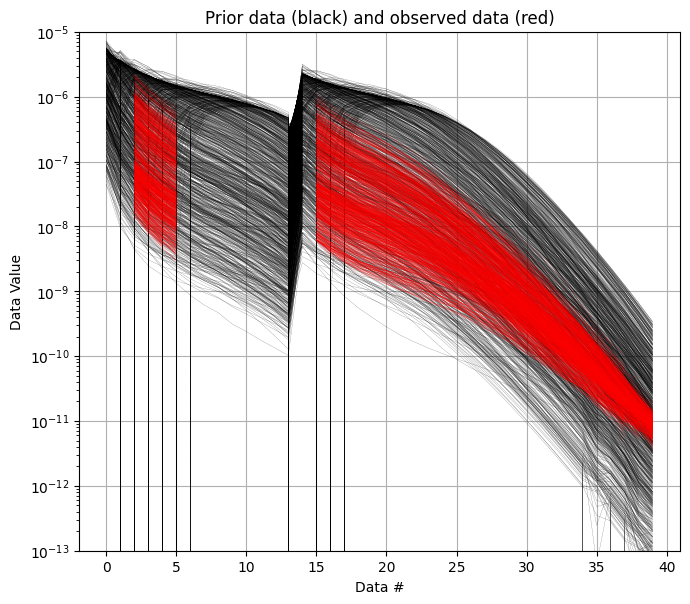

True

In [6]:
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,alpha=1, ylim=[1e-13,1e-5], hardcopy=hardcopy)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [7]:
N_use = N
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                   f_data_h5, 
                                   N_use = N_use, 
                                   showInfo=1, 
                                   Ncpu = 10,
                                   parallel=parallel)

Loaded data from ESBJERG_ALL.h5
Data type 1: id_use=1,    gaussian, Using 28061/28061 data
Loaded data from ESBJERG_ALL.h5
Data type 1: id_use=1,    gaussian, Using 28061/28061 data
Data type 1: gaussian, Using 28061/28061 data
Memory size of D: 16000000
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5
f_data_h5=ESBJERG_ALL.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


rejection:   0%|                                                                                           | 0/2807 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/2806 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/2806 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/2806 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▎                                                                                 | 10/2807 [00:00<00:39, 70.50it/s]

rejection:   0%|                                                                                           | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▎                                                                                 | 10/2806 [00:00<00:49, 56.98it/s]

rejection:   0%|                                                                                           | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▎                                                                                 | 10/2806 [00:00<00:54, 51.18it/s]

rejection:   0%|                                                                                           | 0/2806 [00:00<?, ?it/s]

rejection:   0%|▎                                                                                 | 10/2806 [00:00<00:59, 46.86it/s]

rejection:   0%|                                                                                           | 0/2806 [00:00<?, ?it/s]

rejection:   1%|▌                                                                                 | 20/2807 [00:00<00:57, 48.05it/s]

rejection:   0%|▎                                                                                 | 10/2806 [00:00<01:10, 39.45it/s]

rejection:   0%|▎                                                                                 | 10/2806 [00:00<01:16, 36.43it/s]

rejection:   0%|                                                                                           | 0/2806 [00:00<?, ?it/s]

rejection:   1%|▌                                                                                 | 20/2806 [00:00<01:06, 41.88it/s]

rejection:   0%|▎                                                                                 | 10/2806 [00:00<01:19, 35.22it/s]

rejection:   1%|▌                                                                                 | 20/2806 [00:00<01:09, 40.00it/s]

rejection:   1%|▌                                                                                 | 20/2806 [00:00<01:13, 38.15it/s]

rejection:   0%|▎                                                                                 | 10/2806 [00:00<01:33, 29.81it/s]

rejection:   1%|▉                                                                                 | 30/2807 [00:00<01:09, 39.82it/s]

rejection:   1%|▌                                                                                 | 20/2806 [00:00<01:18, 35.42it/s]

rejection:   1%|▌                                                                                 | 20/2806 [00:00<01:21, 34.37it/s]

rejection:   0%|▎                                                                                 | 10/2806 [00:00<01:50, 25.36it/s]

rejection:   1%|▉                                                                                 | 30/2806 [00:00<01:14, 37.33it/s]

rejection:   1%|▉                                                                                 | 30/2806 [00:00<01:16, 36.34it/s]

rejection:   0%|▎                                                                                 | 10/2806 [00:00<01:48, 25.85it/s]

rejection:   1%|▉                                                                                 | 30/2806 [00:00<01:18, 35.42it/s]

rejection:   1%|▉                                                                                 | 30/2806 [00:00<01:21, 34.19it/s]

rejection:   1%|█▏                                                                                | 40/2807 [00:01<01:15, 36.69it/s]

rejection:   1%|▉                                                                                 | 30/2806 [00:00<01:22, 33.61it/s]

rejection:   1%|▌                                                                                 | 20/2806 [00:00<02:02, 22.75it/s]

rejection:   1%|▌                                                                                 | 20/2806 [00:00<01:35, 29.29it/s]

rejection:   1%|▌                                                                                 | 20/2806 [00:00<01:51, 25.03it/s]

rejection:   1%|█▏                                                                                | 40/2806 [00:01<01:17, 35.51it/s]

rejection:   1%|█▏                                                                                | 40/2806 [00:01<01:18, 35.11it/s]

rejection:   1%|▌                                                                                 | 20/2806 [00:00<01:33, 29.84it/s]

rejection:   1%|█▏                                                                                | 40/2806 [00:01<01:21, 33.81it/s]

rejection:   2%|█▍                                                                                | 50/2807 [00:01<01:22, 33.32it/s]

rejection:   1%|█▏                                                                                | 40/2806 [00:01<01:22, 33.51it/s]

rejection:   1%|▉                                                                                 | 30/2806 [00:01<01:47, 25.71it/s]

rejection:   1%|▉                                                                                 | 30/2806 [00:01<01:31, 30.48it/s]

rejection:   2%|█▍                                                                                | 50/2806 [00:01<01:19, 34.60it/s]

rejection:   1%|█▏                                                                                | 40/2806 [00:01<01:42, 27.06it/s]

rejection:   2%|█▍                                                                                | 50/2806 [00:01<01:20, 34.31it/s]

rejection:   1%|▉                                                                                 | 30/2806 [00:01<01:31, 30.39it/s]

rejection:   2%|█▍                                                                                | 50/2806 [00:01<01:27, 31.62it/s]

rejection:   2%|█▊                                                                                | 60/2807 [00:01<01:23, 32.98it/s]

rejection:   2%|█▍                                                                                | 50/2806 [00:01<01:22, 33.55it/s]

rejection:   1%|█▏                                                                                | 40/2806 [00:01<01:37, 28.34it/s]

rejection:   1%|▉                                                                                 | 30/2806 [00:01<02:18, 20.04it/s]

rejection:   1%|█▏                                                                                | 40/2806 [00:01<01:30, 30.61it/s]

rejection:   2%|█▍                                                                                | 50/2806 [00:01<01:35, 28.83it/s]

rejection:   2%|█▊                                                                                | 60/2806 [00:01<01:20, 34.04it/s]

rejection:   1%|█▏                                                                                | 40/2806 [00:01<01:28, 31.12it/s]

rejection:   2%|█▊                                                                                | 60/2806 [00:01<01:34, 29.13it/s]

rejection:   2%|█▊                                                                                | 60/2806 [00:01<01:26, 31.90it/s]

rejection:   2%|█▊                                                                                | 60/2806 [00:01<01:22, 33.37it/s]

rejection:   2%|██                                                                                | 70/2807 [00:01<01:23, 32.97it/s]

rejection:   2%|█▊                                                                                | 60/2806 [00:01<01:31, 30.12it/s]

rejection:   2%|█▍                                                                                | 50/2806 [00:01<01:28, 31.30it/s]

rejection:   2%|██                                                                                | 70/2806 [00:01<01:21, 33.65it/s]

rejection:   2%|█▍                                                                                | 50/2806 [00:01<01:26, 31.72it/s]

rejection:   2%|█▍                                                                                | 50/2806 [00:01<01:46, 25.93it/s]

rejection:   2%|██                                                                                | 70/2806 [00:02<01:30, 30.32it/s]

rejection:   2%|██                                                                                | 70/2806 [00:02<01:24, 32.39it/s]

rejection:   2%|██                                                                                | 70/2806 [00:02<01:21, 33.37it/s]

rejection:   1%|█▏                                                                                | 40/2806 [00:02<02:30, 18.38it/s]

rejection:   2%|█▊                                                                                | 60/2806 [00:01<01:25, 32.04it/s]

rejection:   2%|██                                                                                | 70/2806 [00:02<01:27, 31.16it/s]

rejection:   3%|██▎                                                                               | 80/2807 [00:02<01:29, 30.43it/s]

rejection:   3%|██▎                                                                               | 80/2806 [00:02<01:21, 33.59it/s]

rejection:   2%|█▊                                                                                | 60/2806 [00:01<01:29, 30.56it/s]

rejection:   3%|██▎                                                                               | 80/2806 [00:02<01:27, 31.26it/s]

rejection:   2%|█▊                                                                                | 60/2806 [00:02<01:45, 25.92it/s]

rejection:   3%|██▎                                                                               | 80/2806 [00:02<01:23, 32.68it/s]

rejection:   2%|██                                                                                | 70/2806 [00:02<01:24, 32.44it/s]

rejection:   3%|██▎                                                                               | 80/2806 [00:02<01:25, 31.82it/s]

rejection:   3%|██▋                                                                               | 90/2807 [00:02<01:27, 31.08it/s]

rejection:   3%|██▋                                                                               | 90/2806 [00:02<01:20, 33.53it/s]

rejection:   3%|██▎                                                                               | 80/2806 [00:02<01:31, 29.72it/s]

rejection:   2%|██                                                                                | 70/2806 [00:02<01:27, 31.13it/s]

rejection:   2%|██                                                                                | 70/2806 [00:02<01:38, 27.83it/s]

rejection:   3%|██▋                                                                               | 90/2806 [00:02<01:22, 32.76it/s]

rejection:   2%|█▍                                                                                | 50/2806 [00:02<02:36, 17.60it/s]

rejection:   3%|██▋                                                                               | 90/2806 [00:02<01:24, 32.14it/s]

rejection:   3%|██▎                                                                               | 80/2806 [00:02<01:23, 32.57it/s]

rejection:   4%|██▉                                                                              | 100/2806 [00:02<01:21, 33.31it/s]

rejection:   4%|██▉                                                                              | 100/2807 [00:02<01:25, 31.59it/s]

rejection:   3%|██▋                                                                               | 90/2806 [00:02<01:29, 30.48it/s]

rejection:   3%|██▋                                                                               | 90/2806 [00:02<01:47, 25.20it/s]

rejection:   3%|██▎                                                                               | 80/2806 [00:02<01:25, 31.74it/s]

rejection:   3%|██▎                                                                               | 80/2806 [00:02<01:32, 29.42it/s]

rejection:   4%|██▉                                                                              | 100/2806 [00:03<01:22, 32.90it/s]

rejection:   3%|██▋                                                                               | 90/2806 [00:02<01:22, 32.76it/s]

rejection:   4%|██▉                                                                              | 100/2806 [00:03<01:23, 32.44it/s]

rejection:   4%|███▏                                                                             | 110/2806 [00:03<01:21, 33.25it/s]

rejection:   4%|██▉                                                                              | 100/2806 [00:03<01:26, 31.22it/s]

rejection:   3%|██▋                                                                               | 90/2806 [00:02<01:24, 32.05it/s]

rejection:   4%|██▉                                                                              | 100/2806 [00:03<01:42, 26.30it/s]

rejection:   3%|██▋                                                                               | 90/2806 [00:03<01:28, 30.80it/s]

rejection:   4%|███▏                                                                             | 110/2807 [00:03<01:41, 26.66it/s]

rejection:   4%|███▏                                                                             | 110/2806 [00:03<01:22, 32.80it/s]

rejection:   4%|███▏                                                                             | 110/2806 [00:03<01:22, 32.51it/s]

rejection:   4%|██▉                                                                              | 100/2806 [00:03<01:22, 32.72it/s]

rejection:   2%|█▊                                                                                | 60/2806 [00:03<02:41, 17.04it/s]

rejection:   4%|███▍                                                                             | 120/2806 [00:03<01:21, 33.11it/s]

rejection:   4%|███▏                                                                             | 110/2806 [00:03<01:25, 31.67it/s]

rejection:   4%|██▉                                                                              | 100/2806 [00:03<01:23, 32.33it/s]

rejection:   4%|██▉                                                                              | 100/2806 [00:03<01:25, 31.59it/s]

rejection:   4%|███▍                                                                             | 120/2807 [00:03<01:35, 28.21it/s]

rejection:   4%|███▍                                                                             | 120/2806 [00:03<01:21, 32.97it/s]

rejection:   4%|███▏                                                                             | 110/2806 [00:03<01:47, 24.97it/s]

rejection:   4%|███▍                                                                             | 120/2806 [00:03<01:22, 32.75it/s]

rejection:   4%|███▏                                                                             | 110/2806 [00:03<01:21, 32.90it/s]

rejection:   5%|███▊                                                                             | 130/2806 [00:03<01:20, 33.13it/s]

rejection:   4%|███▏                                                                             | 110/2806 [00:03<01:25, 31.57it/s]

rejection:   4%|███▏                                                                             | 110/2806 [00:03<01:24, 31.91it/s]

rejection:   4%|███▍                                                                             | 120/2806 [00:03<01:33, 28.70it/s]

rejection:   5%|███▊                                                                             | 130/2806 [00:03<01:21, 32.92it/s]

rejection:   5%|███▊                                                                             | 130/2807 [00:04<01:30, 29.44it/s]

rejection:   4%|███▍                                                                             | 120/2806 [00:04<01:40, 26.79it/s]

rejection:   5%|███▊                                                                             | 130/2806 [00:04<01:21, 32.76it/s]

rejection:   2%|██                                                                                | 70/2806 [00:03<02:42, 16.84it/s]

rejection:   5%|████                                                                             | 140/2806 [00:04<01:20, 33.05it/s]

rejection:   4%|███▍                                                                             | 120/2806 [00:03<01:28, 30.28it/s]

rejection:   4%|███▍                                                                             | 120/2806 [00:04<01:23, 32.23it/s]

rejection:   4%|███▍                                                                             | 120/2806 [00:03<01:26, 31.07it/s]

rejection:   5%|████                                                                             | 140/2806 [00:04<01:20, 32.96it/s]

rejection:   5%|████                                                                             | 140/2807 [00:04<01:27, 30.44it/s]

rejection:   5%|███▊                                                                             | 130/2806 [00:04<01:34, 28.47it/s]

rejection:   5%|███▊                                                                             | 130/2806 [00:04<01:38, 27.17it/s]

rejection:   5%|████                                                                             | 140/2806 [00:04<01:20, 32.94it/s]

rejection:   5%|████▎                                                                            | 150/2806 [00:04<01:20, 33.17it/s]

rejection:   5%|███▊                                                                             | 130/2806 [00:04<01:31, 29.37it/s]

rejection:   5%|███▊                                                                             | 130/2806 [00:04<01:22, 32.61it/s]

rejection:   5%|████▎                                                                            | 150/2807 [00:04<01:25, 31.04it/s]

rejection:   5%|████▎                                                                            | 150/2806 [00:04<01:22, 32.26it/s]

rejection:   5%|████                                                                             | 140/2806 [00:04<01:31, 29.28it/s]

rejection:   5%|████▎                                                                            | 150/2806 [00:04<01:20, 32.99it/s]

rejection:   5%|████                                                                             | 140/2806 [00:04<01:33, 28.53it/s]

rejection:   3%|██▎                                                                               | 80/2806 [00:04<02:42, 16.81it/s]

rejection:   6%|████▌                                                                            | 160/2806 [00:04<01:20, 32.93it/s]

rejection:   5%|███▊                                                                             | 130/2806 [00:04<01:40, 26.57it/s]

rejection:   5%|████                                                                             | 140/2806 [00:04<01:27, 30.35it/s]

rejection:   5%|████                                                                             | 140/2806 [00:04<01:21, 32.75it/s]

rejection:   6%|████▌                                                                            | 160/2807 [00:05<01:24, 31.31it/s]

rejection:   6%|████▌                                                                            | 160/2806 [00:04<01:21, 32.33it/s]

rejection:   6%|████▌                                                                            | 160/2806 [00:04<01:20, 33.02it/s]

rejection:   5%|████▎                                                                            | 150/2806 [00:04<01:29, 29.55it/s]

rejection:   6%|████▉                                                                            | 170/2806 [00:05<01:20, 32.91it/s]

rejection:   5%|████                                                                             | 140/2806 [00:04<01:35, 28.04it/s]

rejection:   5%|████▎                                                                            | 150/2806 [00:04<01:25, 31.14it/s]

rejection:   5%|████▎                                                                            | 150/2806 [00:04<01:20, 32.84it/s]

rejection:   6%|████▉                                                                            | 170/2806 [00:05<01:20, 32.55it/s]

rejection:   6%|████▉                                                                            | 170/2807 [00:05<01:23, 31.45it/s]

rejection:   5%|████▎                                                                            | 150/2806 [00:05<01:50, 23.98it/s]

rejection:   6%|████▉                                                                            | 170/2806 [00:05<01:19, 33.02it/s]

rejection:   3%|██▋                                                                               | 90/2806 [00:05<02:41, 16.78it/s]

rejection:   6%|████▌                                                                            | 160/2806 [00:05<01:26, 30.69it/s]

rejection:   6%|█████▏                                                                           | 180/2806 [00:05<01:19, 33.11it/s]

rejection:   5%|████▎                                                                            | 150/2806 [00:04<01:30, 29.34it/s]

rejection:   6%|████▌                                                                            | 160/2806 [00:05<01:23, 31.64it/s]

rejection:   6%|████▌                                                                            | 160/2806 [00:05<01:20, 32.85it/s]

rejection:   6%|█████▏                                                                           | 180/2806 [00:05<01:20, 32.68it/s]

rejection:   6%|█████▏                                                                           | 180/2807 [00:05<01:22, 31.91it/s]

rejection:   6%|████▌                                                                            | 160/2806 [00:05<01:43, 25.67it/s]

rejection:   6%|█████▏                                                                           | 180/2806 [00:05<01:19, 33.02it/s]

rejection:   7%|█████▍                                                                           | 190/2806 [00:05<01:18, 33.20it/s]

rejection:   6%|████▉                                                                            | 170/2806 [00:05<01:28, 29.94it/s]

rejection:   6%|████▉                                                                            | 170/2806 [00:05<01:22, 32.11it/s]

rejection:   6%|████▉                                                                            | 170/2806 [00:05<01:19, 32.98it/s]

rejection:   6%|████▌                                                                            | 160/2806 [00:05<01:34, 28.09it/s]

rejection:   7%|█████▍                                                                           | 190/2806 [00:05<01:19, 32.84it/s]

rejection:   7%|█████▍                                                                           | 190/2806 [00:05<01:19, 33.07it/s]

rejection:   6%|████▉                                                                            | 170/2806 [00:05<01:35, 27.48it/s]

rejection:   4%|██▉                                                                              | 100/2806 [00:05<02:42, 16.61it/s]

rejection:   7%|█████▊                                                                           | 200/2806 [00:05<01:18, 33.17it/s]

rejection:   6%|█████▏                                                                           | 180/2806 [00:05<01:25, 30.60it/s]

rejection:   7%|█████▍                                                                           | 190/2807 [00:06<01:30, 28.85it/s]

rejection:   6%|█████▏                                                                           | 180/2806 [00:05<01:21, 32.32it/s]

rejection:   6%|█████▏                                                                           | 180/2806 [00:05<01:19, 32.92it/s]

rejection:   6%|████▉                                                                            | 170/2806 [00:05<01:34, 27.89it/s]

rejection:   7%|█████▊                                                                           | 200/2806 [00:06<01:19, 32.76it/s]

rejection:   7%|█████▊                                                                           | 200/2806 [00:06<01:19, 32.93it/s]

rejection:   7%|██████                                                                           | 210/2806 [00:06<01:18, 33.01it/s]

rejection:   7%|█████▍                                                                           | 190/2806 [00:06<01:23, 31.21it/s]

rejection:   7%|█████▊                                                                           | 200/2807 [00:06<01:27, 29.93it/s]

rejection:   6%|█████▏                                                                           | 180/2806 [00:06<01:40, 26.10it/s]

rejection:   7%|█████▍                                                                           | 190/2806 [00:06<01:20, 32.45it/s]

rejection:   7%|█████▍                                                                           | 190/2806 [00:06<01:19, 32.87it/s]

rejection:   4%|███▏                                                                             | 110/2806 [00:06<02:31, 17.75it/s]

rejection:   7%|██████                                                                           | 210/2806 [00:06<01:19, 32.76it/s]

rejection:   7%|██████                                                                           | 210/2806 [00:06<01:19, 32.85it/s]

rejection:   8%|██████▎                                                                          | 220/2806 [00:06<01:20, 31.94it/s]

rejection:   7%|█████▊                                                                           | 200/2806 [00:06<01:22, 31.61it/s]

rejection:   7%|█████▍                                                                           | 190/2806 [00:06<01:34, 27.82it/s]

rejection:   7%|█████▊                                                                           | 200/2806 [00:06<01:19, 32.59it/s]

rejection:   4%|███▍                                                                             | 120/2806 [00:06<02:10, 20.65it/s]

rejection:   7%|██████                                                                           | 210/2807 [00:06<01:32, 28.15it/s]

rejection:   7%|█████▊                                                                           | 200/2806 [00:06<01:21, 31.96it/s]

rejection:   6%|█████▏                                                                           | 180/2806 [00:06<01:53, 23.11it/s]

rejection:   8%|██████▎                                                                          | 220/2806 [00:06<01:18, 32.89it/s]

rejection:   8%|██████▎                                                                          | 220/2806 [00:06<01:18, 33.01it/s]

rejection:   7%|██████                                                                           | 210/2806 [00:06<01:23, 31.24it/s]

rejection:   7%|█████▊                                                                           | 200/2806 [00:06<01:29, 29.25it/s]

rejection:   7%|██████                                                                           | 210/2806 [00:06<01:19, 32.84it/s]

rejection:   5%|███▊                                                                             | 130/2806 [00:06<01:54, 23.35it/s]

rejection:   8%|██████▎                                                                          | 220/2807 [00:07<01:27, 29.62it/s]

rejection:   7%|██████                                                                           | 210/2806 [00:06<01:20, 32.38it/s]

rejection:   8%|██████▋                                                                          | 230/2806 [00:07<01:35, 26.88it/s]

rejection:   8%|██████▋                                                                          | 230/2806 [00:07<01:19, 32.24it/s]

rejection:   8%|██████▋                                                                          | 230/2806 [00:07<01:17, 33.04it/s]

rejection:   8%|██████▎                                                                          | 220/2806 [00:07<01:21, 31.82it/s]

rejection:   8%|██████▎                                                                          | 220/2806 [00:06<01:18, 32.93it/s]

rejection:   5%|████                                                                             | 140/2806 [00:07<01:44, 25.63it/s]

rejection:   8%|██████▋                                                                          | 230/2807 [00:07<01:23, 30.74it/s]

rejection:   7%|██████                                                                           | 210/2806 [00:07<01:32, 28.07it/s]

rejection:   8%|██████▎                                                                          | 220/2806 [00:07<01:19, 32.59it/s]

rejection:   7%|█████▍                                                                           | 190/2806 [00:06<02:09, 20.21it/s]

rejection:   9%|██████▉                                                                          | 240/2806 [00:07<01:19, 32.40it/s]

rejection:   9%|██████▉                                                                          | 240/2806 [00:07<01:17, 33.18it/s]

rejection:   8%|██████▋                                                                          | 230/2806 [00:07<01:19, 32.27it/s]

rejection:   9%|██████▉                                                                          | 240/2806 [00:07<01:41, 25.30it/s]

rejection:   8%|██████▋                                                                          | 230/2806 [00:07<01:17, 33.05it/s]

rejection:   5%|████▎                                                                            | 150/2806 [00:07<01:36, 27.57it/s]

rejection:   9%|██████▉                                                                          | 240/2807 [00:07<01:21, 31.52it/s]

rejection:   8%|██████▎                                                                          | 220/2806 [00:07<01:27, 29.45it/s]

rejection:   9%|███████▏                                                                         | 250/2806 [00:07<01:17, 33.16it/s]

rejection:   9%|███████▏                                                                         | 250/2806 [00:07<01:18, 32.60it/s]

rejection:   8%|██████▋                                                                          | 230/2806 [00:07<01:27, 29.58it/s]

rejection:   9%|██████▉                                                                          | 240/2806 [00:07<01:18, 32.49it/s]

rejection:   9%|██████▉                                                                          | 240/2806 [00:07<01:17, 33.02it/s]

rejection:   9%|███████▏                                                                         | 250/2806 [00:07<01:36, 26.52it/s]

rejection:   6%|████▌                                                                            | 160/2806 [00:07<01:31, 28.97it/s]

rejection:   8%|██████▋                                                                          | 230/2806 [00:07<01:24, 30.40it/s]

rejection:   9%|███████▏                                                                         | 250/2807 [00:08<01:24, 30.16it/s]

rejection:   7%|█████▊                                                                           | 200/2806 [00:07<02:17, 18.93it/s]

rejection:   9%|███████▌                                                                         | 260/2806 [00:07<01:17, 33.03it/s]

rejection:   9%|██████▉                                                                          | 240/2806 [00:07<01:24, 30.29it/s]

rejection:   9%|███████▌                                                                         | 260/2806 [00:08<01:23, 30.32it/s]

rejection:   9%|███████▏                                                                         | 250/2806 [00:07<01:18, 32.66it/s]

rejection:   9%|███████▏                                                                         | 250/2806 [00:07<01:17, 33.07it/s]

rejection:   6%|████▉                                                                            | 170/2806 [00:07<01:27, 30.11it/s]

rejection:   9%|██████▉                                                                          | 240/2806 [00:08<01:22, 31.18it/s]

rejection:   9%|███████▌                                                                         | 260/2807 [00:08<01:22, 31.00it/s]

rejection:   9%|███████▌                                                                         | 260/2806 [00:08<01:39, 25.57it/s]

rejection:  10%|███████▊                                                                         | 270/2806 [00:08<01:16, 33.11it/s]

rejection:  10%|███████▊                                                                         | 270/2806 [00:08<01:21, 31.17it/s]

rejection:   9%|███████▏                                                                         | 250/2806 [00:08<01:26, 29.70it/s]

rejection:   9%|███████▌                                                                         | 260/2806 [00:08<01:17, 33.04it/s]

rejection:   6%|█████▏                                                                           | 180/2806 [00:08<01:24, 30.95it/s]

rejection:   9%|███████▌                                                                         | 260/2806 [00:08<01:26, 29.59it/s]

rejection:   9%|███████▏                                                                         | 250/2806 [00:08<01:20, 31.68it/s]

rejection:  10%|███████▊                                                                         | 270/2807 [00:08<01:20, 31.58it/s]

rejection:   7%|██████                                                                           | 210/2806 [00:08<02:23, 18.05it/s]

rejection:  10%|████████                                                                         | 280/2806 [00:08<01:16, 33.09it/s]

rejection:  10%|████████                                                                         | 280/2806 [00:08<01:19, 31.66it/s]

rejection:   9%|███████▌                                                                         | 260/2806 [00:08<01:23, 30.58it/s]

rejection:  10%|███████▊                                                                         | 270/2806 [00:08<01:43, 24.50it/s]

rejection:  10%|███████▊                                                                         | 270/2806 [00:08<01:16, 33.16it/s]

rejection:   7%|█████▍                                                                           | 190/2806 [00:08<01:22, 31.65it/s]

rejection:  10%|███████▊                                                                         | 270/2806 [00:08<01:23, 30.41it/s]

rejection:   9%|███████▌                                                                         | 260/2806 [00:08<01:18, 32.23it/s]

rejection:  10%|████████▎                                                                        | 290/2806 [00:08<01:15, 33.21it/s]

rejection:  10%|████████                                                                         | 280/2807 [00:09<01:25, 29.63it/s]

rejection:  10%|████████▎                                                                        | 290/2806 [00:08<01:18, 32.00it/s]

rejection:  10%|████████                                                                         | 280/2806 [00:09<01:35, 26.57it/s]

rejection:  10%|████████                                                                         | 280/2806 [00:08<01:16, 33.24it/s]

rejection:   7%|█████▊                                                                           | 200/2806 [00:08<01:20, 32.20it/s]

rejection:  10%|███████▊                                                                         | 270/2806 [00:08<01:30, 28.03it/s]

rejection:  10%|███████▊                                                                         | 270/2806 [00:09<01:17, 32.61it/s]

rejection:  10%|████████                                                                         | 280/2806 [00:09<01:23, 30.41it/s]

rejection:  11%|████████▋                                                                        | 300/2806 [00:09<01:15, 33.40it/s]

rejection:   8%|██████▎                                                                          | 220/2806 [00:08<02:28, 17.36it/s]

rejection:  11%|████████▋                                                                        | 300/2806 [00:09<01:17, 32.46it/s]

rejection:  10%|████████▎                                                                        | 290/2806 [00:09<01:30, 27.86it/s]

rejection:  10%|████████▎                                                                        | 290/2807 [00:09<01:30, 27.67it/s]

rejection:  10%|████████▎                                                                        | 290/2806 [00:09<01:17, 32.58it/s]

rejection:   7%|██████                                                                           | 210/2806 [00:09<01:19, 32.63it/s]

rejection:  10%|████████                                                                         | 280/2806 [00:09<01:25, 29.50it/s]

rejection:  11%|████████▉                                                                        | 310/2806 [00:09<01:14, 33.59it/s]

rejection:  10%|████████                                                                         | 280/2806 [00:09<01:23, 30.31it/s]

rejection:  10%|████████▎                                                                        | 290/2806 [00:09<01:28, 28.29it/s]

rejection:  11%|████████▉                                                                        | 310/2806 [00:09<01:15, 32.91it/s]

rejection:  11%|████████▋                                                                        | 300/2806 [00:09<01:25, 29.24it/s]

rejection:  11%|████████▋                                                                        | 300/2807 [00:09<01:27, 28.54it/s]

rejection:  11%|████████▋                                                                        | 300/2806 [00:09<01:16, 32.74it/s]

rejection:   8%|██████▎                                                                          | 220/2806 [00:09<01:20, 31.97it/s]

rejection:  10%|████████▎                                                                        | 290/2806 [00:09<01:28, 28.53it/s]

rejection:  10%|████████▎                                                                        | 290/2806 [00:09<01:20, 31.10it/s]

rejection:  11%|█████████▏                                                                       | 320/2806 [00:09<01:14, 33.35it/s]

rejection:   8%|██████▋                                                                          | 230/2806 [00:09<02:30, 17.09it/s]

rejection:  11%|█████████▏                                                                       | 320/2806 [00:09<01:15, 32.79it/s]

rejection:  11%|████████▋                                                                        | 300/2806 [00:09<01:27, 28.64it/s]

rejection:  11%|████████▉                                                                        | 310/2806 [00:09<01:24, 29.56it/s]

rejection:  11%|████████▉                                                                        | 310/2806 [00:09<01:15, 32.85it/s]

rejection:   8%|██████▋                                                                          | 230/2806 [00:09<01:19, 32.32it/s]

rejection:  12%|█████████▌                                                                       | 330/2806 [00:10<01:14, 33.30it/s]

rejection:  11%|████████▋                                                                        | 300/2806 [00:10<01:19, 31.69it/s]

rejection:  11%|████████▋                                                                        | 300/2806 [00:09<01:25, 29.47it/s]

rejection:  12%|█████████▌                                                                       | 330/2806 [00:10<01:15, 32.87it/s]

rejection:  11%|████████▉                                                                        | 310/2806 [00:10<01:25, 29.05it/s]

rejection:  11%|█████████▏                                                                       | 320/2806 [00:09<01:15, 32.80it/s]

rejection:  11%|█████████▏                                                                       | 320/2806 [00:10<01:21, 30.33it/s]

rejection:  11%|████████▉                                                                        | 310/2807 [00:10<01:47, 23.21it/s]

rejection:   9%|██████▉                                                                          | 240/2806 [00:10<01:19, 32.42it/s]

rejection:  11%|████████▉                                                                        | 310/2806 [00:10<01:18, 31.99it/s]

rejection:  11%|████████▉                                                                        | 310/2806 [00:10<01:22, 30.38it/s]

rejection:  12%|█████████▊                                                                       | 340/2806 [00:10<01:14, 33.11it/s]

rejection:   9%|██████▉                                                                          | 240/2806 [00:10<02:30, 17.04it/s]

rejection:  12%|█████████▊                                                                       | 340/2806 [00:10<01:15, 32.87it/s]

rejection:  11%|█████████▏                                                                       | 320/2806 [00:10<01:23, 29.90it/s]

rejection:  12%|█████████▌                                                                       | 330/2806 [00:10<01:19, 31.07it/s]

rejection:  12%|█████████▌                                                                       | 330/2806 [00:10<01:15, 32.82it/s]

rejection:   9%|███████▏                                                                         | 250/2806 [00:10<01:18, 32.62it/s]

rejection:  11%|█████████▏                                                                       | 320/2807 [00:10<01:41, 24.54it/s]

rejection:  11%|█████████▏                                                                       | 320/2806 [00:10<01:19, 31.18it/s]

rejection:  11%|█████████▏                                                                       | 320/2806 [00:10<01:18, 31.61it/s]

rejection:  12%|██████████                                                                       | 350/2806 [00:10<01:18, 31.21it/s]

rejection:  12%|██████████                                                                       | 350/2806 [00:10<01:14, 32.92it/s]

rejection:  12%|█████████▌                                                                       | 330/2806 [00:10<01:24, 29.34it/s]

rejection:  12%|█████████▊                                                                       | 340/2806 [00:10<01:14, 32.90it/s]

rejection:   9%|███████▌                                                                         | 260/2806 [00:10<01:17, 32.68it/s]

rejection:  12%|█████████▌                                                                       | 330/2807 [00:11<01:33, 26.52it/s]

rejection:  12%|█████████▊                                                                       | 340/2806 [00:10<01:22, 29.89it/s]

rejection:  12%|█████████▌                                                                       | 330/2806 [00:10<01:20, 30.77it/s]

rejection:   9%|███████▏                                                                         | 250/2806 [00:10<02:33, 16.65it/s]

rejection:  13%|██████████▍                                                                      | 360/2806 [00:11<01:17, 31.76it/s]

rejection:  13%|██████████▍                                                                      | 360/2806 [00:11<01:14, 33.02it/s]

rejection:  12%|█████████▌                                                                       | 330/2806 [00:11<01:24, 29.31it/s]

rejection:  12%|██████████                                                                       | 350/2806 [00:10<01:14, 33.00it/s]

rejection:  12%|█████████▊                                                                       | 340/2806 [00:11<01:21, 30.40it/s]

rejection:  10%|███████▊                                                                         | 270/2806 [00:10<01:17, 32.92it/s]

rejection:  12%|██████████                                                                       | 350/2806 [00:11<01:19, 30.89it/s]

rejection:   9%|███████▌                                                                         | 260/2806 [00:10<02:11, 19.36it/s]

rejection:  12%|█████████▊                                                                       | 340/2806 [00:11<01:20, 30.64it/s]

rejection:  13%|██████████▋                                                                      | 370/2806 [00:11<01:13, 33.09it/s]

rejection:  12%|█████████▊                                                                       | 340/2806 [00:11<01:21, 30.37it/s]

rejection:  13%|██████████▍                                                                      | 360/2806 [00:11<01:14, 33.02it/s]

rejection:  12%|██████████                                                                       | 350/2806 [00:11<01:21, 30.30it/s]

rejection:  10%|████████                                                                         | 280/2806 [00:11<01:16, 32.89it/s]

rejection:  12%|█████████▊                                                                       | 340/2807 [00:11<01:47, 22.92it/s]

rejection:  13%|██████████▍                                                                      | 360/2806 [00:11<01:17, 31.44it/s]

rejection:  10%|███████▊                                                                         | 270/2806 [00:11<01:55, 22.03it/s]

rejection:  12%|██████████                                                                       | 350/2806 [00:11<01:18, 31.19it/s]

rejection:  13%|██████████▋                                                                      | 370/2806 [00:11<01:38, 24.70it/s]

rejection:  14%|██████████▉                                                                      | 380/2806 [00:11<01:13, 32.90it/s]

rejection:  12%|██████████                                                                       | 350/2806 [00:11<01:19, 30.99it/s]

rejection:  12%|██████████                                                                       | 350/2807 [00:11<01:37, 25.27it/s]

rejection:  10%|████████▎                                                                        | 290/2806 [00:11<01:16, 32.94it/s]

rejection:  13%|██████████▍                                                                      | 360/2806 [00:11<01:18, 31.06it/s]

rejection:  13%|██████████▋                                                                      | 370/2806 [00:11<01:16, 31.93it/s]

rejection:  13%|██████████▋                                                                      | 370/2806 [00:11<01:26, 28.26it/s]

rejection:  10%|████████                                                                         | 280/2806 [00:11<01:42, 24.58it/s]

rejection:  14%|███████████▎                                                                     | 390/2806 [00:11<01:12, 33.12it/s]

rejection:  13%|██████████▍                                                                      | 360/2806 [00:12<01:17, 31.76it/s]

rejection:  13%|██████████▍                                                                      | 360/2807 [00:12<01:29, 27.26it/s]

rejection:  11%|████████▋                                                                        | 300/2806 [00:11<01:15, 33.06it/s]

rejection:  14%|██████████▉                                                                      | 380/2806 [00:12<01:15, 32.29it/s]

rejection:  13%|██████████▋                                                                      | 370/2806 [00:12<01:28, 27.66it/s]

rejection:  10%|████████▎                                                                        | 290/2806 [00:11<01:34, 26.56it/s]

rejection:  13%|██████████▍                                                                      | 360/2806 [00:12<01:39, 24.55it/s]

rejection:  14%|██████████▉                                                                      | 380/2806 [00:12<01:52, 21.54it/s]

rejection:  14%|███████████▌                                                                     | 400/2806 [00:12<01:12, 33.01it/s]

rejection:  14%|██████████▉                                                                      | 380/2806 [00:11<01:25, 28.45it/s]

rejection:  13%|██████████▋                                                                      | 370/2806 [00:12<01:16, 32.03it/s]

rejection:  13%|██████████▋                                                                      | 370/2807 [00:12<01:25, 28.64it/s]

rejection:  11%|████████▉                                                                        | 310/2806 [00:12<01:15, 32.87it/s]

rejection:  14%|███████████▎                                                                     | 390/2806 [00:12<01:14, 32.38it/s]

rejection:  11%|████████▋                                                                        | 300/2806 [00:12<01:29, 28.15it/s]

rejection:  14%|██████████▉                                                                      | 380/2806 [00:12<01:25, 28.54it/s]

rejection:  15%|███████████▊                                                                     | 410/2806 [00:12<01:12, 32.90it/s]

rejection:  13%|██████████▋                                                                      | 370/2806 [00:12<01:33, 26.05it/s]

rejection:  14%|██████████▉                                                                      | 380/2806 [00:12<01:15, 32.25it/s]

rejection:  14%|██████████▉                                                                      | 380/2807 [00:12<01:21, 29.81it/s]

rejection:  11%|█████████▏                                                                       | 320/2806 [00:12<01:15, 32.91it/s]

rejection:  14%|███████████▌                                                                     | 400/2806 [00:12<01:13, 32.57it/s]

rejection:  14%|███████████▎                                                                     | 390/2806 [00:12<01:34, 25.55it/s]

rejection:  14%|███████████▎                                                                     | 390/2806 [00:12<01:57, 20.53it/s]

rejection:  11%|████████▉                                                                        | 310/2806 [00:12<01:24, 29.46it/s]

rejection:  14%|███████████▎                                                                     | 390/2806 [00:12<01:21, 29.74it/s]

rejection:  15%|████████████                                                                     | 420/2806 [00:12<01:12, 32.95it/s]

rejection:  14%|███████████▎                                                                     | 390/2806 [00:12<01:14, 32.46it/s]

rejection:  14%|███████████▎                                                                     | 390/2807 [00:13<01:18, 30.66it/s]

rejection:  15%|███████████▊                                                                     | 410/2806 [00:13<01:13, 32.68it/s]

rejection:  14%|███████████▌                                                                     | 400/2806 [00:12<01:27, 27.38it/s]

rejection:  14%|███████████▌                                                                     | 400/2806 [00:13<01:43, 23.21it/s]

rejection:  11%|█████████▏                                                                       | 320/2806 [00:12<01:21, 30.51it/s]

rejection:  14%|███████████▌                                                                     | 400/2806 [00:13<01:18, 30.76it/s]

rejection:  14%|██████████▉                                                                      | 380/2806 [00:13<01:48, 22.40it/s]

rejection:  15%|████████████▍                                                                    | 430/2806 [00:13<01:12, 32.99it/s]

rejection:  12%|█████████▌                                                                       | 330/2806 [00:13<01:30, 27.37it/s]

rejection:  14%|███████████▌                                                                     | 400/2806 [00:13<01:13, 32.64it/s]

rejection:  15%|████████████                                                                     | 420/2806 [00:13<01:12, 32.73it/s]

rejection:  15%|███████████▊                                                                     | 410/2806 [00:13<01:24, 28.35it/s]

rejection:  14%|███████████▌                                                                     | 400/2807 [00:13<01:23, 28.86it/s]

rejection:  15%|███████████▊                                                                     | 410/2806 [00:13<01:34, 25.39it/s]

rejection:  12%|█████████▌                                                                       | 330/2806 [00:13<01:19, 31.15it/s]

rejection:  15%|███████████▊                                                                     | 410/2806 [00:13<01:16, 31.28it/s]

rejection:  15%|███████████▊                                                                     | 410/2806 [00:13<01:13, 32.74it/s]

rejection:  12%|█████████▊                                                                       | 340/2806 [00:13<01:25, 28.70it/s]

rejection:  16%|████████████▋                                                                    | 440/2806 [00:13<01:20, 29.31it/s]

rejection:  15%|████████████▍                                                                    | 430/2806 [00:13<01:12, 32.81it/s]

rejection:  15%|████████████                                                                     | 420/2806 [00:13<01:20, 29.61it/s]

rejection:  15%|███████████▊                                                                     | 410/2807 [00:13<01:19, 29.97it/s]

rejection:  15%|████████████                                                                     | 420/2806 [00:13<01:31, 25.95it/s]

rejection:  14%|███████████▎                                                                     | 390/2806 [00:13<01:58, 20.31it/s]

rejection:  15%|████████████                                                                     | 420/2806 [00:13<01:15, 31.73it/s]

rejection:  15%|████████████                                                                     | 420/2806 [00:13<01:13, 32.61it/s]

rejection:  12%|█████████▊                                                                       | 340/2806 [00:13<01:23, 29.50it/s]

rejection:  12%|██████████                                                                       | 350/2806 [00:13<01:28, 27.83it/s]

rejection:  16%|████████████▉                                                                    | 450/2806 [00:13<01:17, 30.21it/s]

rejection:  16%|████████████▋                                                                    | 440/2806 [00:14<01:13, 32.27it/s]

rejection:  15%|████████████▍                                                                    | 430/2806 [00:13<01:17, 30.48it/s]

rejection:  15%|████████████                                                                     | 420/2807 [00:14<01:18, 30.59it/s]

rejection:  15%|████████████▍                                                                    | 430/2806 [00:14<01:26, 27.59it/s]

rejection:  15%|████████████▍                                                                    | 430/2806 [00:14<01:14, 32.08it/s]

rejection:  15%|████████████▍                                                                    | 430/2806 [00:14<01:12, 32.60it/s]

rejection:  13%|██████████▍                                                                      | 360/2806 [00:14<01:23, 29.25it/s]

rejection:  16%|█████████████▎                                                                   | 460/2806 [00:14<01:15, 31.09it/s]

rejection:  16%|████████████▉                                                                    | 450/2806 [00:14<01:12, 32.41it/s]

rejection:  12%|██████████                                                                       | 350/2806 [00:13<01:30, 27.03it/s]

rejection:  16%|████████████▋                                                                    | 440/2806 [00:14<01:15, 31.19it/s]

rejection:  15%|████████████▍                                                                    | 430/2807 [00:14<01:15, 31.43it/s]

rejection:  16%|████████████▋                                                                    | 440/2806 [00:14<01:21, 29.19it/s]

rejection:  14%|███████████▌                                                                     | 400/2806 [00:14<02:08, 18.76it/s]

rejection:  16%|████████████▋                                                                    | 440/2806 [00:14<01:13, 32.24it/s]

rejection:  16%|████████████▋                                                                    | 440/2806 [00:14<01:22, 28.76it/s]

rejection:  17%|█████████████▌                                                                   | 470/2806 [00:14<01:13, 31.67it/s]

rejection:  13%|██████████▋                                                                      | 370/2806 [00:14<01:22, 29.62it/s]

rejection:  16%|█████████████▎                                                                   | 460/2806 [00:14<01:12, 32.35it/s]

rejection:  13%|██████████▍                                                                      | 360/2806 [00:14<01:25, 28.61it/s]

rejection:  16%|████████████▋                                                                    | 440/2807 [00:14<01:14, 31.91it/s]

rejection:  16%|████████████▉                                                                    | 450/2806 [00:14<01:17, 30.25it/s]

rejection:  16%|████████████▉                                                                    | 450/2806 [00:14<01:23, 28.18it/s]

rejection:  16%|████████████▉                                                                    | 450/2806 [00:14<01:13, 32.20it/s]

rejection:  16%|████████████▉                                                                    | 450/2806 [00:14<01:19, 29.77it/s]

rejection:  14%|██████████▉                                                                      | 380/2806 [00:14<01:18, 30.76it/s]

rejection:  17%|█████████████▊                                                                   | 480/2806 [00:14<01:12, 32.06it/s]

rejection:  17%|█████████████▌                                                                   | 470/2806 [00:14<01:11, 32.48it/s]

rejection:  13%|██████████▋                                                                      | 370/2806 [00:14<01:23, 29.04it/s]

rejection:  16%|█████████████▎                                                                   | 460/2806 [00:14<01:15, 31.02it/s]

rejection:  15%|███████████▊                                                                     | 410/2806 [00:14<02:13, 17.92it/s]

rejection:  16%|█████████████▎                                                                   | 460/2806 [00:14<01:19, 29.43it/s]

rejection:  16%|████████████▉                                                                    | 450/2807 [00:15<01:21, 28.83it/s]

rejection:  16%|█████████████▎                                                                   | 460/2806 [00:15<01:12, 32.42it/s]

rejection:  17%|██████████████▏                                                                  | 490/2806 [00:15<01:11, 32.27it/s]

rejection:  16%|█████████████▎                                                                   | 460/2806 [00:15<01:17, 30.12it/s]

rejection:  17%|█████████████▊                                                                   | 480/2806 [00:15<01:11, 32.47it/s]

rejection:  14%|██████████▉                                                                      | 380/2806 [00:14<01:20, 29.96it/s]

rejection:  14%|███████████▎                                                                     | 390/2806 [00:15<01:24, 28.44it/s]

rejection:  17%|█████████████▌                                                                   | 470/2806 [00:15<01:14, 31.39it/s]

rejection:  17%|█████████████▌                                                                   | 470/2806 [00:15<01:17, 30.26it/s]

rejection:  17%|█████████████▌                                                                   | 470/2806 [00:15<01:12, 32.39it/s]

rejection:  18%|██████████████▍                                                                  | 500/2806 [00:15<01:11, 32.34it/s]

rejection:  17%|█████████████▌                                                                   | 470/2806 [00:15<01:15, 30.83it/s]

rejection:  17%|██████████████▏                                                                  | 490/2806 [00:15<01:11, 32.45it/s]

rejection:  16%|█████████████▎                                                                   | 460/2807 [00:15<01:30, 25.91it/s]

rejection:  14%|███████████▎                                                                     | 390/2806 [00:15<01:18, 30.71it/s]

rejection:  14%|███████████▌                                                                     | 400/2806 [00:15<01:21, 29.46it/s]

rejection:  15%|████████████                                                                     | 420/2806 [00:15<02:13, 17.85it/s]

rejection:  17%|█████████████▊                                                                   | 480/2806 [00:15<01:13, 31.78it/s]

rejection:  17%|█████████████▊                                                                   | 480/2806 [00:15<01:11, 32.47it/s]

rejection:  18%|██████████████▋                                                                  | 510/2806 [00:15<01:10, 32.45it/s]

rejection:  17%|█████████████▊                                                                   | 480/2806 [00:15<01:21, 28.52it/s]

rejection:  17%|█████████████▊                                                                   | 480/2806 [00:15<01:14, 31.23it/s]

rejection:  18%|██████████████▍                                                                  | 500/2806 [00:15<01:10, 32.54it/s]

rejection:  15%|███████████▊                                                                     | 410/2806 [00:15<01:18, 30.43it/s]

rejection:  15%|████████████▍                                                                    | 430/2806 [00:15<01:54, 20.68it/s]

rejection:  17%|██████████████▏                                                                  | 490/2806 [00:15<01:12, 32.02it/s]

rejection:  17%|██████████████▏                                                                  | 490/2806 [00:16<01:11, 32.51it/s]

rejection:  19%|███████████████                                                                  | 520/2806 [00:16<01:10, 32.49it/s]

rejection:  17%|██████████████▏                                                                  | 490/2806 [00:15<01:18, 29.62it/s]

rejection:  17%|██████████████▏                                                                  | 490/2806 [00:15<01:12, 31.77it/s]

rejection:  18%|██████████████▋                                                                  | 510/2806 [00:16<01:10, 32.58it/s]

rejection:  14%|███████████▌                                                                     | 400/2806 [00:15<01:37, 24.79it/s]

rejection:  17%|█████████████▌                                                                   | 470/2807 [00:16<01:45, 22.19it/s]

rejection:  15%|████████████                                                                     | 420/2806 [00:15<01:16, 31.18it/s]

rejection:  16%|████████████▋                                                                    | 440/2806 [00:16<01:41, 23.31it/s]

rejection:  18%|██████████████▍                                                                  | 500/2806 [00:16<01:11, 32.15it/s]

rejection:  18%|██████████████▍                                                                  | 500/2806 [00:16<01:10, 32.53it/s]

rejection:  19%|███████████████▎                                                                 | 530/2806 [00:16<01:09, 32.52it/s]

rejection:  18%|██████████████▍                                                                  | 500/2806 [00:16<01:15, 30.45it/s]

rejection:  15%|███████████▊                                                                     | 410/2806 [00:16<01:29, 26.77it/s]

rejection:  19%|███████████████                                                                  | 520/2806 [00:16<01:10, 32.57it/s]

rejection:  15%|████████████▍                                                                    | 430/2806 [00:16<01:15, 31.29it/s]

rejection:  16%|████████████▉                                                                    | 450/2806 [00:16<01:31, 25.71it/s]

rejection:  18%|██████████████▋                                                                  | 510/2806 [00:16<01:11, 32.30it/s]

rejection:  18%|██████████████▍                                                                  | 500/2806 [00:16<01:21, 28.25it/s]

rejection:  18%|██████████████▋                                                                  | 510/2806 [00:16<01:10, 32.67it/s]

rejection:  19%|███████████████▌                                                                 | 540/2806 [00:16<01:09, 32.65it/s]

rejection:  15%|████████████                                                                     | 420/2806 [00:16<01:23, 28.41it/s]

rejection:  19%|███████████████▎                                                                 | 530/2806 [00:16<01:09, 32.75it/s]

rejection:  17%|█████████████▊                                                                   | 480/2807 [00:16<01:56, 20.00it/s]

rejection:  18%|██████████████▋                                                                  | 510/2806 [00:16<01:20, 28.70it/s]

rejection:  16%|████████████▋                                                                    | 440/2806 [00:16<01:14, 31.91it/s]

rejection:  16%|█████████████▎                                                                   | 460/2806 [00:16<01:24, 27.61it/s]

rejection:  19%|███████████████                                                                  | 520/2806 [00:16<01:11, 31.88it/s]

rejection:  19%|███████████████                                                                  | 520/2806 [00:16<01:09, 32.73it/s]

rejection:  18%|██████████████▋                                                                  | 510/2806 [00:16<01:23, 27.37it/s]

rejection:  15%|████████████▍                                                                    | 430/2806 [00:16<01:20, 29.64it/s]

rejection:  19%|███████████████▌                                                                 | 540/2806 [00:17<01:09, 32.83it/s]

rejection:  19%|███████████████                                                                  | 520/2806 [00:16<01:16, 29.94it/s]

rejection:  17%|█████████████▌                                                                   | 470/2806 [00:16<01:20, 29.07it/s]

rejection:  16%|████████████▉                                                                    | 450/2806 [00:16<01:13, 31.97it/s]

rejection:  20%|███████████████▉                                                                 | 550/2806 [00:17<01:18, 28.86it/s]

rejection:  19%|███████████████▎                                                                 | 530/2806 [00:17<01:11, 32.02it/s]

rejection:  19%|███████████████▎                                                                 | 530/2806 [00:17<01:10, 32.10it/s]

rejection:  19%|███████████████                                                                  | 520/2806 [00:17<01:25, 26.76it/s]

rejection:  16%|████████████▋                                                                    | 440/2806 [00:16<01:17, 30.55it/s]

rejection:  20%|███████████████▉                                                                 | 550/2806 [00:17<01:08, 32.85it/s]

rejection:  17%|██████████████▏                                                                  | 490/2807 [00:17<02:03, 18.83it/s]

rejection:  16%|█████████████▎                                                                   | 460/2806 [00:17<01:12, 32.24it/s]

rejection:  17%|█████████████▊                                                                   | 480/2806 [00:17<01:17, 30.09it/s]

rejection:  20%|████████████████▏                                                                | 560/2806 [00:17<01:14, 29.98it/s]

rejection:  19%|███████████████▎                                                                 | 530/2806 [00:17<01:18, 29.09it/s]

rejection:  19%|███████████████▌                                                                 | 540/2806 [00:17<01:10, 32.32it/s]

rejection:  19%|███████████████▎                                                                 | 530/2806 [00:17<01:19, 28.46it/s]

rejection:  19%|███████████████▌                                                                 | 540/2806 [00:17<01:16, 29.62it/s]

rejection:  16%|████████████▉                                                                    | 450/2806 [00:17<01:15, 31.34it/s]

rejection:  20%|████████████████▏                                                                | 560/2806 [00:17<01:08, 32.95it/s]

rejection:  17%|██████████████▏                                                                  | 490/2806 [00:17<01:14, 31.04it/s]

rejection:  19%|███████████████▌                                                                 | 540/2806 [00:17<01:14, 30.31it/s]

rejection:  20%|███████████████▉                                                                 | 550/2806 [00:17<01:09, 32.50it/s]

rejection:  17%|█████████████▌                                                                   | 470/2806 [00:17<01:16, 30.72it/s]

rejection:  20%|████████████████▍                                                                | 570/2806 [00:17<01:20, 27.93it/s]

rejection:  19%|███████████████▌                                                                 | 540/2806 [00:17<01:16, 29.73it/s]

rejection:  20%|████████████████▍                                                                | 570/2806 [00:17<01:07, 33.10it/s]

rejection:  16%|█████████████▎                                                                   | 460/2806 [00:17<01:14, 31.33it/s]

rejection:  18%|██████████████▍                                                                  | 500/2807 [00:18<02:08, 17.90it/s]

rejection:  18%|██████████████▍                                                                  | 500/2806 [00:17<01:12, 31.71it/s]

rejection:  20%|███████████████▉                                                                 | 550/2806 [00:17<01:12, 31.16it/s]

rejection:  20%|███████████████▉                                                                 | 550/2806 [00:18<01:19, 28.25it/s]

rejection:  20%|████████████████▏                                                                | 560/2806 [00:18<01:08, 32.80it/s]

rejection:  17%|█████████████▊                                                                   | 480/2806 [00:17<01:18, 29.77it/s]

rejection:  20%|███████████████▉                                                                 | 550/2806 [00:18<01:15, 29.96it/s]

rejection:  21%|████████████████▋                                                                | 580/2806 [00:18<01:07, 33.03it/s]

rejection:  17%|█████████████▌                                                                   | 470/2806 [00:17<01:14, 31.47it/s]

rejection:  18%|██████████████▋                                                                  | 510/2806 [00:18<01:11, 32.07it/s]

rejection:  20%|████████████████▏                                                                | 560/2806 [00:18<01:10, 31.71it/s]

rejection:  20%|████████████████▏                                                                | 560/2806 [00:18<01:15, 29.58it/s]

rejection:  20%|████████████████▍                                                                | 570/2806 [00:18<01:07, 32.92it/s]

rejection:  21%|████████████████▋                                                                | 580/2806 [00:18<01:31, 24.40it/s]

rejection:  17%|██████████████▏                                                                  | 490/2806 [00:18<01:15, 30.76it/s]

rejection:  20%|████████████████▏                                                                | 560/2806 [00:18<01:13, 30.70it/s]

rejection:  21%|█████████████████                                                                | 590/2806 [00:18<01:06, 33.09it/s]

rejection:  18%|██████████████▋                                                                  | 510/2807 [00:18<02:11, 17.42it/s]

rejection:  19%|███████████████                                                                  | 520/2806 [00:18<01:10, 32.36it/s]

rejection:  20%|████████████████▍                                                                | 570/2806 [00:18<01:09, 32.06it/s]

rejection:  21%|████████████████▋                                                                | 580/2806 [00:18<01:07, 32.89it/s]

rejection:  17%|█████████████▊                                                                   | 480/2806 [00:18<01:19, 29.38it/s]

rejection:  21%|█████████████████                                                                | 590/2806 [00:18<01:25, 26.04it/s]

rejection:  18%|██████████████▍                                                                  | 500/2806 [00:18<01:13, 31.34it/s]

rejection:  20%|████████████████▍                                                                | 570/2806 [00:18<01:21, 27.29it/s]

rejection:  20%|████████████████▍                                                                | 570/2806 [00:18<01:11, 31.27it/s]

rejection:  19%|███████████████▎                                                                 | 530/2806 [00:18<01:10, 32.48it/s]

rejection:  21%|████████████████▋                                                                | 580/2806 [00:18<01:08, 32.28it/s]

rejection:  17%|██████████████▏                                                                  | 490/2806 [00:18<01:16, 30.33it/s]

rejection:  21%|█████████████████                                                                | 590/2806 [00:18<01:07, 32.85it/s]

rejection:  21%|█████████████████▎                                                               | 600/2806 [00:19<01:16, 28.93it/s]

rejection:  21%|█████████████████▎                                                               | 600/2806 [00:18<01:20, 27.50it/s]

rejection:  18%|██████████████▋                                                                  | 510/2806 [00:18<01:12, 31.75it/s]

rejection:  21%|████████████████▋                                                                | 580/2806 [00:19<01:17, 28.90it/s]

rejection:  21%|████████████████▋                                                                | 580/2806 [00:19<01:10, 31.71it/s]

rejection:  19%|███████████████                                                                  | 520/2807 [00:19<02:14, 17.04it/s]

rejection:  19%|███████████████▌                                                                 | 540/2806 [00:19<01:09, 32.65it/s]

rejection:  21%|█████████████████                                                                | 590/2806 [00:18<01:08, 32.50it/s]

rejection:  18%|██████████████▍                                                                  | 500/2806 [00:18<01:14, 31.10it/s]

rejection:  22%|█████████████████▌                                                               | 610/2806 [00:19<01:13, 29.80it/s]

rejection:  22%|█████████████████▌                                                               | 610/2806 [00:19<01:15, 28.96it/s]

rejection:  19%|███████████████                                                                  | 520/2806 [00:19<01:11, 32.13it/s]

rejection:  21%|█████████████████                                                                | 590/2806 [00:19<01:13, 30.03it/s]

rejection:  21%|█████████████████▎                                                               | 600/2806 [00:19<01:15, 29.35it/s]

rejection:  20%|███████████████▉                                                                 | 550/2806 [00:19<01:09, 32.66it/s]

rejection:  21%|█████████████████▎                                                               | 600/2806 [00:19<01:07, 32.59it/s]

rejection:  18%|██████████████▋                                                                  | 510/2806 [00:19<01:12, 31.58it/s]

rejection:  22%|█████████████████▉                                                               | 620/2806 [00:19<01:12, 30.00it/s]

rejection:  22%|█████████████████▉                                                               | 620/2806 [00:19<01:11, 30.61it/s]

rejection:  19%|███████████████▎                                                                 | 530/2806 [00:19<01:10, 32.37it/s]

rejection:  21%|█████████████████                                                                | 590/2806 [00:19<01:22, 26.90it/s]

rejection:  21%|█████████████████▎                                                               | 600/2806 [00:19<01:11, 30.88it/s]

rejection:  22%|█████████████████▌                                                               | 610/2806 [00:19<01:12, 30.39it/s]

rejection:  19%|███████████████▎                                                                 | 530/2807 [00:19<02:14, 16.92it/s]

rejection:  22%|█████████████████▌                                                               | 610/2806 [00:19<01:07, 32.73it/s]

rejection:  19%|███████████████                                                                  | 520/2806 [00:19<01:11, 32.01it/s]

rejection:  20%|████████████████▏                                                                | 560/2806 [00:19<01:13, 30.37it/s]

rejection:  22%|██████████████████▏                                                              | 630/2806 [00:19<01:09, 31.31it/s]

rejection:  19%|███████████████▌                                                                 | 540/2806 [00:19<01:09, 32.54it/s]

rejection:  21%|█████████████████▎                                                               | 600/2806 [00:19<01:17, 28.33it/s]

rejection:  22%|█████████████████▌                                                               | 610/2806 [00:20<01:09, 31.42it/s]

rejection:  22%|█████████████████▉                                                               | 620/2806 [00:20<01:10, 31.06it/s]

rejection:  22%|██████████████████▏                                                              | 630/2806 [00:19<01:18, 27.73it/s]

rejection:  19%|███████████████▎                                                                 | 530/2806 [00:19<01:10, 32.24it/s]

rejection:  23%|██████████████████▍                                                              | 640/2806 [00:20<01:08, 31.73it/s]

rejection:  20%|████████████████▍                                                                | 570/2806 [00:20<01:12, 30.74it/s]

rejection:  20%|███████████████▉                                                                 | 550/2806 [00:20<01:09, 32.62it/s]

rejection:  22%|█████████████████▉                                                               | 620/2806 [00:20<01:08, 31.89it/s]

rejection:  22%|█████████████████▌                                                               | 610/2806 [00:20<01:14, 29.44it/s]

rejection:  22%|██████████████████▏                                                              | 630/2806 [00:20<01:08, 31.63it/s]

rejection:  23%|██████████████████▍                                                              | 640/2806 [00:20<01:14, 29.10it/s]

rejection:  22%|█████████████████▉                                                               | 620/2806 [00:20<01:18, 27.77it/s]

rejection:  19%|███████████████▌                                                                 | 540/2807 [00:20<02:15, 16.73it/s]

rejection:  19%|███████████████▌                                                                 | 540/2806 [00:20<01:09, 32.42it/s]

rejection:  20%|████████████████▏                                                                | 560/2806 [00:20<01:08, 32.69it/s]

rejection:  23%|██████████████████▊                                                              | 650/2806 [00:20<01:09, 31.18it/s]

rejection:  22%|█████████████████▉                                                               | 620/2806 [00:20<01:11, 30.40it/s]

rejection:  21%|████████████████▋                                                                | 580/2806 [00:20<01:14, 29.71it/s]

rejection:  22%|██████████████████▏                                                              | 630/2806 [00:20<01:07, 32.17it/s]

rejection:  23%|██████████████████▍                                                              | 640/2806 [00:20<01:07, 32.03it/s]

rejection:  23%|██████████████████▊                                                              | 650/2806 [00:20<01:11, 30.20it/s]

rejection:  22%|██████████████████▏                                                              | 630/2806 [00:20<01:21, 26.74it/s]

rejection:  20%|███████████████▉                                                                 | 550/2806 [00:20<01:09, 32.59it/s]

rejection:  20%|████████████████▍                                                                | 570/2806 [00:20<01:08, 32.49it/s]

rejection:  22%|██████████████████▏                                                              | 630/2806 [00:20<01:10, 31.02it/s]

rejection:  23%|██████████████████▍                                                              | 640/2806 [00:20<01:07, 32.12it/s]

rejection:  21%|█████████████████                                                                | 590/2806 [00:20<01:13, 30.34it/s]

rejection:  23%|██████████████████▊                                                              | 650/2806 [00:20<01:07, 32.13it/s]

rejection:  24%|███████████████████                                                              | 660/2806 [00:20<01:12, 29.74it/s]

rejection:  20%|███████████████▊                                                                 | 550/2807 [00:21<02:15, 16.69it/s]

rejection:  23%|██████████████████▍                                                              | 640/2806 [00:20<01:15, 28.52it/s]

rejection:  24%|███████████████████                                                              | 660/2806 [00:21<01:16, 27.91it/s]

rejection:  20%|████████████████▏                                                                | 560/2806 [00:20<01:08, 32.63it/s]

rejection:  23%|██████████████████▊                                                              | 650/2806 [00:21<01:06, 32.59it/s]

rejection:  21%|█████████████████▎                                                               | 600/2806 [00:21<01:10, 31.30it/s]

rejection:  23%|██████████████████▍                                                              | 640/2806 [00:21<01:08, 31.60it/s]

rejection:  21%|████████████████▋                                                                | 580/2806 [00:21<01:11, 31.12it/s]

rejection:  24%|███████████████████                                                              | 660/2806 [00:21<01:06, 32.45it/s]

rejection:  24%|███████████████████▎                                                             | 670/2806 [00:21<01:14, 28.56it/s]

rejection:  24%|███████████████████▎                                                             | 670/2806 [00:21<01:13, 29.18it/s]

rejection:  20%|████████████████▍                                                                | 570/2806 [00:21<01:08, 32.78it/s]

rejection:  23%|██████████████████▊                                                              | 650/2806 [00:21<01:18, 27.61it/s]

rejection:  24%|███████████████████                                                              | 660/2806 [00:21<01:05, 32.80it/s]

rejection:  23%|██████████████████▊                                                              | 650/2806 [00:21<01:07, 32.09it/s]

rejection:  21%|█████████████████                                                                | 590/2806 [00:21<01:10, 31.63it/s]

rejection:  22%|█████████████████▌                                                               | 610/2806 [00:21<01:10, 30.97it/s]

rejection:  24%|███████████████████▎                                                             | 670/2806 [00:21<01:08, 31.20it/s]

rejection:  20%|████████████████▏                                                                | 560/2807 [00:21<02:15, 16.58it/s]

rejection:  24%|███████████████████▋                                                             | 680/2806 [00:21<01:13, 28.86it/s]

rejection:  21%|████████████████▋                                                                | 580/2806 [00:21<01:09, 32.24it/s]

rejection:  24%|███████████████████                                                              | 660/2806 [00:21<01:14, 28.97it/s]

rejection:  24%|███████████████████▎                                                             | 670/2806 [00:21<01:05, 32.76it/s]

rejection:  24%|███████████████████                                                              | 660/2806 [00:21<01:06, 32.27it/s]

rejection:  21%|█████████████████▎                                                               | 600/2806 [00:21<01:09, 31.93it/s]

rejection:  22%|█████████████████▉                                                               | 620/2806 [00:21<01:09, 31.44it/s]

rejection:  24%|███████████████████▋                                                             | 680/2806 [00:21<01:07, 31.67it/s]

rejection:  25%|███████████████████▉                                                             | 690/2806 [00:21<01:10, 29.91it/s]

rejection:  24%|███████████████████▋                                                             | 680/2806 [00:21<01:30, 23.52it/s]

rejection:  21%|█████████████████                                                                | 590/2806 [00:21<01:08, 32.40it/s]

rejection:  24%|███████████████████▎                                                             | 670/2806 [00:21<01:11, 30.02it/s]

rejection:  24%|███████████████████▋                                                             | 680/2806 [00:22<01:04, 32.78it/s]

rejection:  24%|███████████████████▎                                                             | 670/2806 [00:22<01:05, 32.42it/s]

rejection:  22%|█████████████████▌                                                               | 610/2806 [00:21<01:08, 32.20it/s]

rejection:  22%|██████████████████▏                                                              | 630/2806 [00:21<01:08, 31.87it/s]

rejection:  25%|███████████████████▉                                                             | 690/2806 [00:22<01:05, 32.06it/s]

rejection:  20%|████████████████▍                                                                | 570/2807 [00:22<02:15, 16.54it/s]

rejection:  25%|████████████████████▏                                                            | 700/2806 [00:22<01:08, 30.82it/s]

rejection:  25%|███████████████████▉                                                             | 690/2806 [00:22<01:23, 25.29it/s]

rejection:  24%|███████████████████▋                                                             | 680/2806 [00:22<01:08, 30.87it/s]

rejection:  21%|█████████████████▎                                                               | 600/2806 [00:22<01:11, 30.76it/s]

rejection:  24%|███████████████████▋                                                             | 680/2806 [00:22<01:05, 32.63it/s]

rejection:  25%|███████████████████▉                                                             | 690/2806 [00:22<01:04, 32.85it/s]

rejection:  22%|█████████████████▉                                                               | 620/2806 [00:22<01:08, 31.93it/s]

rejection:  25%|████████████████████▏                                                            | 700/2806 [00:22<01:05, 32.30it/s]

rejection:  23%|██████████████████▍                                                              | 640/2806 [00:22<01:10, 30.52it/s]

rejection:  25%|████████████████████▏                                                            | 700/2806 [00:22<01:16, 27.36it/s]

rejection:  25%|████████████████████▍                                                            | 710/2806 [00:22<01:11, 29.19it/s]

rejection:  25%|███████████████████▉                                                             | 690/2806 [00:22<01:08, 30.88it/s]

rejection:  22%|█████████████████▌                                                               | 610/2806 [00:22<01:09, 31.42it/s]

rejection:  25%|███████████████████▉                                                             | 690/2806 [00:22<01:05, 32.13it/s]

rejection:  22%|██████████████████▏                                                              | 630/2806 [00:22<01:07, 32.18it/s]

rejection:  25%|████████████████████▍                                                            | 710/2806 [00:22<01:04, 32.45it/s]

rejection:  23%|██████████████████▊                                                              | 650/2806 [00:22<01:08, 31.47it/s]

rejection:  25%|████████████████████▏                                                            | 700/2806 [00:22<01:12, 28.94it/s]

rejection:  21%|████████████████▋                                                                | 580/2807 [00:22<02:15, 16.42it/s]

rejection:  25%|████████████████████▍                                                            | 710/2806 [00:22<01:12, 28.90it/s]

rejection:  25%|████████████████████▏                                                            | 700/2806 [00:22<01:06, 31.50it/s]

rejection:  22%|█████████████████▉                                                               | 620/2806 [00:22<01:08, 31.83it/s]

rejection:  25%|████████████████████▏                                                            | 700/2806 [00:22<01:05, 32.35it/s]

rejection:  23%|██████████████████▍                                                              | 640/2806 [00:22<01:06, 32.42it/s]

rejection:  26%|████████████████████▊                                                            | 720/2806 [00:23<01:03, 32.65it/s]

rejection:  24%|███████████████████                                                              | 660/2806 [00:22<01:07, 31.95it/s]

rejection:  26%|████████████████████▊                                                            | 720/2806 [00:23<01:20, 26.05it/s]

rejection:  25%|████████████████████▍                                                            | 710/2806 [00:23<01:09, 30.09it/s]

rejection:  26%|████████████████████▊                                                            | 720/2806 [00:23<01:09, 30.11it/s]

rejection:  22%|██████████████████▏                                                              | 630/2806 [00:22<01:07, 32.24it/s]

rejection:  25%|████████████████████▍                                                            | 710/2806 [00:23<01:09, 30.26it/s]

rejection:  23%|██████████████████▊                                                              | 650/2806 [00:23<01:06, 32.63it/s]

rejection:  25%|████████████████████▍                                                            | 710/2806 [00:23<01:08, 30.80it/s]

rejection:  26%|█████████████████████                                                            | 730/2806 [00:23<01:03, 32.74it/s]

rejection:  26%|█████████████████████                                                            | 730/2806 [00:23<01:14, 27.78it/s]

rejection:  26%|████████████████████▊                                                            | 720/2806 [00:23<01:07, 30.95it/s]

rejection:  21%|█████████████████                                                                | 590/2807 [00:23<02:14, 16.44it/s]

rejection:  26%|█████████████████████                                                            | 730/2806 [00:23<01:06, 30.99it/s]

rejection:  24%|███████████████████▎                                                             | 670/2806 [00:23<01:17, 27.48it/s]

rejection:  23%|██████████████████▍                                                              | 640/2806 [00:23<01:06, 32.54it/s]

rejection:  26%|████████████████████▊                                                            | 720/2806 [00:23<01:07, 31.11it/s]

rejection:  24%|███████████████████                                                              | 660/2806 [00:23<01:05, 32.87it/s]

rejection:  26%|████████████████████▊                                                            | 720/2806 [00:23<01:05, 31.62it/s]

rejection:  26%|█████████████████████                                                            | 730/2806 [00:23<01:05, 31.64it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2806 [00:23<01:12, 28.54it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2806 [00:23<01:08, 30.30it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2806 [00:23<01:05, 31.68it/s]

rejection:  23%|██████████████████▊                                                              | 650/2806 [00:23<01:05, 32.90it/s]

rejection:  24%|███████████████████▋                                                             | 680/2806 [00:23<01:16, 27.66it/s]

rejection:  26%|█████████████████████                                                            | 730/2806 [00:23<01:07, 30.96it/s]

rejection:  26%|█████████████████████                                                            | 730/2806 [00:23<01:04, 32.15it/s]

rejection:  24%|███████████████████▎                                                             | 670/2806 [00:23<01:07, 31.59it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2806 [00:24<01:04, 32.13it/s]

rejection:  21%|█████████████████▎                                                               | 600/2807 [00:24<02:15, 16.27it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2806 [00:24<01:12, 28.33it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2806 [00:24<01:05, 31.63it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2806 [00:24<01:09, 29.50it/s]

rejection:  25%|███████████████████▉                                                             | 690/2806 [00:24<01:12, 29.14it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2806 [00:23<01:05, 31.62it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2806 [00:24<01:03, 32.43it/s]

rejection:  24%|███████████████████▋                                                             | 680/2806 [00:24<01:06, 31.91it/s]

rejection:  24%|███████████████████                                                              | 660/2806 [00:23<01:12, 29.48it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2806 [00:24<01:03, 32.51it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2806 [00:24<01:04, 31.80it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2806 [00:24<01:07, 30.53it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2806 [00:24<01:14, 27.43it/s]

rejection:  25%|████████████████████▏                                                            | 700/2806 [00:24<01:09, 30.24it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2806 [00:24<01:04, 32.06it/s]

rejection:  24%|███████████████████▎                                                             | 670/2806 [00:24<01:10, 30.48it/s]

rejection:  25%|███████████████████▉                                                             | 690/2806 [00:24<01:06, 32.03it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2806 [00:24<01:02, 32.65it/s]

rejection:  22%|█████████████████▌                                                               | 610/2807 [00:24<02:14, 16.39it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2806 [00:24<01:10, 29.15it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2806 [00:24<01:03, 32.04it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2806 [00:24<01:05, 31.22it/s]

rejection:  25%|████████████████████▍                                                            | 710/2806 [00:24<01:07, 30.97it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2806 [00:24<01:03, 32.31it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2806 [00:24<01:17, 26.22it/s]

rejection:  24%|███████████████████▋                                                             | 680/2806 [00:24<01:08, 31.21it/s]

rejection:  25%|████████████████████▏                                                            | 700/2806 [00:24<01:05, 32.33it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2806 [00:25<01:02, 32.81it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2806 [00:25<01:03, 31.83it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2806 [00:24<01:09, 29.49it/s]

rejection:  26%|████████████████████▊                                                            | 720/2806 [00:24<01:05, 31.68it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2806 [00:25<01:09, 29.04it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2806 [00:24<01:02, 32.63it/s]

rejection:  25%|███████████████████▉                                                             | 690/2806 [00:24<01:06, 31.79it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2806 [00:25<01:12, 27.93it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2806 [00:25<01:01, 32.86it/s]

rejection:  22%|█████████████████▉                                                               | 620/2807 [00:25<02:13, 16.43it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2806 [00:25<01:02, 32.16it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2806 [00:25<01:06, 30.43it/s]

rejection:  25%|████████████████████▍                                                            | 710/2806 [00:25<01:13, 28.35it/s]

rejection:  26%|█████████████████████                                                            | 730/2806 [00:25<01:04, 32.04it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2806 [00:25<01:07, 30.09it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2806 [00:25<01:01, 32.72it/s]

rejection:  25%|████████████████████▏                                                            | 700/2806 [00:25<01:05, 32.12it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2806 [00:25<01:01, 32.90it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2806 [00:25<01:12, 27.77it/s]

rejection:  29%|███████████████████████                                                          | 800/2806 [00:25<01:01, 32.39it/s]

rejection:  22%|██████████████████▏                                                              | 630/2807 [00:25<01:57, 18.48it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2806 [00:25<01:06, 30.33it/s]

rejection:  26%|████████████████████▊                                                            | 720/2806 [00:25<01:13, 28.50it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2806 [00:25<01:05, 31.70it/s]

rejection:  25%|████████████████████▍                                                            | 710/2806 [00:25<01:04, 32.44it/s]

rejection:  29%|███████████████████████                                                          | 800/2806 [00:25<01:00, 32.98it/s]

rejection:  29%|███████████████████████                                                          | 800/2806 [00:25<01:11, 27.93it/s]

rejection:  29%|███████████████████████                                                          | 800/2806 [00:25<01:08, 29.20it/s]

rejection:  23%|██████████████████▍                                                              | 640/2807 [00:26<01:41, 21.32it/s]

rejection:  29%|███████████████████████▍                                                         | 810/2806 [00:25<01:03, 31.45it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2806 [00:25<01:05, 30.81it/s]

rejection:  26%|█████████████████████                                                            | 730/2806 [00:25<01:10, 29.57it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2806 [00:25<01:20, 25.10it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2806 [00:25<01:08, 30.15it/s]

rejection:  26%|████████████████████▊                                                            | 720/2806 [00:25<01:03, 32.70it/s]

rejection:  29%|███████████████████████▍                                                         | 810/2806 [00:26<01:00, 33.11it/s]

rejection:  29%|███████████████████████▍                                                         | 810/2806 [00:26<01:08, 29.22it/s]

rejection:  29%|███████████████████████▍                                                         | 810/2806 [00:26<01:10, 28.32it/s]

rejection:  23%|██████████████████▊                                                              | 650/2807 [00:26<01:30, 23.89it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2806 [00:26<01:01, 32.03it/s]

rejection:  29%|███████████████████████                                                          | 800/2806 [00:26<01:03, 31.37it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2806 [00:26<01:10, 29.45it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2806 [00:26<01:05, 31.17it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2806 [00:26<00:59, 33.32it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2806 [00:26<01:05, 30.46it/s]

rejection:  26%|█████████████████████                                                            | 730/2806 [00:26<01:08, 30.16it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2806 [00:26<01:00, 32.63it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2806 [00:26<01:09, 28.68it/s]

rejection:  29%|███████████████████████▍                                                         | 810/2806 [00:26<01:03, 31.64it/s]

rejection:  24%|███████████████████                                                              | 660/2807 [00:26<01:27, 24.43it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2806 [00:26<01:06, 30.70it/s]

rejection:  29%|███████████████████████                                                          | 800/2806 [00:26<01:33, 21.38it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2806 [00:26<01:04, 31.69it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2806 [00:26<01:03, 31.20it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2806 [00:26<01:06, 31.11it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2806 [00:26<01:05, 29.95it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2806 [00:26<00:59, 32.88it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2806 [00:26<01:02, 31.99it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2806 [00:26<01:07, 29.33it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2806 [00:26<01:05, 31.33it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2806 [00:26<01:03, 31.99it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2806 [00:27<01:02, 31.63it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2806 [00:26<01:05, 31.57it/s]

rejection:  24%|███████████████████▎                                                             | 670/2807 [00:27<01:32, 23.13it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2806 [00:27<01:03, 30.73it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2806 [00:27<00:59, 32.86it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2806 [00:27<01:01, 32.24it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2806 [00:27<01:05, 30.00it/s]

rejection:  29%|███████████████████████▍                                                         | 810/2806 [00:26<01:38, 20.18it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2806 [00:27<01:03, 31.84it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2806 [00:27<01:00, 32.08it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2806 [00:27<01:03, 32.01it/s]

rejection:  24%|███████████████████▌                                                             | 680/2807 [00:27<01:23, 25.41it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2806 [00:27<01:02, 31.54it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2806 [00:27<00:59, 32.94it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2806 [00:27<01:03, 30.87it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2806 [00:27<01:02, 32.22it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2806 [00:27<01:27, 22.81it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2806 [00:27<01:20, 25.04it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2806 [00:27<01:00, 32.39it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2806 [00:27<01:02, 32.33it/s]

rejection:  25%|███████████████████▉                                                             | 690/2807 [00:27<01:18, 26.80it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2806 [00:27<01:01, 31.70it/s]

rejection:  31%|█████████████████████████                                                        | 870/2806 [00:27<00:58, 32.98it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2806 [00:27<01:17, 25.23it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2806 [00:27<01:01, 31.49it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2806 [00:27<01:02, 32.48it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2806 [00:27<01:18, 25.16it/s]

rejection:  31%|█████████████████████████                                                        | 870/2806 [00:27<00:59, 32.60it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2806 [00:27<01:02, 32.55it/s]

rejection:  31%|█████████████████████████                                                        | 870/2806 [00:28<01:00, 31.90it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2806 [00:28<00:58, 33.01it/s]

rejection:  25%|████████████████████▏                                                            | 700/2807 [00:28<01:14, 28.25it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2806 [00:28<01:14, 26.36it/s]

rejection:  31%|█████████████████████████                                                        | 870/2806 [00:28<01:00, 31.91it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2806 [00:27<01:12, 27.06it/s]

rejection:  29%|███████████████████████                                                          | 800/2806 [00:28<01:31, 21.93it/s]

rejection:  29%|███████████████████████                                                          | 800/2806 [00:28<01:05, 30.57it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2806 [00:28<00:59, 32.64it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2806 [00:27<01:03, 31.71it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2806 [00:28<00:58, 32.95it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2806 [00:28<00:59, 32.17it/s]

rejection:  25%|████████████████████▍                                                            | 710/2807 [00:28<01:13, 28.70it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2806 [00:28<00:59, 32.21it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2806 [00:28<01:08, 28.56it/s]

rejection:  29%|███████████████████████▍                                                         | 810/2806 [00:28<01:03, 31.44it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2806 [00:28<01:16, 25.55it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2806 [00:28<00:58, 32.75it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2806 [00:28<00:59, 32.41it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2806 [00:28<00:57, 32.96it/s]

rejection:  26%|████████████████████▊                                                            | 720/2807 [00:28<01:09, 29.87it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2806 [00:28<00:59, 32.45it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2806 [00:28<01:05, 29.76it/s]

rejection:  29%|███████████████████████                                                          | 800/2806 [00:28<01:11, 27.98it/s]

rejection:  29%|███████████████████████▍                                                         | 810/2806 [00:28<01:39, 20.01it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2806 [00:28<01:02, 31.87it/s]

rejection:  31%|█████████████████████████                                                        | 870/2806 [00:28<01:11, 27.25it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2806 [00:28<00:59, 31.82it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2806 [00:29<00:58, 32.58it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2806 [00:29<00:57, 32.96it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2806 [00:29<00:58, 32.61it/s]

rejection:  26%|█████████████████████                                                            | 730/2807 [00:29<01:11, 29.11it/s]

rejection:  31%|█████████████████████████                                                        | 870/2806 [00:28<01:03, 30.65it/s]

rejection:  29%|███████████████████████▍                                                         | 810/2806 [00:28<01:07, 29.38it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2806 [00:28<01:02, 31.54it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2806 [00:29<00:58, 32.34it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2806 [00:29<00:57, 32.97it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2806 [00:29<00:57, 32.75it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2806 [00:29<01:16, 25.33it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2806 [00:29<00:57, 33.04it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2806 [00:29<01:42, 19.30it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2806 [00:29<01:01, 31.28it/s]

rejection:  26%|█████████████████████▎                                                           | 740/2807 [00:29<01:09, 29.70it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2806 [00:29<01:04, 30.59it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2806 [00:29<01:05, 29.92it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2806 [00:29<00:57, 33.03it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2806 [00:29<00:57, 32.76it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2806 [00:29<00:57, 33.00it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2806 [00:29<01:29, 22.03it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2806 [00:29<01:00, 31.53it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2806 [00:29<01:03, 31.24it/s]

rejection:  27%|█████████████████████▋                                                           | 750/2807 [00:29<01:07, 30.51it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2806 [00:29<01:16, 25.04it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2806 [00:29<01:15, 25.03it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2806 [00:29<00:56, 32.94it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2806 [00:29<00:57, 32.70it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2806 [00:29<00:56, 32.96it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2806 [00:29<01:20, 24.43it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2806 [00:29<00:59, 31.78it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2806 [00:29<01:02, 31.70it/s]

rejection:  27%|█████████████████████▉                                                           | 760/2807 [00:30<01:05, 31.18it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2806 [00:29<01:10, 26.98it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2806 [00:29<01:21, 24.12it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2806 [00:30<00:56, 33.01it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2806 [00:30<00:57, 32.54it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2806 [00:30<00:56, 33.02it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2806 [00:30<01:13, 26.53it/s]

rejection:  27%|██████████████████████▏                                                          | 770/2807 [00:30<01:04, 31.79it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2806 [00:30<00:59, 32.01it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2806 [00:29<01:00, 32.16it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2806 [00:30<01:06, 28.63it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2806 [00:30<01:26, 21.69it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2806 [00:30<00:56, 33.08it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2806 [00:30<00:56, 32.73it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2806 [00:30<00:56, 33.07it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2806 [00:30<01:20, 24.11it/s]

rejection:  28%|██████████████████████▌                                                          | 780/2807 [00:30<01:02, 32.20it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2806 [00:30<00:58, 32.36it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2806 [00:30<00:59, 32.46it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2806 [00:30<01:03, 29.84it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2806 [00:30<01:17, 25.04it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2806 [00:30<00:55, 33.06it/s]

rejection:  35%|████████████████████████████                                                     | 970/2806 [00:30<00:55, 32.80it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2806 [00:30<00:55, 33.05it/s]

rejection:  31%|█████████████████████████                                                        | 870/2806 [00:30<00:58, 33.04it/s]

rejection:  28%|██████████████████████▊                                                          | 790/2807 [00:31<01:02, 32.40it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2806 [00:30<00:57, 32.52it/s]

rejection:  31%|█████████████████████████                                                        | 870/2806 [00:30<01:18, 24.68it/s]

rejection:  31%|█████████████████████████                                                        | 870/2806 [00:30<01:11, 26.93it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2806 [00:31<01:34, 19.84it/s]

rejection:  35%|████████████████████████████                                                     | 970/2806 [00:31<00:55, 32.96it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2806 [00:31<00:55, 32.80it/s]

rejection:  35%|████████████████████████████                                                     | 970/2806 [00:31<00:55, 32.96it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2806 [00:31<01:14, 25.09it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2806 [00:30<00:57, 33.57it/s]

rejection:  29%|███████████████████████                                                          | 800/2807 [00:31<01:01, 32.51it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2806 [00:30<00:57, 32.59it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2806 [00:31<01:12, 26.62it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2806 [00:31<01:07, 28.48it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2806 [00:31<00:55, 32.97it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2806 [00:31<00:55, 32.83it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2806 [00:31<00:55, 32.99it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2806 [00:31<00:56, 33.86it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2806 [00:31<00:56, 32.74it/s]

rejection:  29%|███████████████████████▎                                                         | 810/2807 [00:31<01:01, 32.67it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2806 [00:31<01:08, 28.09it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2806 [00:31<01:16, 24.46it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2806 [00:31<01:04, 29.87it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2806 [00:31<01:39, 18.74it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2806 [00:31<00:54, 33.25it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2806 [00:31<00:55, 34.52it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2806 [00:31<00:54, 33.26it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2806 [00:31<00:55, 33.08it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2806 [00:31<01:04, 29.56it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2806 [00:31<01:01, 29.58it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2806 [00:31<01:01, 30.81it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2806 [00:31<01:26, 21.35it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2806 [00:32<00:54, 33.15it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2806 [00:31<00:54, 34.60it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2806 [00:32<00:54, 33.17it/s]

rejection:  35%|████████████████████████████                                                     | 970/2806 [00:31<00:55, 33.06it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2806 [00:32<01:21, 22.89it/s]

rejection:  29%|███████████████████████▋                                                         | 820/2807 [00:32<01:18, 25.24it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2806 [00:31<01:02, 30.51it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2806 [00:32<00:58, 30.54it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2806 [00:32<01:00, 31.40it/s]

rejection:  35%|████████████████████████████                                                     | 970/2806 [00:32<01:17, 23.73it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2806 [00:31<00:54, 34.46it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2806 [00:32<00:54, 33.06it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2806 [00:32<00:57, 31.19it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2806 [00:32<00:55, 32.97it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2806 [00:32<01:14, 24.80it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2806 [00:32<01:00, 31.17it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2806 [00:32<00:59, 31.82it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2806 [00:32<01:10, 25.92it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2806 [00:32<01:05, 27.34it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2806 [00:32<00:55, 34.06it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2806 [00:32<00:53, 33.08it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2806 [00:32<00:56, 31.73it/s]

rejection:  30%|███████████████████████▉                                                         | 830/2807 [00:32<01:29, 22.16it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2806 [00:32<00:55, 32.99it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2806 [00:32<00:59, 31.73it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2806 [00:32<00:59, 31.39it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2806 [00:32<01:05, 27.73it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2806 [00:32<01:01, 28.87it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2806 [00:32<00:55, 33.79it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2806 [00:33<00:53, 33.13it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2806 [00:33<00:56, 31.24it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2806 [00:32<00:54, 33.04it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2806 [00:32<00:58, 32.11it/s]

rejection:  35%|████████████████████████████                                                     | 970/2806 [00:32<01:25, 21.36it/s]

rejection:  30%|████████████████████████▏                                                        | 840/2807 [00:33<01:26, 22.73it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2806 [00:33<00:58, 31.74it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2806 [00:33<00:58, 29.93it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2806 [00:32<00:55, 33.47it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2806 [00:33<00:53, 33.03it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2806 [00:33<00:55, 31.74it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2806 [00:33<01:08, 26.34it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2806 [00:33<00:54, 33.01it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2806 [00:33<00:57, 32.37it/s]

rejection:  30%|████████████████████████▌                                                        | 850/2807 [00:33<01:21, 23.98it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2806 [00:33<00:57, 30.80it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2806 [00:33<00:55, 33.33it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2806 [00:33<00:53, 33.00it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2806 [00:33<01:04, 28.03it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2806 [00:33<00:54, 32.09it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2806 [00:33<00:54, 33.04it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2806 [00:33<01:06, 27.70it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2806 [00:33<00:56, 32.63it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2806 [00:33<01:33, 19.55it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2806 [00:33<00:55, 31.46it/s]

rejection:  35%|████████████████████████████                                                     | 970/2806 [00:33<00:55, 33.28it/s]

rejection:  31%|████████████████████████▊                                                        | 860/2807 [00:33<01:19, 24.43it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2806 [00:33<00:53, 32.44it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2806 [00:33<01:00, 29.40it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2806 [00:33<00:53, 33.03it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2806 [00:33<01:03, 29.15it/s]

rejection:  35%|████████████████████████████                                                     | 970/2806 [00:33<00:56, 32.69it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2806 [00:34<01:00, 28.96it/s]

rejection:  31%|█████████████████████████                                                        | 870/2807 [00:34<01:13, 26.49it/s]

rejection:  38%|██████████████████████████████▌                                                 | 1070/2806 [00:34<00:58, 29.71it/s]

rejection:  38%|██████████████████████████████▌                                                 | 1070/2806 [00:34<00:53, 32.57it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2806 [00:33<00:58, 31.47it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2806 [00:34<00:58, 30.41it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2806 [00:33<00:53, 33.09it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2806 [00:34<00:55, 32.86it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2806 [00:34<01:37, 18.63it/s]

rejection:  38%|██████████████████████████████▌                                                 | 1070/2806 [00:34<00:57, 30.16it/s]

rejection:  35%|████████████████████████████                                                     | 970/2806 [00:34<01:04, 28.32it/s]

rejection:  31%|█████████████████████████▍                                                       | 880/2807 [00:34<01:08, 28.21it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2806 [00:34<00:57, 31.81it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2806 [00:34<00:56, 31.16it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2806 [00:34<00:53, 32.43it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2806 [00:34<00:53, 33.04it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2806 [00:34<00:55, 32.89it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2806 [00:34<01:00, 28.73it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2806 [00:34<00:55, 30.91it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2806 [00:34<01:30, 19.95it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2806 [00:34<01:06, 27.64it/s]

rejection:  32%|█████████████████████████▋                                                       | 890/2807 [00:34<01:05, 29.07it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2806 [00:34<00:56, 32.19it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2806 [00:34<00:56, 30.86it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2806 [00:34<00:52, 33.12it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2806 [00:34<00:54, 33.02it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2806 [00:35<00:54, 31.62it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2806 [00:34<01:01, 27.72it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2806 [00:34<01:20, 22.40it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2806 [00:34<01:06, 27.36it/s]

rejection:  32%|█████████████████████████▉                                                       | 900/2807 [00:35<01:03, 30.15it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2806 [00:35<01:07, 25.34it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2806 [00:34<00:55, 32.48it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2806 [00:35<00:55, 31.53it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2806 [00:34<00:54, 33.15it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2806 [00:35<00:53, 32.12it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2806 [00:35<00:58, 29.20it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2806 [00:35<01:11, 24.86it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2806 [00:35<00:54, 32.80it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2806 [00:35<01:03, 28.24it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2806 [00:35<01:02, 27.18it/s]

rejection:  32%|██████████████████████████▎                                                      | 910/2807 [00:35<01:03, 29.94it/s]

rejection:  38%|██████████████████████████████▌                                                 | 1070/2806 [00:35<01:09, 25.00it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2806 [00:35<00:53, 33.15it/s]

rejection:  38%|██████████████████████████████▌                                                 | 1070/2806 [00:35<00:57, 30.40it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2806 [00:35<00:55, 30.35it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2806 [00:35<01:06, 26.80it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2806 [00:35<00:56, 29.87it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2806 [00:35<01:00, 29.61it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2806 [00:35<00:53, 32.97it/s]

rejection:  33%|██████████████████████████▌                                                      | 920/2807 [00:35<01:01, 30.89it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2806 [00:35<00:53, 33.21it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2806 [00:35<01:02, 27.16it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2806 [00:35<01:06, 25.83it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2806 [00:35<00:55, 30.30it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2806 [00:35<01:02, 28.31it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2806 [00:36<00:57, 29.17it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2806 [00:35<01:05, 26.16it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2806 [00:35<00:58, 30.56it/s]

rejection:  33%|██████████████████████████▊                                                      | 930/2807 [00:36<00:59, 31.54it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2806 [00:35<00:54, 32.37it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2806 [00:36<00:59, 28.33it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2806 [00:35<01:02, 27.63it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2806 [00:36<00:59, 29.65it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2806 [00:36<00:56, 29.48it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2806 [00:36<00:55, 30.28it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2806 [00:36<01:01, 27.76it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2806 [00:35<01:10, 25.22it/s]

rejection:  33%|███████████████████████████▏                                                     | 940/2807 [00:36<00:58, 31.99it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2806 [00:36<00:54, 32.42it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2806 [00:36<00:56, 29.46it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2806 [00:36<01:01, 28.67it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2806 [00:36<00:58, 28.97it/s]

rejection:  41%|████████████████████████████████▌                                               | 1140/2806 [00:36<00:54, 30.37it/s]

rejection:  41%|████████████████████████████████▌                                               | 1140/2806 [00:36<00:53, 30.98it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2806 [00:36<00:58, 29.09it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2806 [00:36<01:02, 28.12it/s]

rejection:  34%|███████████████████████████▍                                                     | 950/2807 [00:36<00:57, 32.30it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2806 [00:36<00:58, 30.08it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2806 [00:36<00:53, 32.62it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2806 [00:36<00:56, 30.11it/s]

rejection:  41%|████████████████████████████████▌                                               | 1140/2806 [00:36<00:58, 28.42it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2806 [00:36<00:52, 31.61it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2806 [00:36<00:55, 29.73it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2806 [00:36<01:20, 21.82it/s]

rejection:  38%|██████████████████████████████▌                                                 | 1070/2806 [00:36<00:59, 29.04it/s]

rejection:  34%|███████████████████████████▋                                                     | 960/2807 [00:37<00:56, 32.49it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2806 [00:36<00:58, 28.96it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2806 [00:36<00:56, 30.82it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2806 [00:36<00:54, 30.85it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2806 [00:37<00:56, 29.57it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2806 [00:37<00:51, 31.86it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2806 [00:37<00:54, 30.27it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2806 [00:37<00:57, 30.05it/s]

rejection:  35%|███████████████████████████▉                                                     | 970/2807 [00:37<00:56, 32.50it/s]

rejection:  38%|██████████████████████████████▌                                                 | 1070/2806 [00:37<01:06, 26.22it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2806 [00:37<00:56, 30.00it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2806 [00:37<00:55, 31.38it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2806 [00:37<00:53, 31.47it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2806 [00:37<00:53, 30.51it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2806 [00:37<00:52, 31.21it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2806 [00:37<01:28, 19.81it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2806 [00:37<00:53, 30.67it/s]

rejection:  35%|████████████████████████████▎                                                    | 980/2807 [00:37<00:55, 32.91it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2806 [00:37<00:55, 30.70it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2806 [00:37<00:54, 30.72it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2806 [00:37<01:04, 26.91it/s]

rejection:  41%|████████████████████████████████▌                                               | 1140/2806 [00:37<00:51, 32.12it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2806 [00:37<00:53, 30.74it/s]

rejection:  38%|██████████████████████████████▌                                                 | 1070/2806 [00:37<00:59, 29.04it/s]

rejection:  35%|████████████████████████████▌                                                    | 990/2807 [00:37<00:54, 33.06it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2806 [00:37<00:51, 31.42it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2806 [00:37<00:52, 31.00it/s]

rejection:  41%|████████████████████████████████▌                                               | 1140/2806 [00:37<00:52, 31.44it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2806 [00:37<01:00, 28.54it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2806 [00:37<00:58, 28.98it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2806 [00:37<00:51, 32.46it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2806 [00:38<00:52, 30.89it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2806 [00:37<01:01, 28.27it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2806 [00:38<00:50, 31.80it/s]

rejection:  36%|████████████████████████████▌                                                   | 1000/2807 [00:38<00:54, 32.96it/s]

rejection:  38%|██████████████████████████████▌                                                 | 1070/2806 [00:37<01:33, 18.47it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2806 [00:38<00:52, 31.79it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2806 [00:38<00:57, 29.67it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2806 [00:37<00:50, 32.52it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2806 [00:38<00:56, 29.99it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2806 [00:38<00:57, 28.24it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2806 [00:38<00:51, 31.43it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2806 [00:38<00:49, 32.13it/s]

rejection:  36%|████████████████████████████▊                                                   | 1010/2807 [00:38<00:54, 32.94it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2806 [00:38<01:02, 27.36it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2806 [00:38<00:51, 32.15it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2806 [00:38<00:55, 30.65it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2806 [00:38<00:49, 32.76it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2806 [00:38<00:54, 30.93it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2806 [00:38<00:51, 31.44it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2806 [00:38<00:59, 27.00it/s]

rejection:  36%|█████████████████████████████                                                   | 1020/2807 [00:38<00:54, 33.09it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2806 [00:38<00:49, 31.95it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2806 [00:38<01:37, 17.72it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2806 [00:38<00:59, 28.44it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2806 [00:38<00:53, 31.38it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2806 [00:38<00:49, 32.88it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2806 [00:38<00:53, 31.56it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2806 [00:38<00:54, 29.85it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2806 [00:39<00:50, 31.55it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2806 [00:39<00:57, 27.54it/s]

rejection:  37%|█████████████████████████████▎                                                  | 1030/2807 [00:39<00:53, 33.01it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2806 [00:39<00:50, 31.52it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2806 [00:38<00:52, 31.77it/s]

rejection:  41%|████████████████████████████████▌                                               | 1140/2806 [00:39<00:52, 31.87it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2806 [00:38<00:49, 32.79it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2806 [00:39<00:53, 30.63it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2806 [00:39<00:49, 31.87it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2806 [00:39<00:54, 28.89it/s]

rejection:  37%|█████████████████████████████▋                                                  | 1040/2807 [00:39<00:53, 32.96it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2806 [00:39<00:48, 32.25it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2806 [00:39<01:12, 23.51it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2806 [00:39<01:39, 17.18it/s]

rejection:  41%|████████████████████████████████▌                                               | 1140/2806 [00:39<00:51, 32.18it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2806 [00:39<00:48, 33.00it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2806 [00:39<00:51, 32.33it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2806 [00:39<00:52, 30.86it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2806 [00:39<00:48, 32.54it/s]

rejection:  37%|█████████████████████████████▉                                                  | 1050/2807 [00:39<00:52, 33.28it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2806 [00:39<00:47, 32.75it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2806 [00:39<00:55, 28.24it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2806 [00:39<01:06, 25.47it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2806 [00:39<00:48, 33.23it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2806 [00:39<00:50, 32.75it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2806 [00:39<00:53, 30.87it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2806 [00:39<00:47, 32.70it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2806 [00:39<00:55, 28.88it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2806 [00:39<01:37, 17.42it/s]

rejection:  38%|██████████████████████████████▏                                                 | 1060/2807 [00:40<00:52, 33.20it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2806 [00:39<01:01, 27.29it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2806 [00:40<00:48, 31.82it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2806 [00:39<00:47, 33.04it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2806 [00:39<00:50, 32.72it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2806 [00:39<00:52, 31.36it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2806 [00:40<00:57, 27.06it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2806 [00:40<00:47, 32.69it/s]

rejection:  38%|██████████████████████████████▍                                                 | 1070/2807 [00:40<00:52, 33.05it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2806 [00:39<01:24, 20.04it/s]

rejection:  41%|████████████████████████████████▌                                               | 1140/2806 [00:40<00:57, 28.75it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2806 [00:40<00:47, 32.98it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2806 [00:40<00:49, 32.75it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2806 [00:40<00:51, 31.81it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2806 [00:40<01:02, 25.53it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2806 [00:40<00:54, 28.61it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2806 [00:40<00:47, 32.83it/s]

rejection:  38%|██████████████████████████████▊                                                 | 1080/2807 [00:40<00:52, 33.06it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2806 [00:40<00:55, 29.94it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2806 [00:40<01:02, 24.77it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2806 [00:40<01:17, 21.68it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2806 [00:40<00:49, 32.86it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2806 [00:40<00:50, 32.16it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2806 [00:40<00:58, 27.22it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2806 [00:40<00:51, 29.77it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2806 [00:40<00:46, 32.80it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2806 [00:40<00:54, 28.66it/s]

rejection:  39%|███████████████████████████████                                                 | 1090/2807 [00:40<00:52, 32.94it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2806 [00:40<01:08, 24.60it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2806 [00:40<00:53, 30.71it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2806 [00:40<00:50, 32.32it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2806 [00:40<00:55, 28.59it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2806 [00:41<00:50, 30.63it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2806 [00:41<00:46, 32.83it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2806 [00:40<00:52, 29.87it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2806 [00:41<00:57, 27.91it/s]

rejection:  39%|███████████████████████████████▎                                                | 1100/2807 [00:41<00:51, 33.02it/s]

rejection:  41%|████████████████████████████████▌                                               | 1140/2806 [00:40<01:01, 27.01it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2806 [00:41<00:52, 31.41it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2806 [00:41<01:11, 21.48it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2806 [00:41<00:52, 29.56it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2806 [00:41<00:48, 31.29it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2806 [00:41<00:46, 32.91it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2806 [00:41<00:50, 30.74it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2806 [00:41<00:55, 28.86it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2806 [00:41<00:54, 29.24it/s]

rejection:  40%|███████████████████████████████▋                                                | 1110/2807 [00:41<00:51, 33.05it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2806 [00:41<00:51, 31.88it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2806 [00:41<01:02, 26.44it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2806 [00:41<00:51, 30.47it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2806 [00:41<00:46, 32.25it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2806 [00:41<00:48, 31.36it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2806 [00:41<00:52, 28.87it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2806 [00:41<00:53, 29.86it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2806 [00:41<00:52, 30.23it/s]

rejection:  40%|███████████████████████████████▉                                                | 1120/2807 [00:41<00:51, 32.96it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2806 [00:41<00:50, 32.20it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2806 [00:41<01:17, 19.58it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2806 [00:41<00:57, 28.41it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2806 [00:41<00:52, 29.54it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2806 [00:42<00:46, 32.49it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2806 [00:42<00:50, 29.94it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2806 [00:41<00:51, 30.66it/s]

rejection:  40%|████████████████████████████████▏                                               | 1130/2807 [00:42<00:50, 33.01it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2806 [00:42<00:52, 30.18it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2806 [00:42<00:49, 32.48it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2806 [00:41<00:55, 29.67it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2806 [00:42<01:11, 21.06it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2806 [00:42<00:50, 30.60it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2806 [00:42<01:01, 24.97it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2806 [00:42<00:48, 30.84it/s]

rejection:  41%|████████████████████████████████▍                                               | 1140/2807 [00:42<00:50, 32.97it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2806 [00:42<00:51, 30.45it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2806 [00:42<00:54, 28.94it/s]

rejection:  47%|█████████████████████████████████████▋                                          | 1320/2806 [00:42<00:51, 29.08it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2806 [00:42<00:49, 32.57it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2806 [00:42<00:53, 30.67it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2806 [00:42<01:04, 23.37it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2806 [00:42<00:48, 31.19it/s]

rejection:  47%|█████████████████████████████████████▋                                          | 1320/2806 [00:42<00:47, 31.36it/s]

rejection:  41%|████████████████████████████████▊                                               | 1150/2807 [00:42<00:50, 33.00it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2806 [00:42<00:49, 31.13it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2806 [00:42<00:52, 29.94it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2806 [00:42<00:48, 32.67it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2806 [00:42<00:51, 31.28it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2806 [00:42<00:58, 25.58it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2806 [00:42<00:47, 31.65it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2806 [00:42<01:09, 21.74it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2806 [00:42<00:46, 31.83it/s]

rejection:  41%|█████████████████████████████████                                               | 1160/2807 [00:43<00:50, 32.94it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2806 [00:42<00:48, 31.65it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2806 [00:43<01:01, 23.96it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2806 [00:42<00:50, 30.79it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2806 [00:42<00:48, 32.72it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2806 [00:42<00:50, 31.74it/s]

rejection:  47%|█████████████████████████████████████▋                                          | 1320/2806 [00:43<00:54, 27.41it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2806 [00:43<00:47, 32.02it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2806 [00:43<00:45, 32.16it/s]

rejection:  42%|█████████████████████████████████▎                                              | 1170/2807 [00:43<00:49, 33.00it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2806 [00:43<00:47, 32.09it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2806 [00:43<00:49, 31.44it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2806 [00:43<00:47, 32.88it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2806 [00:43<00:49, 32.17it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2806 [00:43<01:00, 24.15it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2806 [00:43<00:51, 28.91it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2806 [00:43<01:16, 19.80it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2806 [00:43<00:48, 30.89it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2806 [00:43<00:44, 32.40it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2806 [00:43<00:47, 32.29it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2806 [00:43<00:48, 31.83it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2806 [00:43<00:47, 32.86it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2806 [00:43<00:49, 32.31it/s]

rejection:  42%|█████████████████████████████████▋                                              | 1180/2807 [00:43<00:55, 29.30it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2806 [00:43<00:55, 26.21it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2806 [00:43<00:49, 29.90it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2806 [00:43<01:07, 22.19it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2806 [00:43<00:46, 32.42it/s]

rejection:  47%|█████████████████████████████████████▋                                          | 1320/2806 [00:43<00:51, 28.91it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2806 [00:43<00:47, 32.09it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2806 [00:43<00:47, 32.75it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2806 [00:43<00:48, 32.48it/s]

rejection:  42%|█████████████████████████████████▉                                              | 1190/2807 [00:44<00:53, 30.35it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2806 [00:44<00:47, 30.83it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2806 [00:44<00:56, 25.70it/s]

rejection:  47%|█████████████████████████████████████▋                                          | 1320/2806 [00:43<01:00, 24.57it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2806 [00:44<00:58, 24.67it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2806 [00:44<00:47, 32.02it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2806 [00:44<00:46, 32.89it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2806 [00:44<00:48, 30.75it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2806 [00:44<00:51, 28.93it/s]

rejection:  43%|██████████████████████████████████▏                                             | 1200/2807 [00:44<00:51, 31.18it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2806 [00:43<00:47, 32.70it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2806 [00:44<00:45, 31.47it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2806 [00:44<00:52, 27.55it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2806 [00:44<00:59, 24.82it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2806 [00:44<00:46, 32.35it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2806 [00:44<00:46, 32.98it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2806 [00:44<00:47, 31.30it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2806 [00:44<00:47, 32.78it/s]

rejection:  43%|██████████████████████████████████▍                                             | 1210/2807 [00:44<00:50, 31.68it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2806 [00:44<00:52, 28.03it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2806 [00:44<00:45, 31.88it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2806 [00:44<01:07, 21.42it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2806 [00:44<00:54, 26.75it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2806 [00:44<00:46, 32.87it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2806 [00:44<00:46, 32.43it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2806 [00:44<00:54, 26.16it/s]

rejection:  47%|█████████████████████████████████████▋                                          | 1320/2806 [00:44<00:46, 31.89it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2806 [00:44<00:47, 32.74it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2806 [00:44<00:49, 29.43it/s]

rejection:  43%|██████████████████████████████████▊                                             | 1220/2807 [00:45<00:52, 30.19it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2806 [00:45<00:44, 32.11it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2806 [00:45<01:01, 23.14it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2806 [00:45<00:45, 32.91it/s]

rejection:  50%|███████████████████████████████████████▋                                        | 1390/2806 [00:45<00:50, 27.90it/s]

rejection:  47%|█████████████████████████████████████▋                                          | 1320/2806 [00:45<00:45, 32.60it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2806 [00:44<00:46, 32.83it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2806 [00:45<00:47, 30.92it/s]

rejection:  50%|███████████████████████████████████████▋                                        | 1390/2806 [00:45<00:43, 32.44it/s]

rejection:  44%|███████████████████████████████████                                             | 1230/2807 [00:45<00:50, 31.03it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2806 [00:45<00:53, 27.06it/s]

rejection:  50%|███████████████████████████████████████▋                                        | 1390/2806 [00:45<00:55, 25.46it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2806 [00:45<00:45, 33.02it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2806 [00:45<00:47, 29.32it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2806 [00:45<00:45, 32.56it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2806 [00:45<01:06, 21.97it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2806 [00:45<00:46, 33.04it/s]

rejection:  44%|███████████████████████████████████▎                                            | 1240/2807 [00:45<00:49, 31.76it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2806 [00:45<00:42, 32.76it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2806 [00:45<00:51, 28.43it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2806 [00:45<00:51, 27.45it/s]

rejection:  47%|█████████████████████████████████████▋                                          | 1320/2806 [00:45<00:44, 33.13it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2806 [00:45<00:52, 27.31it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2806 [00:45<00:47, 29.62it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2806 [00:45<00:45, 33.03it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2806 [00:45<00:47, 30.88it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2806 [00:45<00:42, 32.79it/s]

rejection:  45%|███████████████████████████████████▋                                            | 1250/2807 [00:46<00:51, 30.31it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2806 [00:45<00:49, 29.60it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2806 [00:46<00:48, 28.84it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2806 [00:45<00:44, 33.06it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2806 [00:46<00:49, 28.77it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2806 [00:45<01:13, 19.68it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2806 [00:45<00:45, 32.99it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2806 [00:45<00:46, 31.24it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2806 [00:46<00:48, 28.61it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2806 [00:46<00:42, 32.82it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2806 [00:46<00:47, 30.51it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2806 [00:46<00:46, 29.92it/s]

rejection:  50%|███████████████████████████████████████▋                                        | 1390/2806 [00:46<00:47, 29.84it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2806 [00:46<00:44, 32.91it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2806 [00:46<00:45, 32.89it/s]

rejection:  45%|███████████████████████████████████▉                                            | 1260/2807 [00:46<00:59, 26.15it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2806 [00:46<00:45, 31.44it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2806 [00:46<00:45, 29.99it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2806 [00:46<00:41, 32.85it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2806 [00:46<00:46, 31.22it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2806 [00:46<00:45, 30.77it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2806 [00:46<00:44, 33.02it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2806 [00:46<01:17, 18.61it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2806 [00:46<00:48, 28.54it/s]

rejection:  47%|█████████████████████████████████████▋                                          | 1320/2806 [00:46<00:45, 33.02it/s]

rejection:  45%|████████████████████████████████████▏                                           | 1270/2807 [00:46<00:55, 27.82it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2806 [00:46<00:44, 30.91it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2806 [00:46<00:41, 32.95it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2806 [00:46<00:44, 31.80it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2806 [00:46<00:51, 28.04it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2806 [00:46<00:43, 33.09it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2806 [00:46<00:44, 31.48it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2806 [00:47<00:45, 29.72it/s]

rejection:  46%|████████████████████████████████████▍                                           | 1280/2807 [00:47<00:52, 29.16it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2806 [00:47<00:42, 31.66it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2806 [00:47<00:41, 33.07it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2806 [00:46<00:49, 29.57it/s]

rejection:  50%|███████████████████████████████████████▋                                        | 1390/2806 [00:47<00:43, 32.22it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2806 [00:47<00:48, 29.14it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2806 [00:47<00:43, 33.13it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2806 [00:47<00:44, 30.65it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2806 [00:47<01:20, 17.67it/s]

rejection:  46%|████████████████████████████████████▊                                           | 1290/2807 [00:47<00:50, 30.14it/s]

rejection:  52%|█████████████████████████████████████████▋                                      | 1460/2806 [00:47<00:42, 32.03it/s]

rejection:  52%|█████████████████████████████████████████▋                                      | 1460/2806 [00:47<00:40, 33.07it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2806 [00:47<00:48, 30.54it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2806 [00:47<00:43, 32.47it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2806 [00:47<00:52, 26.59it/s]

rejection:  50%|███████████████████████████████████████▋                                        | 1390/2806 [00:47<00:47, 30.04it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2806 [00:47<00:43, 33.11it/s]

rejection:  52%|█████████████████████████████████████████▋                                      | 1460/2806 [00:47<00:42, 31.33it/s]

rejection:  46%|█████████████████████████████████████                                           | 1300/2807 [00:47<00:48, 30.95it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2806 [00:47<00:40, 33.02it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2806 [00:47<00:43, 30.54it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2806 [00:47<00:42, 32.59it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2806 [00:47<00:48, 28.17it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2806 [00:47<00:48, 30.33it/s]

rejection:  50%|███████████████████████████████████████▋                                        | 1390/2806 [00:47<00:42, 33.00it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2806 [00:47<00:47, 29.35it/s]

rejection:  50%|███████████████████████████████████████▋                                        | 1390/2806 [00:47<01:22, 17.24it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2806 [00:48<00:42, 31.15it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2806 [00:48<00:40, 33.03it/s]

rejection:  47%|█████████████████████████████████████▎                                          | 1310/2807 [00:48<00:49, 30.38it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2806 [00:48<00:42, 31.32it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2806 [00:48<00:46, 29.60it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2806 [00:47<00:46, 31.23it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2806 [00:48<00:44, 31.00it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2806 [00:48<00:42, 33.21it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2806 [00:48<00:49, 28.42it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2806 [00:48<00:39, 33.14it/s]

rejection:  47%|█████████████████████████████████████▌                                          | 1320/2807 [00:48<00:47, 31.27it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2806 [00:48<00:44, 29.83it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2806 [00:48<00:42, 31.23it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2806 [00:48<00:46, 31.04it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2806 [00:48<00:43, 31.52it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2806 [00:48<00:48, 28.22it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2806 [00:48<00:42, 33.11it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2806 [00:48<01:23, 16.87it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2806 [00:48<00:39, 33.22it/s]

rejection:  47%|█████████████████████████████████████▉                                          | 1330/2807 [00:48<00:46, 31.94it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2806 [00:48<00:42, 30.77it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2806 [00:48<00:41, 31.54it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2806 [00:48<00:45, 31.49it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2806 [00:48<00:42, 31.95it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2806 [00:48<00:54, 25.41it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2806 [00:48<00:41, 33.33it/s]

rejection:  52%|█████████████████████████████████████████▋                                      | 1460/2806 [00:48<00:45, 29.48it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2806 [00:49<00:39, 33.11it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2806 [00:48<00:41, 31.53it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2806 [00:49<00:42, 30.29it/s]

rejection:  50%|███████████████████████████████████████▋                                        | 1390/2806 [00:48<00:44, 32.03it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2806 [00:48<00:50, 27.33it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2806 [00:49<00:42, 31.56it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2806 [00:49<00:43, 30.68it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2806 [00:48<00:41, 33.22it/s]

rejection:  48%|██████████████████████████████████████▏                                         | 1340/2807 [00:49<00:54, 26.99it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2806 [00:48<01:23, 16.64it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2806 [00:49<00:38, 33.25it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2806 [00:49<00:40, 32.02it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2806 [00:48<00:43, 32.38it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2806 [00:49<00:42, 30.60it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2806 [00:49<00:47, 28.87it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2806 [00:49<00:42, 31.34it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2806 [00:49<00:41, 33.18it/s]

rejection:  48%|██████████████████████████████████████▍                                         | 1350/2807 [00:49<00:51, 28.54it/s]

rejection:  52%|█████████████████████████████████████████▋                                      | 1460/2806 [00:49<00:45, 29.46it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2806 [00:49<00:38, 33.19it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2806 [00:49<00:42, 32.66it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2806 [00:49<01:16, 18.21it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2806 [00:49<00:40, 31.27it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2806 [00:49<00:45, 30.03it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2806 [00:49<00:40, 33.23it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2806 [00:49<00:41, 31.91it/s]

rejection:  48%|██████████████████████████████████████▊                                         | 1360/2807 [00:49<00:48, 29.85it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2806 [00:49<00:38, 33.30it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2806 [00:49<00:51, 25.13it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2806 [00:49<00:48, 27.58it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2806 [00:49<01:05, 21.13it/s]

rejection:  52%|█████████████████████████████████████████▋                                      | 1460/2806 [00:49<00:43, 31.04it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2806 [00:50<00:40, 31.63it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2806 [00:49<00:43, 31.94it/s]

rejection:  52%|█████████████████████████████████████████▋                                      | 1460/2806 [00:49<00:40, 33.26it/s]

rejection:  49%|███████████████████████████████████████                                         | 1370/2807 [00:50<00:47, 29.96it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2806 [00:50<00:47, 27.00it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2806 [00:50<00:38, 32.24it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2806 [00:50<00:47, 27.45it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2806 [00:50<00:47, 27.81it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2806 [00:49<00:57, 23.66it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2806 [00:50<00:42, 31.56it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2806 [00:50<00:39, 31.99it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2806 [00:50<00:40, 33.17it/s]

rejection:  49%|███████████████████████████████████████▎                                        | 1380/2807 [00:50<00:48, 29.60it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2806 [00:50<00:38, 32.35it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2806 [00:50<00:45, 28.06it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2806 [00:50<00:53, 25.92it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2806 [00:50<00:45, 28.78it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2806 [00:50<00:52, 25.78it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2806 [00:50<00:41, 31.83it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2806 [00:50<00:38, 32.12it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2806 [00:50<00:49, 26.35it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2806 [00:50<00:40, 32.94it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2806 [00:50<00:42, 29.29it/s]

rejection:  56%|████████████████████████████████████████████▊                                   | 1570/2806 [00:50<00:39, 31.52it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2806 [00:50<00:49, 27.37it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2806 [00:50<00:43, 29.93it/s]

rejection:  56%|████████████████████████████████████████████▊                                   | 1570/2806 [00:50<00:38, 32.48it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2806 [00:50<00:45, 28.10it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2806 [00:50<00:39, 33.15it/s]

rejection:  52%|█████████████████████████████████████████▋                                      | 1460/2806 [00:50<00:51, 25.94it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2806 [00:50<00:43, 30.54it/s]

rejection:  50%|███████████████████████████████████████▌                                        | 1390/2807 [00:51<00:59, 23.70it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2806 [00:51<00:40, 30.44it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2806 [00:51<00:39, 30.66it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2806 [00:51<00:42, 30.29it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2806 [00:50<00:48, 28.06it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2806 [00:51<00:37, 32.29it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2806 [00:51<00:43, 29.34it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2806 [00:51<00:41, 31.42it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2806 [00:50<00:48, 27.64it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2806 [00:51<00:45, 28.54it/s]

rejection:  56%|████████████████████████████████████████████▊                                   | 1570/2806 [00:51<00:39, 31.01it/s]

rejection:  50%|███████████████████████████████████████▉                                        | 1400/2807 [00:51<00:58, 23.99it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2806 [00:51<00:39, 31.17it/s]

rejection:  52%|█████████████████████████████████████████▋                                      | 1460/2806 [00:51<00:45, 29.33it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2806 [00:51<00:41, 30.89it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2806 [00:51<00:37, 32.52it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2806 [00:51<00:41, 30.26it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2806 [00:51<00:43, 29.56it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2806 [00:51<00:43, 29.90it/s]

rejection:  50%|████████████████████████████████████████▏                                       | 1410/2807 [00:51<00:53, 26.22it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2806 [00:51<00:38, 31.49it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2806 [00:51<00:41, 29.64it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2806 [00:51<00:44, 30.19it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2806 [00:51<00:36, 32.82it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2806 [00:51<00:40, 30.80it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2806 [00:51<00:56, 23.29it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2806 [00:51<00:42, 30.25it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2806 [00:51<00:41, 30.74it/s]

rejection:  51%|████████████████████████████████████████▍                                       | 1420/2807 [00:52<00:49, 27.91it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2806 [00:52<00:39, 30.60it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2806 [00:52<00:36, 33.02it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2806 [00:52<00:38, 30.85it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2806 [00:52<00:52, 24.23it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2806 [00:51<00:43, 30.16it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2806 [00:51<00:51, 25.60it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2806 [00:52<00:42, 29.20it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2806 [00:52<00:41, 31.03it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2806 [00:52<00:40, 31.57it/s]

rejection:  51%|████████████████████████████████████████▊                                       | 1430/2807 [00:52<00:47, 28.70it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2806 [00:52<00:37, 31.74it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2806 [00:52<00:35, 33.11it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2806 [00:52<00:40, 29.83it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2806 [00:52<00:42, 31.01it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2806 [00:52<00:49, 25.35it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2806 [00:52<00:40, 31.45it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2806 [00:52<00:39, 31.96it/s]

rejection:  56%|████████████████████████████████████████████▊                                   | 1570/2806 [00:52<00:43, 28.19it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2806 [00:52<00:35, 33.16it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2806 [00:52<00:37, 31.69it/s]

rejection:  51%|█████████████████████████████████████████                                       | 1440/2807 [00:52<00:47, 28.62it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2806 [00:52<00:41, 31.68it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2806 [00:52<01:00, 21.65it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2806 [00:52<00:45, 27.34it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2806 [00:52<00:41, 29.04it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2806 [00:52<00:38, 32.38it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2806 [00:52<00:41, 29.50it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2806 [00:52<00:43, 29.02it/s]

rejection:  58%|██████████████████████████████████████████████▊                                 | 1640/2806 [00:53<00:35, 33.13it/s]

rejection:  58%|██████████████████████████████████████████████▊                                 | 1640/2806 [00:53<00:36, 32.12it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2806 [00:52<00:40, 32.05it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2806 [00:53<00:43, 28.75it/s]

rejection:  52%|█████████████████████████████████████████▎                                      | 1450/2807 [00:53<00:48, 27.92it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2806 [00:53<00:39, 30.03it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2806 [00:53<00:39, 30.60it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2806 [00:53<00:41, 30.22it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2806 [00:53<00:41, 29.75it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2806 [00:53<00:35, 32.95it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2806 [00:53<00:35, 32.50it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2806 [00:52<00:39, 32.20it/s]

rejection:  56%|████████████████████████████████████████████▊                                   | 1570/2806 [00:53<00:42, 29.34it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2806 [00:53<01:06, 19.41it/s]

rejection:  52%|█████████████████████████████████████████▌                                      | 1460/2807 [00:53<00:46, 29.24it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2806 [00:53<00:39, 29.55it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2806 [00:53<00:40, 29.86it/s]

rejection:  56%|████████████████████████████████████████████▊                                   | 1570/2806 [00:53<00:39, 31.19it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2806 [00:53<00:34, 32.93it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2806 [00:53<00:34, 33.02it/s]

rejection:  56%|████████████████████████████████████████████▊                                   | 1570/2806 [00:53<00:42, 29.38it/s]

rejection:  52%|█████████████████████████████████████████▉                                      | 1470/2807 [00:53<00:44, 30.29it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2806 [00:53<00:40, 30.03it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2806 [00:53<00:43, 29.36it/s]

rejection:  58%|██████████████████████████████████████████████▊                                 | 1640/2806 [00:53<00:38, 30.38it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2806 [00:53<00:38, 30.87it/s]

rejection:  60%|███████████████████████████████████████████████▌                                | 1670/2806 [00:53<00:34, 33.30it/s]

rejection:  60%|███████████████████████████████████████████████▌                                | 1670/2806 [00:53<00:34, 33.23it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2806 [00:53<00:40, 30.36it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2806 [00:53<00:41, 29.51it/s]

rejection:  53%|██████████████████████████████████████████▏                                     | 1480/2807 [00:54<00:43, 30.52it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2806 [00:53<01:11, 18.04it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2806 [00:54<00:36, 31.27it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2806 [00:53<00:41, 30.25it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2806 [00:54<00:42, 28.83it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2806 [00:54<00:33, 33.35it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2806 [00:54<00:34, 32.63it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2806 [00:54<00:39, 31.17it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2806 [00:54<00:40, 29.99it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2806 [00:54<00:41, 28.42it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2806 [00:54<00:36, 31.83it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2806 [00:54<00:40, 31.13it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2806 [00:54<00:40, 29.89it/s]

rejection:  53%|██████████████████████████████████████████▍                                     | 1490/2807 [00:54<00:46, 28.11it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2806 [00:54<00:33, 33.27it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2806 [00:54<00:38, 31.67it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2806 [00:54<00:39, 29.62it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2806 [00:54<00:39, 30.51it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2806 [00:54<00:37, 29.42it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2806 [00:54<00:39, 31.71it/s]

rejection:  60%|███████████████████████████████████████████████▌                                | 1670/2806 [00:54<00:35, 32.04it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2806 [00:54<01:13, 17.37it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2806 [00:54<00:38, 30.78it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2806 [00:54<00:33, 33.06it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2806 [00:54<00:37, 31.98it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2806 [00:54<00:38, 31.17it/s]

rejection:  58%|██████████████████████████████████████████████▊                                 | 1640/2806 [00:54<00:38, 30.51it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2806 [00:55<00:35, 30.80it/s]

rejection:  56%|████████████████████████████████████████████▊                                   | 1570/2806 [00:54<00:38, 32.13it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2806 [00:54<00:34, 32.41it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2806 [00:54<00:37, 31.50it/s]

rejection:  53%|██████████████████████████████████████████▊                                     | 1500/2807 [00:55<00:55, 23.66it/s]

rejection:  61%|████████████████████████████████████████████████▊                               | 1710/2806 [00:55<00:33, 33.16it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2806 [00:54<00:37, 31.78it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2806 [00:55<00:36, 31.29it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2806 [00:55<00:38, 30.59it/s]

rejection:  61%|████████████████████████████████████████████████▊                               | 1710/2806 [00:55<00:34, 31.48it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2806 [00:54<00:37, 32.37it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2806 [00:55<00:34, 32.57it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2806 [00:55<01:14, 16.95it/s]

rejection:  54%|███████████████████████████████████████████                                     | 1510/2807 [00:55<00:50, 25.90it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2806 [00:55<00:40, 28.81it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2806 [00:55<00:32, 33.14it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2806 [00:55<00:36, 32.28it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2806 [00:55<00:37, 31.41it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2806 [00:55<00:33, 32.05it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2806 [00:55<00:38, 29.39it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2806 [00:55<00:33, 32.85it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2806 [00:55<00:37, 32.70it/s]

rejection:  54%|███████████████████████████████████████████▎                                    | 1520/2807 [00:55<00:47, 27.05it/s]

rejection:  58%|██████████████████████████████████████████████▊                                 | 1640/2806 [00:55<00:40, 29.03it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2806 [00:55<00:34, 31.25it/s]

rejection:  58%|██████████████████████████████████████████████▊                                 | 1640/2806 [00:55<00:35, 32.41it/s]

rejection:  58%|██████████████████████████████████████████████▊                                 | 1640/2806 [00:55<00:36, 31.78it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2806 [00:55<00:33, 32.23it/s]

rejection:  61%|████████████████████████████████████████████████▊                               | 1710/2806 [00:55<00:33, 32.82it/s]

rejection:  60%|███████████████████████████████████████████████▌                                | 1670/2806 [00:55<00:37, 30.29it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2806 [00:55<00:38, 30.99it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2806 [00:55<01:15, 16.58it/s]

rejection:  55%|███████████████████████████████████████████▌                                    | 1530/2807 [00:56<00:46, 27.23it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2806 [00:55<00:38, 30.13it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2806 [00:56<00:33, 31.81it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2806 [00:55<00:35, 32.17it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2806 [00:56<00:32, 32.49it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2806 [00:55<00:37, 30.79it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2806 [00:56<00:33, 32.86it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2806 [00:55<01:04, 19.22it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2806 [00:55<00:39, 30.00it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2806 [00:56<00:37, 30.86it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2806 [00:56<00:32, 32.07it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2806 [00:56<00:35, 32.35it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2806 [00:56<00:32, 32.58it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2806 [00:56<00:36, 31.36it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2806 [00:56<00:32, 32.87it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2806 [00:56<00:46, 24.13it/s]

rejection:  56%|████████████████████████████████████████████▊                                   | 1570/2806 [00:56<00:56, 21.83it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2806 [00:56<00:38, 30.54it/s]

rejection:  55%|███████████████████████████████████████████▉                                    | 1540/2807 [00:56<00:55, 22.94it/s]

rejection:  60%|███████████████████████████████████████████████▌                                | 1670/2806 [00:56<00:36, 31.47it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2806 [00:56<00:32, 32.34it/s]

rejection:  60%|███████████████████████████████████████████████▌                                | 1670/2806 [00:56<00:34, 32.51it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2806 [00:56<00:32, 32.66it/s]

rejection:  60%|███████████████████████████████████████████████▌                                | 1670/2806 [00:56<00:35, 31.79it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2806 [00:56<00:32, 32.86it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2806 [00:56<00:50, 24.22it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2806 [00:56<00:37, 31.20it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2806 [00:56<00:35, 31.83it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2806 [00:57<00:31, 32.44it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2806 [00:56<00:34, 32.57it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2806 [00:57<00:31, 32.68it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2806 [00:56<00:35, 32.06it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2806 [00:57<00:32, 32.80it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2806 [00:57<00:52, 21.10it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2806 [00:56<00:46, 26.26it/s]

rejection:  55%|████████████████████████████████████████████▏                                   | 1550/2807 [00:57<00:59, 21.07it/s]

rejection:  58%|██████████████████████████████████████████████▊                                 | 1640/2806 [00:56<00:36, 31.64it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2806 [00:57<00:34, 32.09it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2806 [00:57<00:31, 32.54it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2806 [00:57<00:34, 32.66it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2806 [00:57<00:34, 32.32it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2806 [00:57<00:32, 32.19it/s]

rejection:  56%|████████████████████████████████████████████▍                                   | 1560/2807 [00:57<00:52, 23.65it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2806 [00:57<00:43, 27.97it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2806 [00:57<00:35, 32.34it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2806 [00:57<00:36, 28.01it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2806 [00:57<00:34, 32.38it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2806 [00:57<00:30, 32.81it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2806 [00:57<00:33, 32.98it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2806 [00:57<00:33, 32.74it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2806 [00:57<00:56, 19.42it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2806 [00:57<00:32, 32.12it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2806 [00:57<00:34, 33.16it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2806 [00:57<00:41, 28.99it/s]

rejection:  56%|████████████████████████████████████████████▋                                   | 1570/2807 [00:57<00:48, 25.41it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2806 [00:57<00:30, 33.00it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2806 [00:57<00:36, 27.54it/s]

rejection:  61%|████████████████████████████████████████████████▊                               | 1710/2806 [00:57<00:33, 33.02it/s]

rejection:  61%|████████████████████████████████████████████████▊                               | 1710/2806 [00:57<00:35, 30.63it/s]

rejection:  61%|████████████████████████████████████████████████▊                               | 1710/2806 [00:57<00:33, 32.86it/s]

rejection:  60%|███████████████████████████████████████████████▌                                | 1670/2806 [00:57<00:33, 33.46it/s]

rejection:  56%|█████████████████████████████████████████████                                   | 1580/2807 [00:58<00:44, 27.31it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2806 [00:57<00:39, 29.86it/s]

rejection:  65%|███████████████████████████████████████████████████▌                            | 1810/2806 [00:58<00:30, 33.05it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2806 [00:58<00:34, 29.00it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2806 [00:58<00:32, 33.05it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2806 [00:58<00:37, 27.00it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2806 [00:58<00:34, 31.32it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2806 [00:58<00:33, 32.87it/s]

rejection:  61%|████████████████████████████████████████████████▊                               | 1710/2806 [00:58<00:59, 18.38it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2806 [00:58<00:33, 33.91it/s]

rejection:  57%|█████████████████████████████████████████████▎                                  | 1590/2807 [00:58<00:42, 28.77it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2806 [00:58<00:40, 29.38it/s]

rejection:  65%|███████████████████████████████████████████████████▉                            | 1820/2806 [00:58<00:29, 32.94it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2806 [00:58<00:32, 33.00it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2806 [00:58<00:34, 31.52it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2806 [00:58<00:36, 28.04it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2806 [00:58<00:32, 32.92it/s]

rejection:  65%|███████████████████████████████████████████████████▌                            | 1810/2806 [00:58<00:35, 27.83it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2806 [00:58<00:34, 32.56it/s]

rejection:  57%|█████████████████████████████████████████████▌                                  | 1600/2807 [00:58<00:40, 29.91it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2806 [00:58<00:29, 32.92it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2806 [00:58<00:32, 32.91it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2806 [00:58<00:34, 29.29it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2806 [00:58<00:33, 31.80it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2806 [00:58<00:32, 32.86it/s]

rejection:  58%|██████████████████████████████████████████████▊                                 | 1640/2806 [00:58<00:42, 27.67it/s]

rejection:  65%|███████████████████████████████████████████████████▉                            | 1820/2806 [00:58<00:33, 29.24it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2806 [00:58<01:01, 17.54it/s]

rejection:  57%|█████████████████████████████████████████████▉                                  | 1610/2807 [00:59<00:38, 30.75it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2806 [00:58<00:36, 30.45it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2806 [00:59<00:29, 32.94it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2806 [00:59<00:32, 32.97it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2806 [00:58<00:32, 32.92it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2806 [00:59<00:33, 31.95it/s]

rejection:  65%|███████████████████████████████████████████████████▌                            | 1810/2806 [00:59<00:33, 29.81it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2806 [00:59<00:32, 30.13it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2806 [00:59<00:43, 26.42it/s]

rejection:  58%|██████████████████████████████████████████████▏                                 | 1620/2807 [00:59<00:37, 31.38it/s]

rejection:  61%|████████████████████████████████████████████████▊                               | 1710/2806 [00:59<00:36, 30.24it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2806 [00:59<00:28, 32.99it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2806 [00:59<00:31, 32.97it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2806 [00:59<00:32, 32.27it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2806 [00:59<00:31, 32.95it/s]

rejection:  65%|███████████████████████████████████████████████████▉                            | 1820/2806 [00:59<00:33, 29.74it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2806 [00:59<01:03, 17.02it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2806 [00:59<00:40, 28.03it/s]

rejection:  58%|██████████████████████████████████████████████▍                                 | 1630/2807 [00:59<00:37, 31.78it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2806 [00:59<00:34, 31.42it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2806 [00:59<00:36, 26.32it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2806 [00:59<00:28, 32.91it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2806 [00:59<00:31, 32.90it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2806 [00:59<00:31, 32.86it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2806 [00:59<00:31, 32.38it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2806 [00:59<00:31, 30.70it/s]

rejection:  58%|██████████████████████████████████████████████▋                                 | 1640/2807 [01:00<00:36, 32.08it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2806 [00:59<00:33, 32.31it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2806 [01:00<00:34, 27.90it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2806 [01:00<00:28, 32.93it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2806 [00:59<00:31, 32.99it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2806 [00:59<00:31, 33.03it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2806 [01:00<00:31, 32.67it/s]

rejection:  60%|███████████████████████████████████████████████▌                                | 1670/2806 [00:59<00:45, 25.18it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2806 [01:00<00:30, 31.59it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2806 [01:00<01:03, 16.85it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2806 [00:59<00:32, 32.65it/s]

rejection:  59%|███████████████████████████████████████████████                                 | 1650/2807 [01:00<00:37, 30.66it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2806 [01:00<00:28, 32.98it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2806 [01:00<00:30, 32.94it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2806 [01:00<00:30, 32.94it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2806 [01:00<00:31, 32.68it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2806 [01:00<00:41, 27.07it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2806 [01:00<00:29, 31.95it/s]

rejection:  59%|███████████████████████████████████████████████▎                                | 1660/2807 [01:00<00:36, 31.32it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2806 [01:00<00:32, 32.58it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2806 [01:00<00:40, 23.39it/s]

rejection:  67%|█████████████████████████████████████████████████████▉                          | 1890/2806 [01:00<00:27, 32.99it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2806 [01:00<00:30, 32.95it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2806 [01:00<00:30, 32.92it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2806 [01:00<00:30, 32.76it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2806 [01:00<00:38, 28.75it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2806 [01:00<00:29, 32.43it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2806 [01:00<01:00, 17.33it/s]

rejection:  59%|███████████████████████████████████████████████▌                                | 1670/2807 [01:01<00:35, 31.80it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2806 [01:00<00:31, 32.71it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2806 [01:00<00:27, 32.99it/s]

rejection:  65%|███████████████████████████████████████████████████▌                            | 1810/2806 [01:00<00:30, 32.19it/s]

rejection:  65%|███████████████████████████████████████████████████▌                            | 1810/2806 [01:00<00:30, 33.03it/s]

rejection:  65%|███████████████████████████████████████████████████▌                            | 1810/2806 [01:00<00:30, 32.91it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2806 [01:00<00:37, 29.26it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2806 [01:01<00:28, 32.69it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2806 [01:01<00:40, 23.05it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2806 [01:01<00:54, 19.18it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2806 [01:01<00:27, 32.97it/s]

rejection:  60%|███████████████████████████████████████████████▉                                | 1680/2807 [01:01<00:37, 30.34it/s]

rejection:  65%|███████████████████████████████████████████████████▉                            | 1820/2806 [01:01<00:29, 32.94it/s]

rejection:  65%|███████████████████████████████████████████████████▉                            | 1820/2806 [01:01<00:30, 32.86it/s]

rejection:  65%|███████████████████████████████████████████████████▉                            | 1820/2806 [01:01<00:30, 32.22it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2806 [01:01<00:28, 32.73it/s]

rejection:  61%|████████████████████████████████████████████████▊                               | 1710/2806 [01:01<00:36, 29.86it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2806 [01:01<00:47, 21.91it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2806 [01:01<00:39, 23.38it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2806 [01:01<00:40, 25.55it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2806 [01:01<00:26, 32.97it/s]

rejection:  60%|████████████████████████████████████████████████▏                               | 1690/2807 [01:01<00:36, 30.57it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2806 [01:01<00:29, 32.92it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2806 [01:01<00:30, 32.35it/s]

rejection:  67%|█████████████████████████████████████████████████████▉                          | 1890/2806 [01:01<00:27, 32.77it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2806 [01:01<00:35, 30.54it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2806 [01:01<00:42, 24.38it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2806 [01:01<00:37, 27.27it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2806 [01:01<00:26, 33.00it/s]

rejection:  67%|█████████████████████████████████████████████████████▉                          | 1890/2806 [01:01<00:38, 23.83it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2806 [01:01<00:29, 33.00it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2806 [01:01<00:39, 24.87it/s]

rejection:  61%|████████████████████████████████████████████████▍                               | 1700/2807 [01:02<00:36, 30.17it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2806 [01:01<00:27, 32.91it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2806 [01:01<00:30, 32.13it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2806 [01:01<00:35, 30.15it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2806 [01:01<00:38, 26.50it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2806 [01:02<00:26, 33.05it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2806 [01:01<00:36, 27.60it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2806 [01:02<00:34, 25.94it/s]

rejection:  61%|████████████████████████████████████████████████▋                               | 1710/2807 [01:02<00:35, 30.98it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2806 [01:02<00:27, 33.04it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2806 [01:02<00:29, 32.11it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2806 [01:02<00:34, 30.94it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2806 [01:02<00:35, 28.15it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2806 [01:02<00:33, 28.56it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2806 [01:02<00:25, 33.04it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2806 [01:02<00:33, 27.02it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2806 [01:02<00:44, 21.68it/s]

rejection:  61%|█████████████████████████████████████████████████                               | 1720/2807 [01:02<00:34, 31.53it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2806 [01:02<00:26, 32.99it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2806 [01:02<00:29, 32.35it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2806 [01:02<00:38, 26.25it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2806 [01:02<00:33, 31.59it/s]

rejection:  65%|███████████████████████████████████████████████████▌                            | 1810/2806 [01:02<00:33, 29.50it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2806 [01:02<00:32, 29.56it/s]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1960/2806 [01:02<00:25, 33.08it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2806 [01:02<00:28, 32.56it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2806 [01:02<00:26, 33.00it/s]

rejection:  62%|█████████████████████████████████████████████████▎                              | 1730/2807 [01:02<00:34, 31.35it/s]

rejection:  65%|███████████████████████████████████████████████████▌                            | 1810/2806 [01:02<00:35, 28.26it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2806 [01:02<00:32, 31.95it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2806 [01:02<00:33, 26.53it/s]

rejection:  65%|███████████████████████████████████████████████████▉                            | 1820/2806 [01:02<00:32, 30.43it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2806 [01:03<00:25, 32.96it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2806 [01:02<00:33, 28.19it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2806 [01:03<00:48, 19.79it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2806 [01:03<00:28, 32.63it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2806 [01:03<00:26, 32.48it/s]

rejection:  65%|███████████████████████████████████████████████████▉                            | 1820/2806 [01:02<00:33, 29.47it/s]

rejection:  62%|█████████████████████████████████████████████████▌                              | 1740/2807 [01:03<00:34, 31.25it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2806 [01:03<00:31, 28.19it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2806 [01:03<00:31, 31.16it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2806 [01:03<00:34, 29.62it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2806 [01:03<00:25, 33.02it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2806 [01:03<00:33, 27.92it/s]

rejection:  67%|█████████████████████████████████████████████████████▉                          | 1890/2806 [01:03<00:27, 32.74it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2806 [01:03<00:26, 32.42it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2806 [01:03<00:29, 29.44it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2806 [01:03<00:30, 31.69it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2806 [01:03<00:33, 28.89it/s]

rejection:  62%|█████████████████████████████████████████████████▉                              | 1750/2807 [01:03<00:36, 29.09it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2806 [01:03<00:33, 30.28it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2806 [01:03<00:24, 33.09it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2806 [01:03<00:50, 18.62it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2806 [01:03<00:27, 33.02it/s]

rejection:  67%|█████████████████████████████████████████████████████▉                          | 1890/2806 [01:03<00:31, 29.42it/s]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1960/2806 [01:03<00:26, 32.46it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2806 [01:03<00:28, 29.75it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2806 [01:03<00:29, 32.20it/s]

rejection:  63%|██████████████████████████████████████████████████▏                             | 1760/2807 [01:04<00:35, 29.80it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2806 [01:03<00:32, 31.03it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2806 [01:03<00:35, 27.56it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2806 [01:04<00:25, 31.66it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2806 [01:03<00:27, 32.91it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2806 [01:03<00:30, 29.82it/s]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1960/2806 [01:04<00:27, 30.63it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2806 [01:04<00:46, 20.07it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2806 [01:04<00:29, 32.40it/s]

rejection:  63%|██████████████████████████████████████████████████▍                             | 1770/2807 [01:04<00:33, 30.71it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2806 [01:03<00:31, 31.54it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2806 [01:03<00:33, 28.19it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2806 [01:04<00:26, 32.95it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2806 [01:04<00:29, 30.37it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2806 [01:04<00:26, 29.85it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2806 [01:04<00:33, 24.92it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2806 [01:04<00:28, 32.53it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2806 [01:04<00:26, 31.24it/s]

rejection:  63%|██████████████████████████████████████████████████▋                             | 1780/2807 [01:04<00:32, 31.26it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2806 [01:04<00:42, 21.80it/s]

rejection:  65%|███████████████████████████████████████████████████▌                            | 1810/2806 [01:04<00:31, 32.09it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2806 [01:04<00:33, 28.21it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2806 [01:04<00:26, 32.87it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2806 [01:04<00:28, 31.03it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2806 [01:04<00:28, 32.59it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2806 [01:04<00:27, 29.02it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2806 [01:04<00:27, 30.12it/s]

rejection:  65%|███████████████████████████████████████████████████▉                            | 1820/2806 [01:04<00:30, 32.68it/s]

rejection:  64%|███████████████████████████████████████████████████                             | 1790/2807 [01:04<00:32, 31.78it/s]

rejection:  67%|█████████████████████████████████████████████████████▉                          | 1890/2806 [01:04<00:40, 22.79it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2806 [01:04<00:31, 29.53it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2806 [01:04<00:26, 32.93it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2806 [01:04<00:27, 31.61it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2806 [01:05<00:38, 21.64it/s]

rejection:  67%|█████████████████████████████████████████████████████▉                          | 1890/2806 [01:05<00:27, 32.78it/s]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 2030/2806 [01:05<00:26, 29.37it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2806 [01:04<00:29, 32.83it/s]

rejection:  64%|███████████████████████████████████████████████████▎                            | 1800/2807 [01:05<00:31, 32.19it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2806 [01:05<00:36, 25.16it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2806 [01:04<00:30, 30.54it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2806 [01:05<00:25, 33.01it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2806 [01:05<00:34, 23.82it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2806 [01:05<00:27, 32.90it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2806 [01:05<00:25, 29.67it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2806 [01:05<00:29, 32.89it/s]

rejection:  64%|███████████████████████████████████████████████████▌                            | 1810/2807 [01:05<00:30, 32.44it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2806 [01:05<00:34, 23.98it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2806 [01:05<00:33, 27.10it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2806 [01:05<00:33, 26.19it/s]

rejection:  67%|█████████████████████████████████████████████████████▉                          | 1890/2806 [01:05<00:29, 31.26it/s]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1960/2806 [01:05<00:25, 33.05it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2806 [01:05<00:31, 25.94it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2806 [01:05<00:27, 32.97it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2806 [01:05<00:28, 32.97it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2806 [01:05<00:24, 30.56it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2806 [01:05<00:30, 28.67it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2806 [01:05<00:30, 27.81it/s]

rejection:  65%|███████████████████████████████████████████████████▊                            | 1820/2807 [01:05<00:33, 29.22it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2806 [01:05<00:28, 31.84it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2806 [01:05<00:26, 31.56it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2806 [01:05<00:28, 27.78it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2806 [01:06<00:35, 22.47it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2806 [01:05<00:26, 33.07it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2806 [01:05<00:28, 33.03it/s]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1960/2806 [01:05<00:28, 29.24it/s]

rejection:  65%|████████████████████████████████████████████████████▏                           | 1830/2807 [01:06<00:32, 30.28it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2806 [01:05<00:27, 32.20it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2806 [01:06<00:26, 28.10it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2806 [01:06<00:26, 31.73it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2806 [01:06<00:26, 29.21it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2806 [01:06<00:26, 33.08it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2806 [01:06<00:28, 33.05it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2806 [01:06<00:34, 22.88it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2806 [01:06<00:37, 23.40it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2806 [01:06<00:27, 30.24it/s]

rejection:  74%|███████████████████████████████████████████████████████████                     | 2070/2806 [01:06<00:25, 29.43it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2806 [01:06<00:27, 32.43it/s]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 2030/2806 [01:06<00:25, 30.21it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2806 [01:06<00:25, 32.00it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2806 [01:06<00:26, 32.99it/s]

rejection:  66%|████████████████████████████████████████████████████▍                           | 1840/2807 [01:06<00:35, 27.18it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2806 [01:06<00:28, 32.96it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2806 [01:06<00:31, 24.82it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2806 [01:06<00:23, 30.37it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2806 [01:06<00:26, 30.96it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2806 [01:06<00:29, 30.17it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2806 [01:06<00:24, 30.96it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2806 [01:06<00:24, 32.27it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2806 [01:06<00:25, 32.99it/s]

rejection:  67%|█████████████████████████████████████████████████████▉                          | 1890/2806 [01:06<00:27, 33.03it/s]

rejection:  66%|████████████████████████████████████████████████████▋                           | 1850/2807 [01:07<00:35, 26.72it/s]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 2030/2806 [01:07<00:29, 26.67it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2806 [01:06<00:41, 20.79it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2806 [01:07<00:22, 31.27it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2806 [01:06<00:27, 29.95it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2806 [01:07<00:23, 31.66it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2806 [01:06<00:28, 30.78it/s]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1960/2806 [01:07<00:25, 33.09it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2806 [01:07<00:26, 30.29it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2806 [01:06<00:27, 33.12it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2806 [01:07<00:27, 27.76it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2806 [01:07<00:22, 31.80it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2806 [01:07<00:26, 30.88it/s]

rejection:  66%|█████████████████████████████████████████████████████                           | 1860/2807 [01:07<00:36, 25.71it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2806 [01:07<00:23, 32.12it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2806 [01:07<00:25, 33.17it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2806 [01:07<00:27, 33.15it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2806 [01:07<00:25, 30.75it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2806 [01:07<00:30, 27.79it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2806 [01:07<00:26, 28.97it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2806 [01:07<00:44, 19.27it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2806 [01:07<00:21, 32.14it/s]

rejection:  67%|█████████████████████████████████████████████████████▎                          | 1870/2807 [01:07<00:34, 27.51it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2806 [01:07<00:26, 30.58it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2806 [01:07<00:24, 33.07it/s]

rejection:  74%|███████████████████████████████████████████████████████████                     | 2070/2806 [01:07<00:24, 30.07it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2806 [01:07<00:26, 33.04it/s]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 2030/2806 [01:07<00:24, 31.35it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2806 [01:08<00:24, 30.13it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2806 [01:08<00:21, 32.48it/s]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1960/2806 [01:07<00:30, 27.51it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2806 [01:07<00:24, 31.46it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2806 [01:08<00:24, 33.22it/s]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1960/2806 [01:07<00:42, 20.03it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2806 [01:08<00:23, 30.99it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2806 [01:07<00:26, 33.26it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2806 [01:08<00:25, 30.34it/s]

rejection:  74%|███████████████████████████████████████████████████████████                     | 2070/2806 [01:08<00:24, 30.22it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2806 [01:07<00:29, 28.20it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2806 [01:08<00:21, 31.08it/s]

rejection:  67%|█████████████████████████████████████████████████████▌                          | 1880/2807 [01:08<00:41, 22.45it/s]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 2030/2806 [01:08<00:24, 31.15it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2806 [01:08<00:24, 33.35it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2806 [01:08<00:37, 22.10it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2806 [01:08<00:25, 33.33it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2806 [01:08<00:24, 31.13it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2806 [01:08<00:24, 29.68it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2806 [01:08<00:24, 30.22it/s]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 2140/2806 [01:08<00:21, 31.54it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2806 [01:08<00:23, 33.21it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2806 [01:08<00:24, 31.64it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2806 [01:08<00:30, 26.80it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2806 [01:08<00:25, 33.20it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2806 [01:08<00:33, 24.51it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2806 [01:08<00:23, 31.65it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2806 [01:08<00:23, 30.98it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2806 [01:08<00:20, 31.92it/s]

rejection:  67%|█████████████████████████████████████████████████████▊                          | 1890/2807 [01:09<00:45, 20.28it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2806 [01:08<00:23, 33.08it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2806 [01:08<00:23, 31.98it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2806 [01:08<00:28, 28.35it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2806 [01:08<00:30, 26.54it/s]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1960/2806 [01:08<00:25, 33.10it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2806 [01:09<00:28, 24.66it/s]

rejection:  74%|███████████████████████████████████████████████████████████                     | 2070/2806 [01:09<00:22, 32.04it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2806 [01:09<00:22, 31.53it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2806 [01:09<00:20, 32.21it/s]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 2030/2806 [01:09<00:23, 33.02it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2806 [01:08<00:27, 29.55it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2806 [01:09<00:28, 28.16it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2806 [01:09<00:25, 33.01it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2806 [01:09<00:26, 26.51it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2806 [01:09<00:25, 28.88it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2806 [01:09<00:24, 29.69it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2806 [01:09<00:21, 31.96it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2806 [01:09<00:19, 32.45it/s]

rejection:  68%|██████████████████████████████████████████████████████▏                         | 1900/2807 [01:09<00:48, 18.89it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2806 [01:09<00:23, 33.00it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2806 [01:09<00:26, 30.54it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2806 [01:09<00:27, 29.44it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2806 [01:09<00:25, 32.99it/s]

rejection:  74%|███████████████████████████████████████████████████████████                     | 2070/2806 [01:09<00:24, 29.95it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2806 [01:09<00:25, 26.66it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2806 [01:09<00:23, 30.48it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2806 [01:09<00:19, 32.56it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2806 [01:09<00:22, 30.42it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2806 [01:09<00:22, 32.96it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2806 [01:09<00:25, 31.25it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2806 [01:09<00:25, 30.42it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2806 [01:09<00:23, 30.83it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2806 [01:10<00:23, 28.32it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2806 [01:10<00:23, 30.40it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2806 [01:10<00:18, 32.69it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2806 [01:10<00:21, 31.20it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2806 [01:10<00:22, 33.03it/s]

rejection:  68%|██████████████████████████████████████████████████████▍                         | 1910/2807 [01:10<00:50, 17.94it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2806 [01:09<00:31, 26.16it/s]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 2030/2806 [01:09<00:24, 31.90it/s]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 2030/2806 [01:10<00:24, 31.23it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2806 [01:10<00:22, 31.51it/s]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 2140/2806 [01:10<00:22, 29.64it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2806 [01:10<00:22, 31.12it/s]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 2140/2806 [01:10<00:21, 31.66it/s]

rejection:  74%|███████████████████████████████████████████████████████████                     | 2070/2806 [01:10<00:22, 32.97it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2806 [01:10<00:19, 30.93it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2806 [01:10<00:29, 27.70it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2806 [01:10<00:24, 31.71it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2806 [01:10<00:22, 31.95it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2806 [01:10<00:21, 30.60it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2806 [01:10<00:26, 28.77it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2806 [01:10<00:21, 31.76it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2806 [01:10<00:21, 33.09it/s]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1920/2807 [01:10<00:51, 17.26it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2806 [01:10<00:27, 29.16it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2806 [01:10<00:21, 30.39it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2806 [01:10<00:23, 32.08it/s]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 2210/2806 [01:10<00:20, 29.08it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2806 [01:10<00:21, 32.26it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2806 [01:10<00:20, 31.28it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2806 [01:10<00:21, 32.12it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2806 [01:10<00:27, 27.64it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2806 [01:11<00:21, 33.08it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2806 [01:10<00:26, 30.22it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2806 [01:11<00:23, 32.40it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2806 [01:11<00:21, 29.47it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2806 [01:11<00:21, 32.47it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2806 [01:11<00:20, 31.76it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2806 [01:11<00:20, 28.01it/s]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 2140/2806 [01:11<00:20, 32.37it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2806 [01:11<00:21, 33.08it/s]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 2030/2806 [01:11<00:25, 31.01it/s]

rejection:  69%|███████████████████████████████████████████████████████                         | 1930/2807 [01:11<00:51, 16.93it/s]

rejection:  74%|███████████████████████████████████████████████████████████                     | 2070/2806 [01:11<00:22, 32.60it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2806 [01:11<00:20, 30.47it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2806 [01:11<00:20, 32.67it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2806 [01:11<00:30, 24.64it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2806 [01:11<00:19, 32.14it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2806 [01:11<00:19, 29.21it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2806 [01:11<00:20, 32.54it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2806 [01:11<00:21, 32.99it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2806 [01:11<00:22, 32.67it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2806 [01:11<00:20, 31.13it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2806 [01:11<00:25, 29.80it/s]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 2140/2806 [01:11<00:20, 32.67it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2806 [01:11<00:19, 32.30it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2806 [01:11<00:18, 30.17it/s]

rejection:  74%|███████████████████████████████████████████████████████████                     | 2070/2806 [01:11<00:28, 25.67it/s]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1940/2807 [01:12<00:48, 17.95it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2806 [01:11<00:20, 32.98it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2806 [01:11<00:21, 30.20it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2806 [01:11<00:21, 32.73it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2806 [01:11<00:20, 32.80it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2806 [01:12<00:20, 29.97it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2806 [01:12<00:18, 32.57it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2806 [01:11<00:26, 27.26it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2806 [01:12<00:18, 30.17it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2806 [01:11<00:27, 27.62it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2806 [01:12<00:20, 33.02it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2806 [01:12<00:21, 32.87it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2806 [01:12<00:21, 29.16it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2806 [01:12<00:19, 32.85it/s]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 2210/2806 [01:12<00:18, 32.68it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2806 [01:12<00:25, 28.53it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2806 [01:12<00:25, 29.03it/s]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1950/2807 [01:12<00:49, 17.44it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2806 [01:12<00:18, 30.06it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2806 [01:12<00:22, 27.40it/s]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 2140/2806 [01:12<00:20, 32.93it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2806 [01:12<00:21, 32.84it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2806 [01:12<00:19, 32.84it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2806 [01:12<00:17, 32.68it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2806 [01:12<00:22, 27.73it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2806 [01:12<00:23, 29.66it/s]

rejection:  74%|███████████████████████████████████████████████████████████                     | 2070/2806 [01:12<00:24, 30.03it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2806 [01:12<00:17, 30.83it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2806 [01:12<00:19, 32.85it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2806 [01:12<00:20, 32.73it/s]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 2210/2806 [01:13<00:22, 26.25it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2806 [01:12<00:19, 32.74it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2806 [01:13<00:17, 32.63it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2806 [01:12<00:23, 30.77it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2806 [01:12<00:22, 30.48it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2806 [01:13<00:21, 28.36it/s]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1960/2807 [01:13<00:50, 16.92it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2806 [01:13<00:19, 32.78it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 2280/2806 [01:13<00:18, 28.94it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2806 [01:13<00:20, 32.73it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2806 [01:13<00:18, 32.72it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2806 [01:13<00:17, 32.68it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2806 [01:13<00:22, 26.54it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2806 [01:13<00:22, 31.32it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2806 [01:13<00:20, 29.54it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2806 [01:13<00:23, 29.47it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2806 [01:13<00:19, 32.79it/s]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 2140/2806 [01:13<00:20, 32.74it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2806 [01:13<00:18, 28.34it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2806 [01:13<00:18, 32.73it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2806 [01:13<00:17, 32.67it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2806 [01:13<00:21, 27.42it/s]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 2210/2806 [01:13<00:19, 29.93it/s]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1970/2807 [01:13<00:50, 16.72it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2806 [01:13<00:22, 30.44it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2806 [01:13<00:19, 32.84it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2806 [01:13<00:24, 28.70it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2806 [01:13<00:19, 32.85it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2806 [01:13<00:17, 29.61it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2806 [01:14<00:16, 32.83it/s]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 2210/2806 [01:13<00:19, 30.99it/s]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1980/2807 [01:14<00:42, 19.64it/s]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 2140/2806 [01:13<00:21, 31.19it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2806 [01:14<00:18, 32.91it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2806 [01:14<00:20, 28.94it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2806 [01:13<00:23, 29.67it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2806 [01:14<00:16, 30.57it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2806 [01:14<00:21, 30.32it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2806 [01:14<00:16, 32.88it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2806 [01:14<00:24, 22.66it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2806 [01:14<00:19, 30.73it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2806 [01:14<00:20, 32.13it/s]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1990/2807 [01:14<00:37, 21.93it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2806 [01:14<00:18, 33.02it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2806 [01:14<00:22, 30.64it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 2320/2806 [01:14<00:15, 31.30it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2806 [01:14<00:20, 27.79it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 2280/2806 [01:14<00:15, 32.94it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2806 [01:14<00:18, 30.63it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2806 [01:14<00:19, 32.38it/s]

rejection:  71%|█████████████████████████████████████████████████████████                       | 2000/2807 [01:14<00:33, 24.32it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2806 [01:14<00:22, 27.77it/s]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 2210/2806 [01:14<00:18, 32.86it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2806 [01:14<00:21, 31.21it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2806 [01:14<00:15, 31.65it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2806 [01:14<00:15, 32.90it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2806 [01:14<00:20, 27.28it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2806 [01:15<00:27, 20.05it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2806 [01:14<00:19, 32.76it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2806 [01:14<00:18, 30.60it/s]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 2010/2807 [01:15<00:30, 26.37it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2806 [01:15<00:17, 32.88it/s]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 2140/2806 [01:14<00:21, 31.69it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2806 [01:14<00:22, 27.22it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2806 [01:15<00:15, 32.84it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2806 [01:15<00:19, 28.58it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2806 [01:15<00:15, 29.41it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2806 [01:14<00:19, 32.83it/s]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 2020/2807 [01:15<00:28, 27.99it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2806 [01:15<00:17, 32.82it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2806 [01:15<00:20, 31.95it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2806 [01:15<00:21, 28.63it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2806 [01:15<00:19, 27.95it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2806 [01:15<00:15, 32.81it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2806 [01:15<00:18, 29.76it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2806 [01:15<00:29, 18.61it/s]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 2030/2807 [01:15<00:26, 29.28it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2806 [01:15<00:16, 27.48it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2806 [01:15<00:17, 32.80it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2806 [01:15<00:20, 30.27it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2806 [01:15<00:20, 32.27it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2806 [01:15<00:18, 29.20it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2806 [01:15<00:20, 28.89it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 2320/2806 [01:15<00:14, 33.06it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2806 [01:15<00:17, 30.67it/s]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 2040/2807 [01:16<00:25, 30.50it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2806 [01:15<00:16, 33.06it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2806 [01:15<00:20, 31.68it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2806 [01:16<00:16, 27.46it/s]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 2210/2806 [01:15<00:19, 29.99it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2806 [01:15<00:17, 30.13it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2806 [01:16<00:14, 33.07it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2806 [01:15<00:22, 27.36it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 2280/2806 [01:16<00:16, 31.16it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2806 [01:16<00:30, 17.84it/s]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 2050/2807 [01:16<00:24, 31.17it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2806 [01:16<00:16, 33.03it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2806 [01:16<00:19, 32.06it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2806 [01:16<00:19, 30.82it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 2280/2806 [01:16<00:17, 30.43it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2806 [01:16<00:14, 33.01it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2806 [01:16<00:16, 31.71it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2806 [01:16<00:16, 26.19it/s]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 2210/2806 [01:16<00:20, 28.79it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2806 [01:16<00:16, 33.05it/s]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 2060/2807 [01:16<00:24, 29.98it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2806 [01:16<00:19, 31.45it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2806 [01:16<00:18, 31.47it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2806 [01:16<00:13, 32.98it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2806 [01:16<00:17, 29.98it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2806 [01:16<00:15, 32.03it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 2280/2806 [01:16<00:29, 18.09it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2806 [01:16<00:19, 29.89it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2806 [01:16<00:16, 25.93it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 2280/2806 [01:16<00:15, 33.01it/s]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 2070/2807 [01:17<00:24, 29.99it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2806 [01:16<00:18, 31.07it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2806 [01:17<00:13, 33.01it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2806 [01:16<00:16, 30.33it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2806 [01:17<00:24, 20.96it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2806 [01:16<00:15, 32.39it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2806 [01:16<00:22, 27.44it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2806 [01:16<00:20, 28.70it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2806 [01:17<00:15, 32.98it/s]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 2080/2807 [01:17<00:24, 30.25it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2806 [01:17<00:13, 33.02it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2806 [01:17<00:15, 31.05it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 2320/2806 [01:17<00:14, 32.57it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2806 [01:17<00:21, 23.53it/s]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 2210/2806 [01:17<00:20, 28.81it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2806 [01:17<00:19, 29.77it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2806 [01:17<00:20, 27.76it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 2390/2806 [01:17<00:19, 21.83it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2806 [01:17<00:15, 33.19it/s]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 2090/2807 [01:17<00:24, 29.69it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2806 [01:17<00:12, 33.22it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2806 [01:17<00:14, 32.91it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 2320/2806 [01:17<00:15, 31.50it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2806 [01:17<00:19, 29.95it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2806 [01:17<00:18, 30.22it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2806 [01:17<00:14, 33.23it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2806 [01:17<00:19, 28.02it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2806 [01:17<00:21, 22.88it/s]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 2100/2807 [01:18<00:23, 30.59it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 2390/2806 [01:17<00:12, 33.27it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2806 [01:17<00:18, 21.90it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2806 [01:17<00:14, 33.04it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2806 [01:17<00:18, 30.84it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 2320/2806 [01:18<00:14, 33.22it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2806 [01:17<00:18, 29.21it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2806 [01:17<00:18, 29.81it/s]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 2110/2807 [01:18<00:22, 31.05it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2806 [01:18<00:12, 33.28it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2806 [01:18<00:16, 24.40it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2806 [01:18<00:13, 33.07it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2806 [01:18<00:19, 24.67it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 2320/2806 [01:18<00:21, 22.46it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2806 [01:18<00:17, 31.49it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2806 [01:18<00:14, 33.16it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 2280/2806 [01:18<00:17, 30.08it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2806 [01:18<00:11, 33.06it/s]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 2120/2807 [01:18<00:21, 31.47it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2806 [01:18<00:14, 26.38it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2806 [01:18<00:20, 26.72it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2806 [01:18<00:19, 24.77it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2806 [01:18<00:14, 31.28it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2806 [01:18<00:17, 31.79it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2806 [01:18<00:14, 32.97it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2806 [01:18<00:16, 30.76it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2806 [01:18<00:11, 32.87it/s]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 2130/2807 [01:18<00:21, 31.76it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 2280/2806 [01:18<00:18, 28.45it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2806 [01:18<00:21, 21.42it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2806 [01:18<00:17, 26.69it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2806 [01:18<00:13, 31.46it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2806 [01:18<00:17, 32.05it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2806 [01:18<00:13, 32.92it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2806 [01:19<00:15, 24.80it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2806 [01:18<00:16, 31.42it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2806 [01:19<00:11, 33.20it/s]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 2140/2807 [01:19<00:21, 31.54it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2806 [01:19<00:15, 28.56it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2806 [01:19<00:13, 32.15it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2806 [01:18<00:18, 28.37it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2806 [01:19<00:13, 33.19it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2806 [01:19<00:17, 31.47it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2806 [01:19<00:16, 29.81it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2806 [01:19<00:15, 24.27it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2806 [01:19<00:11, 33.16it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 2150/2807 [01:19<00:20, 31.95it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2806 [01:19<00:14, 29.76it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2806 [01:19<00:23, 19.18it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 2390/2806 [01:19<00:12, 32.44it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2806 [01:19<00:13, 33.20it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 2280/2806 [01:19<00:16, 31.93it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2806 [01:19<00:18, 27.41it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2806 [01:19<00:10, 33.10it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2806 [01:19<00:13, 26.09it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 2320/2806 [01:19<00:16, 28.79it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 2160/2807 [01:19<00:20, 32.18it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2806 [01:19<00:14, 30.60it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2806 [01:19<00:12, 33.09it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2806 [01:19<00:15, 32.42it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2806 [01:19<00:17, 28.84it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2806 [01:19<00:13, 29.37it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 2460/2806 [01:20<00:10, 33.05it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 2460/2806 [01:20<00:12, 27.33it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2806 [01:19<00:15, 29.93it/s]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 2170/2807 [01:20<00:20, 31.69it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2806 [01:19<00:24, 18.17it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 2390/2806 [01:20<00:12, 33.07it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2806 [01:19<00:15, 32.49it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2806 [01:20<00:15, 28.03it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 2320/2806 [01:19<00:16, 29.87it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2806 [01:20<00:13, 30.07it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2806 [01:20<00:10, 32.97it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2806 [01:20<00:15, 30.72it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 2180/2807 [01:20<00:19, 31.77it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2806 [01:20<00:12, 26.68it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2806 [01:20<00:15, 32.67it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2806 [01:20<00:12, 32.94it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 2390/2806 [01:20<00:14, 29.38it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2806 [01:20<00:12, 30.78it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2806 [01:20<00:16, 28.40it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2806 [01:20<00:09, 32.88it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2806 [01:20<00:14, 31.30it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2806 [01:20<00:24, 17.55it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 2190/2807 [01:20<00:20, 30.61it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2806 [01:20<00:12, 32.84it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 2320/2806 [01:20<00:14, 32.64it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2806 [01:20<00:12, 26.86it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2806 [01:20<00:13, 30.30it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2806 [01:20<00:12, 30.45it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2806 [01:20<00:09, 32.88it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2806 [01:20<00:14, 31.76it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2806 [01:20<00:16, 27.93it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2806 [01:20<00:14, 32.80it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2806 [01:21<00:11, 32.93it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2806 [01:21<00:12, 31.14it/s]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 2200/2807 [01:21<00:20, 29.31it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2806 [01:21<00:11, 28.22it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2806 [01:21<00:09, 32.93it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2806 [01:21<00:12, 29.52it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2806 [01:21<00:13, 32.13it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2806 [01:21<00:16, 27.43it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2806 [01:21<00:25, 17.00it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2806 [01:21<00:11, 32.90it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2806 [01:21<00:14, 32.79it/s]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 2210/2807 [01:21<00:19, 30.29it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2806 [01:21<00:12, 30.94it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2806 [01:21<00:08, 32.93it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2806 [01:21<00:11, 30.49it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2806 [01:21<00:11, 26.61it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2806 [01:21<00:13, 32.34it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2806 [01:21<00:11, 32.90it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2806 [01:21<00:13, 32.83it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 2220/2807 [01:21<00:18, 31.06it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2806 [01:21<00:12, 31.28it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2806 [01:21<00:08, 33.00it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 2460/2806 [01:21<00:11, 31.25it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2806 [01:21<00:10, 28.29it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 2390/2806 [01:21<00:23, 17.87it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 2390/2806 [01:21<00:12, 32.62it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2806 [01:21<00:18, 23.86it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2806 [01:21<00:10, 33.19it/s]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 2230/2807 [01:22<00:18, 31.82it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2806 [01:22<00:11, 31.96it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 2530/2806 [01:22<00:08, 33.22it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2806 [01:22<00:09, 29.75it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2806 [01:22<00:12, 32.92it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2806 [01:22<00:11, 30.35it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2806 [01:21<00:16, 26.01it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2806 [01:22<00:20, 19.51it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 2460/2806 [01:22<00:10, 33.21it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2806 [01:22<00:17, 24.98it/s]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 2240/2807 [01:22<00:17, 32.27it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2806 [01:22<00:11, 29.77it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 2540/2806 [01:22<00:08, 33.23it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 2530/2806 [01:22<00:08, 30.71it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2806 [01:22<00:11, 33.04it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2806 [01:22<00:10, 30.97it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2806 [01:22<00:17, 22.24it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2806 [01:22<00:16, 26.29it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2806 [01:22<00:10, 33.17it/s]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 2250/2807 [01:22<00:18, 30.60it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2806 [01:22<00:07, 33.01it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 2460/2806 [01:22<00:11, 30.52it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2806 [01:22<00:11, 32.88it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2806 [01:22<00:10, 31.48it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 2540/2806 [01:22<00:08, 29.56it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2806 [01:22<00:15, 24.67it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2806 [01:22<00:09, 33.20it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2806 [01:22<00:20, 21.32it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 2260/2807 [01:23<00:17, 31.40it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 2390/2806 [01:22<00:16, 25.28it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2806 [01:23<00:07, 33.19it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2806 [01:22<00:11, 33.11it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2806 [01:23<00:09, 32.04it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2806 [01:23<00:08, 29.86it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2806 [01:22<00:14, 26.73it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2806 [01:23<00:09, 33.15it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2806 [01:23<00:12, 26.18it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 2270/2807 [01:23<00:16, 31.88it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2806 [01:22<00:14, 27.34it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 2570/2806 [01:23<00:07, 33.14it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2806 [01:23<00:11, 33.05it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2806 [01:23<00:09, 32.31it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2806 [01:23<00:20, 21.18it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2806 [01:23<00:12, 28.30it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2806 [01:23<00:09, 33.01it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2806 [01:23<00:11, 27.85it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2806 [01:23<00:13, 29.13it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2806 [01:23<00:06, 33.10it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2806 [01:23<00:10, 33.03it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2806 [01:23<00:08, 32.58it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 2390/2806 [01:23<00:17, 23.59it/s]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 2280/2807 [01:23<00:18, 28.12it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2806 [01:23<00:10, 23.93it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2806 [01:23<00:12, 29.62it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2806 [01:23<00:08, 33.08it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2806 [01:23<00:12, 30.55it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2806 [01:23<00:06, 33.02it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2806 [01:24<00:11, 27.08it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 2530/2806 [01:23<00:08, 32.56it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 2570/2806 [01:24<00:09, 26.13it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 2290/2807 [01:24<00:17, 29.32it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 2460/2806 [01:23<00:11, 30.46it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2806 [01:24<00:08, 32.95it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2806 [01:23<00:16, 24.52it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2806 [01:23<00:12, 29.15it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 2600/2806 [01:24<00:06, 32.93it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2806 [01:24<00:10, 28.56it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 2460/2806 [01:24<00:13, 25.18it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 2300/2807 [01:24<00:16, 30.27it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2806 [01:24<00:08, 27.80it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2806 [01:24<00:10, 31.09it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 2530/2806 [01:24<00:08, 32.87it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2806 [01:24<00:14, 26.51it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 2540/2806 [01:24<00:09, 29.16it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2806 [01:24<00:12, 30.16it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2806 [01:24<00:05, 32.90it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2806 [01:24<00:12, 26.59it/s]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 2310/2807 [01:24<00:15, 31.07it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2806 [01:24<00:10, 27.51it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2806 [01:24<00:10, 31.72it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 2540/2806 [01:24<00:08, 33.00it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2806 [01:24<00:08, 30.28it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2806 [01:24<00:11, 30.99it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2806 [01:24<00:05, 32.97it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 2320/2807 [01:25<00:15, 31.59it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2806 [01:24<00:11, 27.53it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2806 [01:25<00:09, 28.94it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2806 [01:25<00:09, 22.95it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2806 [01:24<00:09, 32.00it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2806 [01:24<00:16, 22.88it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2806 [01:25<00:07, 32.87it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2806 [01:25<00:07, 30.96it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 2460/2806 [01:24<00:10, 31.59it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2806 [01:25<00:05, 32.88it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 2530/2806 [01:25<00:09, 29.99it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2806 [01:25<00:10, 28.91it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 2330/2807 [01:25<00:15, 31.05it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2806 [01:25<00:09, 32.24it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2806 [01:25<00:07, 32.86it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 2570/2806 [01:25<00:07, 31.49it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2806 [01:25<00:16, 22.76it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2806 [01:25<00:10, 32.20it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 2640/2806 [01:25<00:05, 32.88it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 2600/2806 [01:25<00:09, 20.98it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 2540/2806 [01:25<00:08, 30.77it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2806 [01:25<00:09, 32.40it/s]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 2340/2807 [01:25<00:14, 31.51it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2806 [01:25<00:10, 28.79it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 2570/2806 [01:25<00:07, 32.83it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2806 [01:25<00:14, 25.10it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2806 [01:25<00:04, 32.82it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2806 [01:25<00:10, 30.72it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2806 [01:25<00:08, 23.50it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2806 [01:25<00:08, 31.36it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2806 [01:25<00:08, 32.49it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2806 [01:25<00:09, 29.98it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2806 [01:25<00:06, 32.84it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2806 [01:25<00:09, 24.44it/s]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 2350/2807 [01:26<00:15, 29.38it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2806 [01:26<00:04, 32.91it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2806 [01:25<00:09, 31.83it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2806 [01:26<00:07, 25.77it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2806 [01:25<00:14, 24.93it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2806 [01:26<00:07, 31.93it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 2530/2806 [01:26<00:08, 32.80it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2806 [01:26<00:06, 32.10it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 2360/2807 [01:26<00:14, 30.45it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2806 [01:26<00:10, 28.06it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2806 [01:26<00:04, 32.97it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2806 [01:26<00:09, 31.23it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 2460/2806 [01:26<00:12, 26.91it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 2570/2806 [01:26<00:07, 32.20it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 2540/2806 [01:26<00:08, 32.78it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 2600/2806 [01:26<00:06, 32.26it/s]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 2370/2807 [01:26<00:14, 31.09it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2806 [01:26<00:10, 21.05it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 2530/2806 [01:26<00:09, 29.36it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2806 [01:26<00:07, 23.47it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2806 [01:26<00:03, 33.00it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2806 [01:26<00:09, 31.77it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2806 [01:26<00:11, 28.51it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2806 [01:26<00:06, 32.48it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2806 [01:26<00:07, 32.86it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 2540/2806 [01:26<00:08, 30.34it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 2600/2806 [01:26<00:08, 23.23it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 2640/2806 [01:27<00:06, 25.71it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2806 [01:27<00:03, 33.01it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 2380/2807 [01:27<00:14, 29.19it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2806 [01:26<00:08, 32.19it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2806 [01:26<00:10, 29.75it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2806 [01:26<00:07, 33.01it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2806 [01:27<00:07, 29.99it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2806 [01:27<00:07, 25.01it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2806 [01:27<00:08, 31.24it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2806 [01:27<00:05, 26.97it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2806 [01:27<00:03, 33.12it/s]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 2390/2807 [01:27<00:13, 30.33it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 2530/2806 [01:27<00:08, 32.42it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2806 [01:27<00:10, 30.70it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 2570/2806 [01:27<00:07, 33.01it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2806 [01:27<00:07, 26.47it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 2600/2806 [01:27<00:07, 29.24it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2806 [01:27<00:07, 31.72it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2806 [01:27<00:09, 20.63it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 2710/2806 [01:27<00:02, 33.04it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2806 [01:27<00:05, 28.48it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 2400/2807 [01:27<00:13, 30.20it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 2540/2806 [01:27<00:08, 32.63it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2806 [01:27<00:10, 29.05it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2806 [01:27<00:07, 31.19it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2806 [01:27<00:06, 27.62it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2806 [01:27<00:06, 30.42it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 2570/2806 [01:27<00:07, 30.49it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2806 [01:27<00:02, 33.22it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2806 [01:27<00:04, 29.85it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 2410/2807 [01:28<00:12, 31.18it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2806 [01:27<00:07, 32.97it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2806 [01:27<00:08, 21.16it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2806 [01:27<00:10, 29.38it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2806 [01:28<00:05, 31.24it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2806 [01:28<00:02, 33.29it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2806 [01:28<00:07, 31.33it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2806 [01:28<00:07, 28.63it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 2420/2807 [01:28<00:12, 31.79it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2806 [01:28<00:04, 30.00it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2806 [01:27<00:07, 33.04it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2806 [01:28<00:09, 30.38it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2806 [01:28<00:07, 22.39it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 2640/2806 [01:28<00:07, 22.87it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2806 [01:28<00:06, 31.74it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 2600/2806 [01:28<00:06, 29.76it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 2740/2806 [01:28<00:01, 33.12it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 2430/2807 [01:28<00:11, 32.05it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2806 [01:28<00:03, 30.76it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 2570/2806 [01:28<00:07, 32.97it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2806 [01:28<00:06, 28.38it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 2530/2806 [01:28<00:08, 31.04it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 2640/2806 [01:28<00:07, 23.65it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2750/2806 [01:28<00:01, 32.98it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 2600/2806 [01:28<00:06, 32.00it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2806 [01:28<00:06, 30.44it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 2440/2807 [01:28<00:11, 32.23it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2806 [01:28<00:06, 32.86it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2806 [01:28<00:06, 23.11it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 2640/2806 [01:28<00:05, 29.56it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 2540/2806 [01:28<00:08, 29.68it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2806 [01:29<00:06, 25.71it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2806 [01:29<00:06, 32.11it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 2760/2806 [01:29<00:01, 32.78it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 2450/2807 [01:29<00:11, 32.27it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2806 [01:28<00:06, 30.24it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2806 [01:29<00:04, 24.03it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2806 [01:29<00:05, 30.38it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2806 [01:29<00:05, 25.29it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2806 [01:28<00:07, 30.24it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2806 [01:29<00:05, 27.57it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 2770/2806 [01:29<00:01, 32.88it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2806 [01:29<00:05, 32.40it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2806 [01:29<00:08, 29.01it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 2460/2807 [01:29<00:10, 32.50it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2806 [01:29<00:04, 31.08it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2806 [01:29<00:05, 30.15it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2806 [01:29<00:05, 25.93it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 2600/2806 [01:29<00:07, 28.55it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2806 [01:29<00:04, 28.97it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 2780/2806 [01:29<00:00, 32.89it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2806 [01:29<00:05, 32.55it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2806 [01:29<00:08, 30.08it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 2470/2807 [01:29<00:10, 32.62it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 2710/2806 [01:29<00:04, 20.99it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2806 [01:29<00:04, 30.77it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2806 [01:29<00:04, 27.68it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 2640/2806 [01:29<00:05, 27.89it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2806 [01:29<00:06, 30.16it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2806 [01:29<00:04, 30.12it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 2790/2806 [01:30<00:00, 32.96it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 2640/2806 [01:29<00:05, 32.58it/s]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 2480/2807 [01:30<00:09, 32.79it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2806 [01:30<00:04, 31.43it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 2570/2806 [01:29<00:08, 27.10it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2806 [01:30<00:04, 28.35it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2806 [01:30<00:05, 29.21it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2806 [01:29<00:05, 31.37it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2806 [01:30<00:04, 32.80it/s]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [01:30<00:00, 32.93it/s]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 2490/2807 [01:30<00:09, 32.81it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2806 [01:30<00:04, 27.93it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2806 [01:30<00:04, 19.17it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2806 [01:30<00:03, 31.81it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2806 [01:30<00:07, 28.56it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2806 [01:30<00:04, 30.13it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2806 [01:30<00:05, 32.03it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2806 [01:30<00:03, 27.68it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 2500/2807 [01:30<00:09, 32.95it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2806 [01:30<00:03, 29.62it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2806 [01:30<00:04, 30.77it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2806 [01:30<00:03, 32.48it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 2640/2806 [01:30<00:05, 33.16it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2806 [01:30<00:04, 31.25it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2806 [01:30<00:07, 29.05it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 2710/2806 [01:30<00:03, 29.63it/s]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 2510/2807 [01:31<00:08, 33.49it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 2710/2806 [01:30<00:03, 31.18it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2806 [01:31<00:04, 18.73it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2806 [01:30<00:04, 32.11it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 2710/2806 [01:31<00:02, 33.00it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2806 [01:30<00:04, 34.04it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2806 [01:30<00:04, 31.48it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2806 [01:31<00:02, 31.23it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 2600/2806 [01:30<00:06, 30.02it/s]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 2520/2807 [01:31<00:08, 33.99it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2806 [01:31<00:02, 32.49it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2806 [01:31<00:03, 33.10it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2806 [01:31<00:02, 33.63it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2806 [01:31<00:04, 35.06it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2806 [01:31<00:02, 32.27it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2806 [01:31<00:06, 31.37it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2806 [01:31<00:03, 30.70it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 2530/2807 [01:31<00:08, 34.16it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2806 [01:31<00:02, 33.08it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 2740/2806 [01:31<00:03, 18.33it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2806 [01:31<00:03, 33.57it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2806 [01:31<00:02, 33.98it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2806 [01:31<00:03, 34.98it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2806 [01:31<00:05, 32.36it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 2740/2806 [01:31<00:02, 32.48it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2806 [01:31<00:03, 31.88it/s]

rejection:  90%|████████████████████████████████████████████████████████████████████████▍       | 2540/2807 [01:31<00:07, 34.41it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 2740/2806 [01:31<00:01, 33.63it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2806 [01:31<00:03, 33.95it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 2740/2806 [01:31<00:01, 34.28it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2750/2806 [01:31<00:02, 20.65it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2806 [01:31<00:03, 35.00it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2806 [01:31<00:05, 33.08it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 2710/2806 [01:31<00:02, 32.71it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 2550/2807 [01:32<00:07, 34.49it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2750/2806 [01:32<00:01, 33.94it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 2710/2806 [01:32<00:02, 34.23it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2750/2806 [01:32<00:01, 34.52it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 2760/2806 [01:32<00:01, 23.65it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2806 [01:31<00:03, 35.24it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2750/2806 [01:32<00:02, 27.04it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 2640/2806 [01:32<00:04, 33.88it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2806 [01:32<00:02, 33.65it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 2560/2807 [01:32<00:07, 34.98it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 2760/2806 [01:32<00:01, 34.86it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2806 [01:32<00:02, 33.73it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 2770/2806 [01:32<00:01, 26.23it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2806 [01:32<00:02, 35.44it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 2760/2806 [01:32<00:01, 28.94it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 2760/2806 [01:32<00:01, 29.68it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2806 [01:32<00:04, 34.28it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2806 [01:32<00:02, 34.05it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▏      | 2570/2807 [01:32<00:06, 34.95it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 2770/2806 [01:32<00:01, 34.88it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 2780/2806 [01:32<00:00, 28.35it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2806 [01:32<00:02, 32.56it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 2770/2806 [01:32<00:01, 31.07it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 2770/2806 [01:32<00:01, 30.01it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2806 [01:32<00:04, 34.31it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 2740/2806 [01:32<00:01, 34.22it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 2710/2806 [01:32<00:03, 30.28it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 2580/2807 [01:33<00:06, 34.84it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 2780/2806 [01:33<00:00, 34.76it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 2790/2806 [01:33<00:00, 30.03it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 2740/2806 [01:32<00:01, 33.26it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 2780/2806 [01:33<00:00, 32.11it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 2780/2806 [01:33<00:00, 31.32it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2806 [01:32<00:04, 33.98it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2750/2806 [01:33<00:01, 34.49it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 2590/2807 [01:33<00:06, 35.00it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2806 [01:32<00:02, 29.68it/s]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [01:33<00:00, 31.44it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 2790/2806 [01:33<00:00, 34.44it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2750/2806 [01:33<00:01, 33.82it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 2790/2806 [01:33<00:00, 33.02it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2806 [01:33<00:03, 34.37it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 2760/2806 [01:33<00:01, 34.36it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 2790/2806 [01:33<00:00, 29.95it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 2600/2807 [01:33<00:05, 34.69it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2806 [01:33<00:02, 31.36it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 2760/2806 [01:33<00:01, 34.60it/s]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [01:33<00:00, 33.17it/s]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [01:33<00:00, 34.16it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2806 [01:33<00:03, 33.73it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 2770/2806 [01:33<00:01, 35.12it/s]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [01:33<00:00, 31.48it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 2610/2807 [01:33<00:05, 35.55it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 2740/2806 [01:33<00:01, 33.50it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 2770/2806 [01:33<00:01, 35.43it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2806 [01:33<00:02, 36.51it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 2780/2806 [01:33<00:00, 37.86it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2750/2806 [01:33<00:01, 37.83it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 2620/2807 [01:34<00:04, 38.93it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 2780/2806 [01:33<00:00, 39.45it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 2790/2806 [01:33<00:00, 42.02it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 2710/2806 [01:33<00:02, 40.55it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 2760/2806 [01:33<00:01, 42.69it/s]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 2630/2807 [01:34<00:04, 42.93it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 2790/2806 [01:34<00:00, 43.18it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2806 [01:34<00:01, 44.20it/s]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [01:34<00:00, 45.39it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 2770/2806 [01:33<00:00, 46.16it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 2640/2807 [01:34<00:03, 46.29it/s]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [01:34<00:00, 46.51it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 2780/2806 [01:34<00:00, 50.06it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2806 [01:34<00:01, 46.87it/s]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 2650/2807 [01:34<00:03, 49.71it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 2790/2806 [01:34<00:00, 55.92it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 2740/2806 [01:34<00:01, 53.12it/s]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 2660/2807 [01:34<00:02, 54.27it/s]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [01:34<00:00, 61.03it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2750/2806 [01:34<00:00, 58.11it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 2670/2807 [01:34<00:02, 58.52it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 2760/2806 [01:34<00:00, 62.52it/s]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▍   | 2680/2807 [01:35<00:01, 64.66it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 2770/2806 [01:34<00:00, 69.61it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 2690/2807 [01:35<00:01, 69.41it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 2780/2806 [01:34<00:00, 73.18it/s]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 2700/2807 [01:35<00:01, 73.46it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 2790/2806 [01:34<00:00, 75.62it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 2710/2807 [01:35<00:01, 79.80it/s]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [01:35<00:00, 80.68it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 2720/2807 [01:35<00:01, 80.73it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 2730/2807 [01:35<00:00, 84.72it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 2742/2807 [01:35<00:00, 91.97it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 2754/2807 [01:35<00:00, 97.42it/s]

rejection:  99%|█████████████████████████████████████████████████████████████████████████████▊ | 2766/2807 [01:35<00:00, 101.81it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▏| 2778/2807 [01:36<00:00, 105.40it/s]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▍| 2789/2807 [01:36<00:00, 106.51it/s]

rejection: 100%|██████████████████████████████████████████████████████████████████████████████▊| 2801/2807 [01:36<00:00, 107.68it/s]

integrate_rejection: Time= 96.4s/28061 soundings,  3.4ms/sounding, 290.9it/s
integrate_rejection: T_av=60.3
integrate_rejection: EV_av=-75.5
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=90, nsounding=28061, nr=400
M_mean.shape=(28061, 90)
Creating /M1/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


poststat:   0%|                                                                                           | 0/28061 [00:00<?, ?it/s]

poststat:  10%|███████▋                                                                      | 2756/28061 [00:01<00:09, 2755.92it/s]

poststat:  20%|███████████████▎                                                              | 5512/28061 [00:02<00:08, 2729.50it/s]

poststat:  29%|██████████████████████▉                                                       | 8273/28061 [00:03<00:07, 2743.66it/s]

poststat:  39%|██████████████████████████████▏                                              | 11017/28061 [00:04<00:06, 2728.91it/s]

poststat:  49%|█████████████████████████████████████▉                                       | 13820/28061 [00:05<00:05, 2755.24it/s]

poststat:  59%|█████████████████████████████████████████████▍                               | 16576/28061 [00:06<00:04, 2725.29it/s]

poststat:  69%|████████████████████████████████████████████████████▉                        | 19302/28061 [00:07<00:03, 2689.37it/s]

poststat:  78%|████████████████████████████████████████████████████████████▎                | 21993/28061 [00:08<00:02, 2664.13it/s]

poststat:  88%|███████████████████████████████████████████████████████████████████▊         | 24707/28061 [00:09<00:01, 2679.40it/s]

poststat:  98%|███████████████████████████████████████████████████████████████████████████▎ | 27454/28061 [00:10<00:00, 2699.85it/s]

M2: CONTINUOUS
nm=15, nsounding=28061, nr=400
M_mean.shape=(28061, 15)
Creating /M2/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


poststat:   0%|                                                                                           | 0/28061 [00:00<?, ?it/s]

poststat:  31%|███████████████████████▉                                                      | 8597/28061 [00:01<00:02, 8596.18it/s]

poststat:  61%|███████████████████████████████████████████████▏                             | 17194/28061 [00:02<00:01, 8449.29it/s]

poststat:  92%|██████████████████████████████████████████████████████████████████████▋      | 25767/28061 [00:03<00:00, 8504.84it/s]

M3: CONTINUOUS
nm=1, nsounding=28061, nr=400
M_mean.shape=(28061, 1)
Creating /M3/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


poststat:   0%|                                                                                           | 0/28061 [00:00<?, ?it/s]

### Plot some statistic from $\sigma(\mathbf{m})$

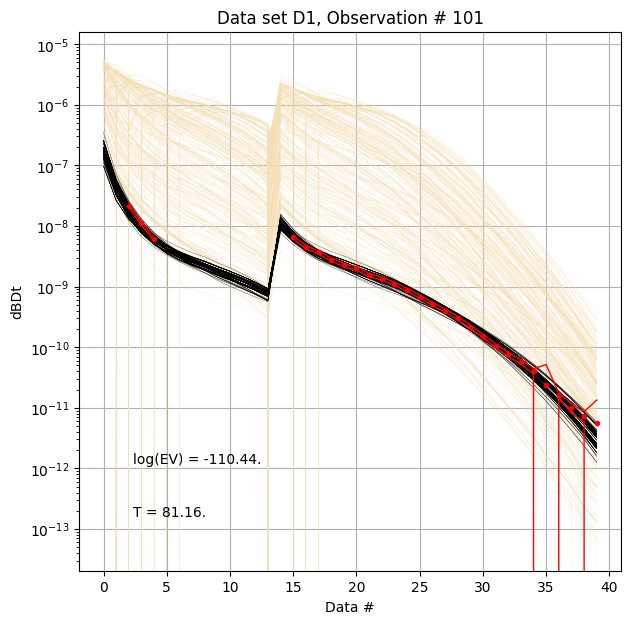

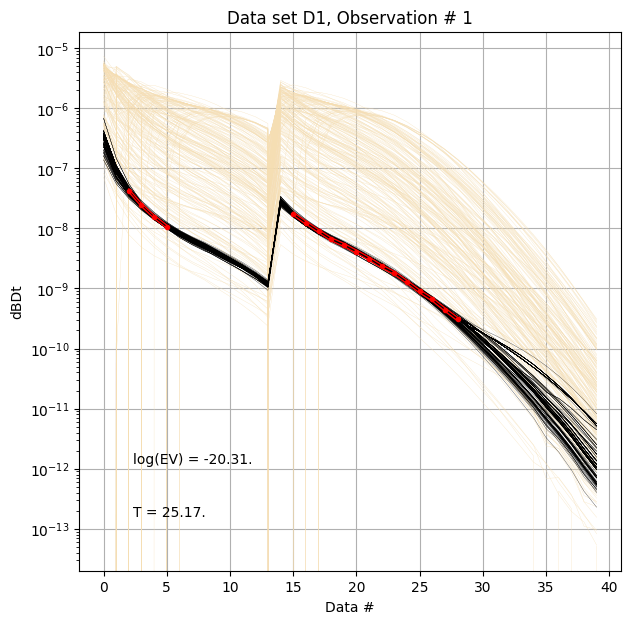

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=100, hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)

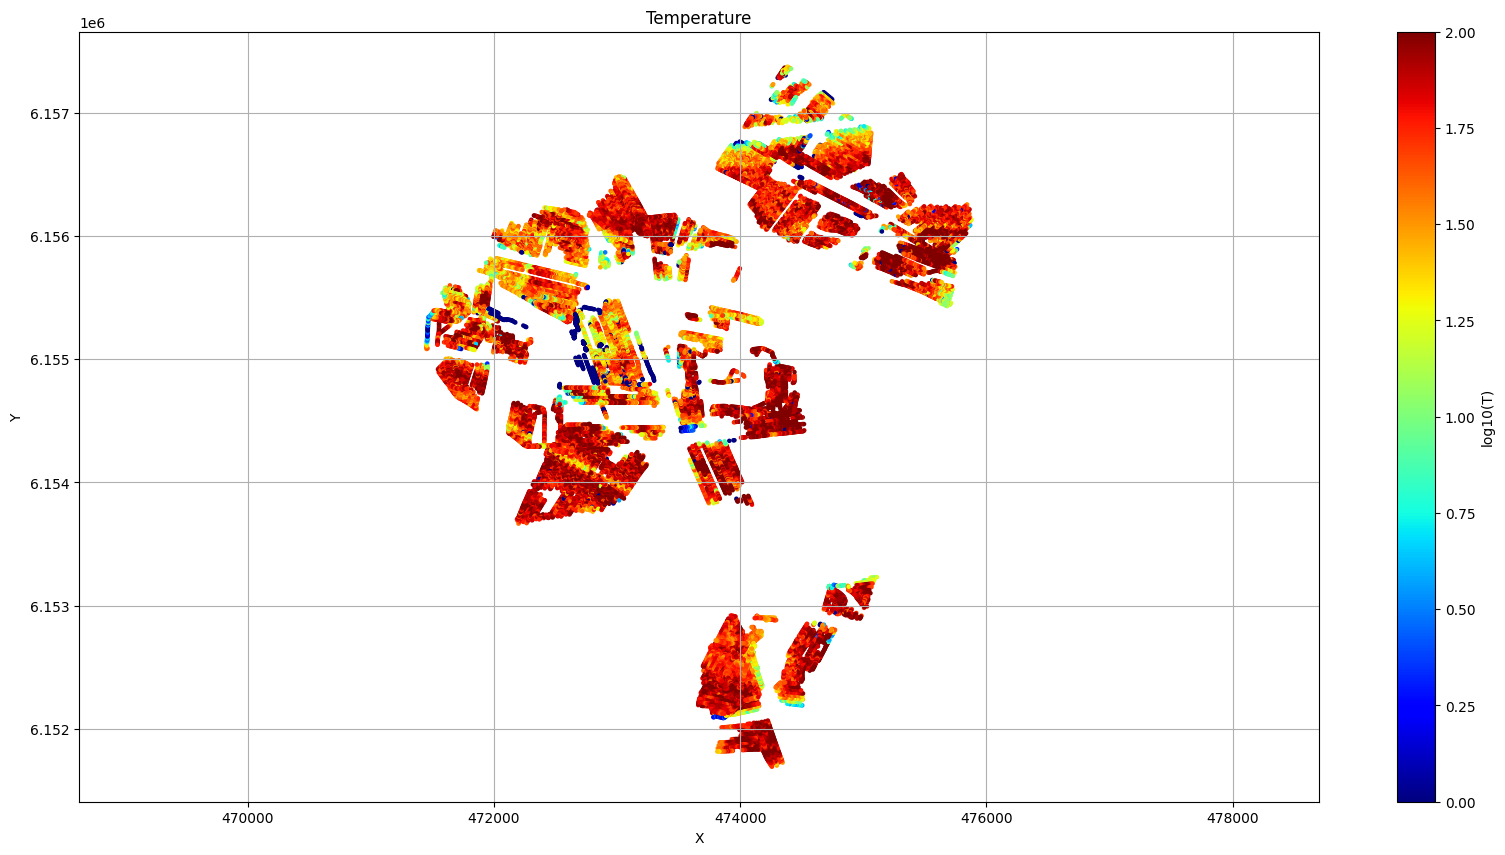

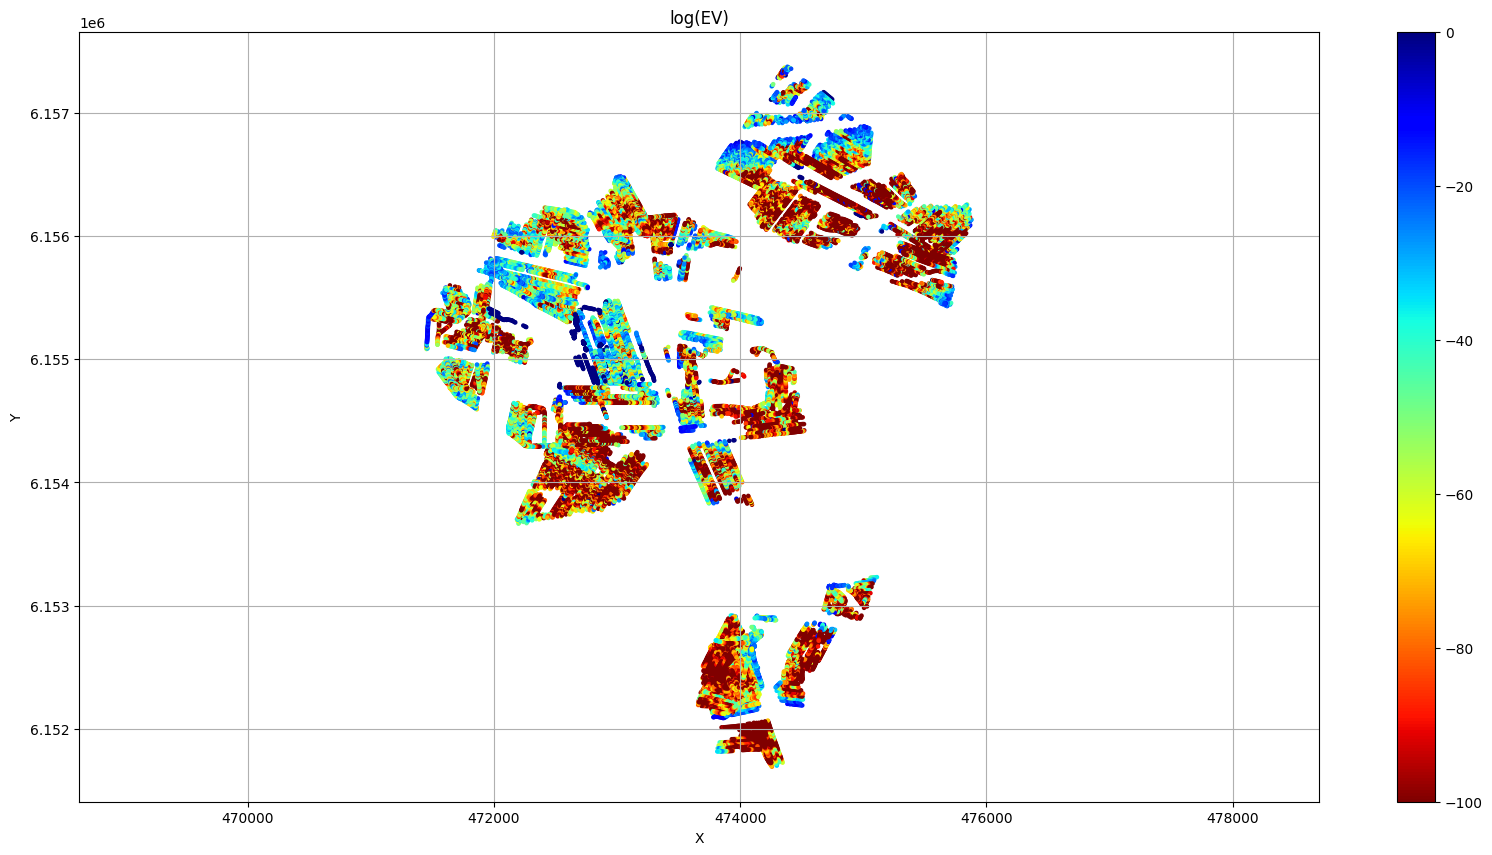

In [9]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
# Plot the evidnence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)

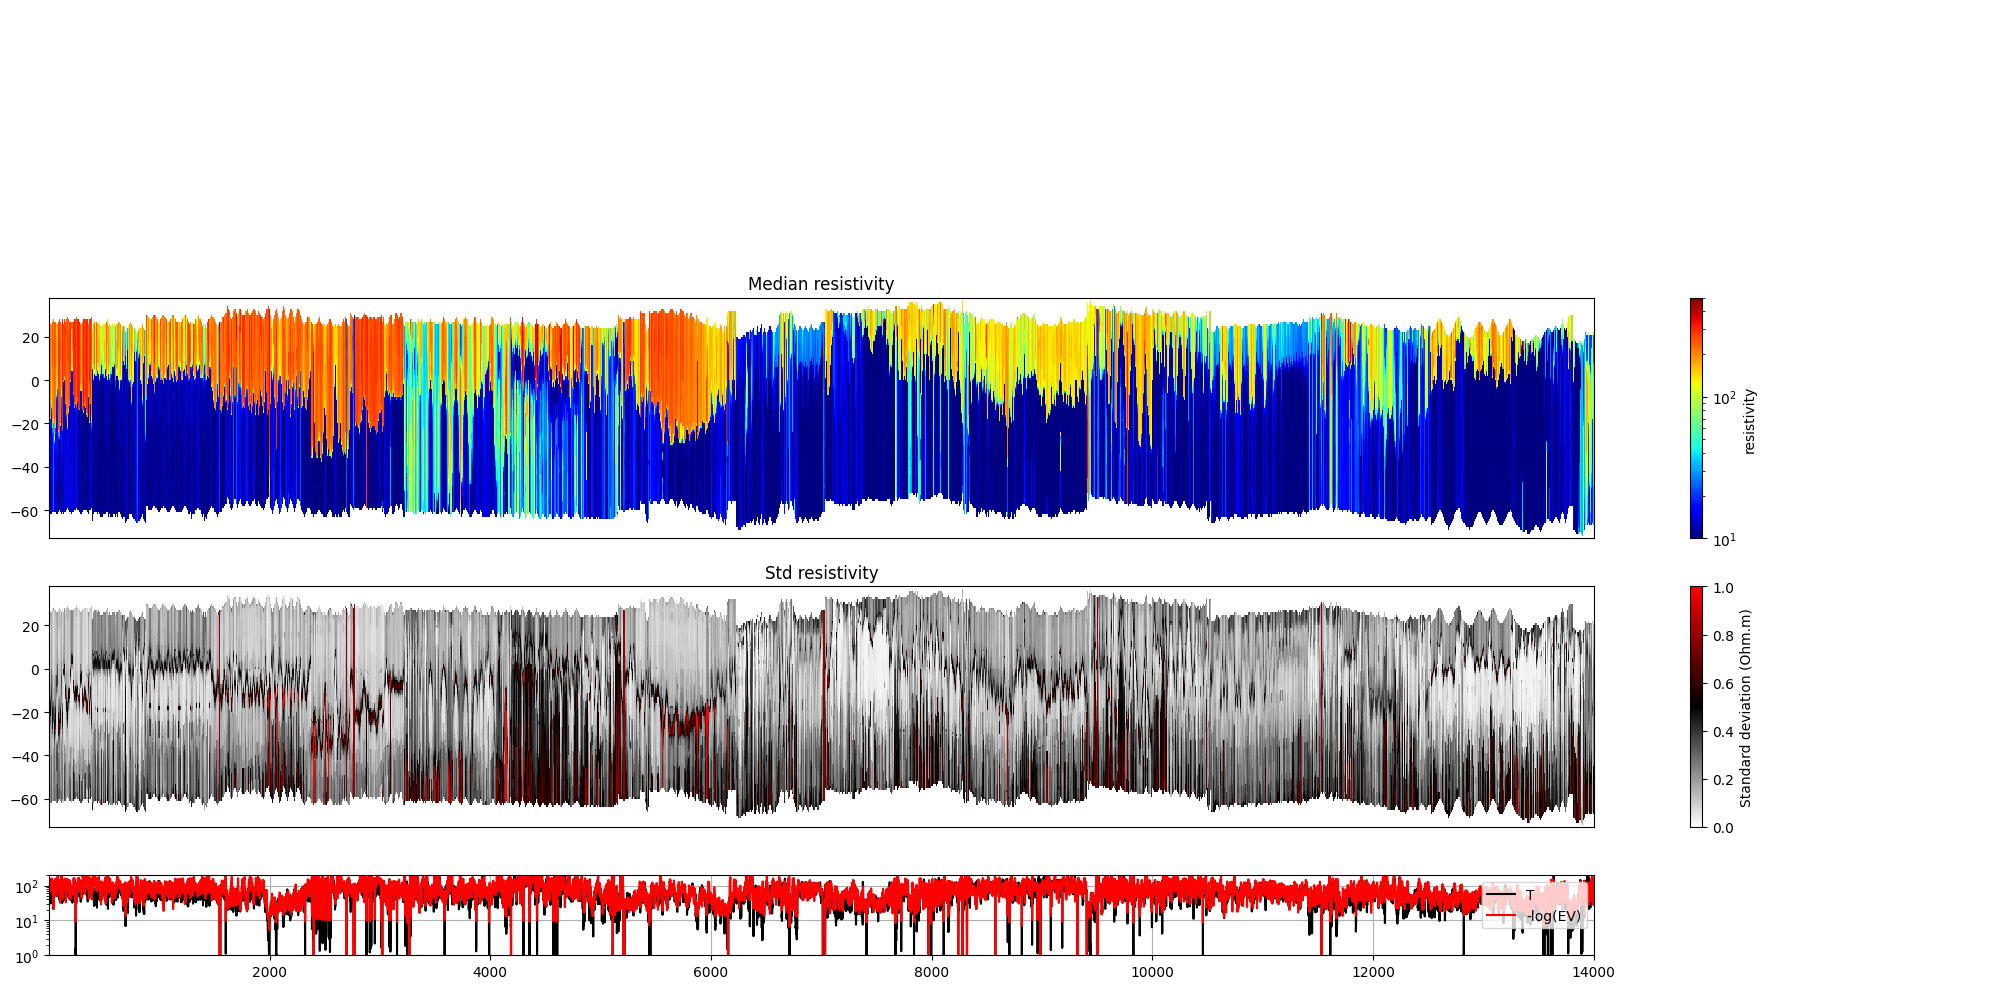

In [10]:
# find index id of data points wher LINE==1000
#i_plot= np.where( np.abs(LINE-1200)<1  )[0]
#ig.plot_profile(f_post_h5, i1=i_plot[0], i2=i_plot[-1], im=1)
ig.plot_profile(f_post_h5, i_plot=10000, i2=14000, im=1, hardcopy=hardcopy)
#ig.plot_profile(f_post_h5, i_plot=0, i2=2000, im=2)h yg sa

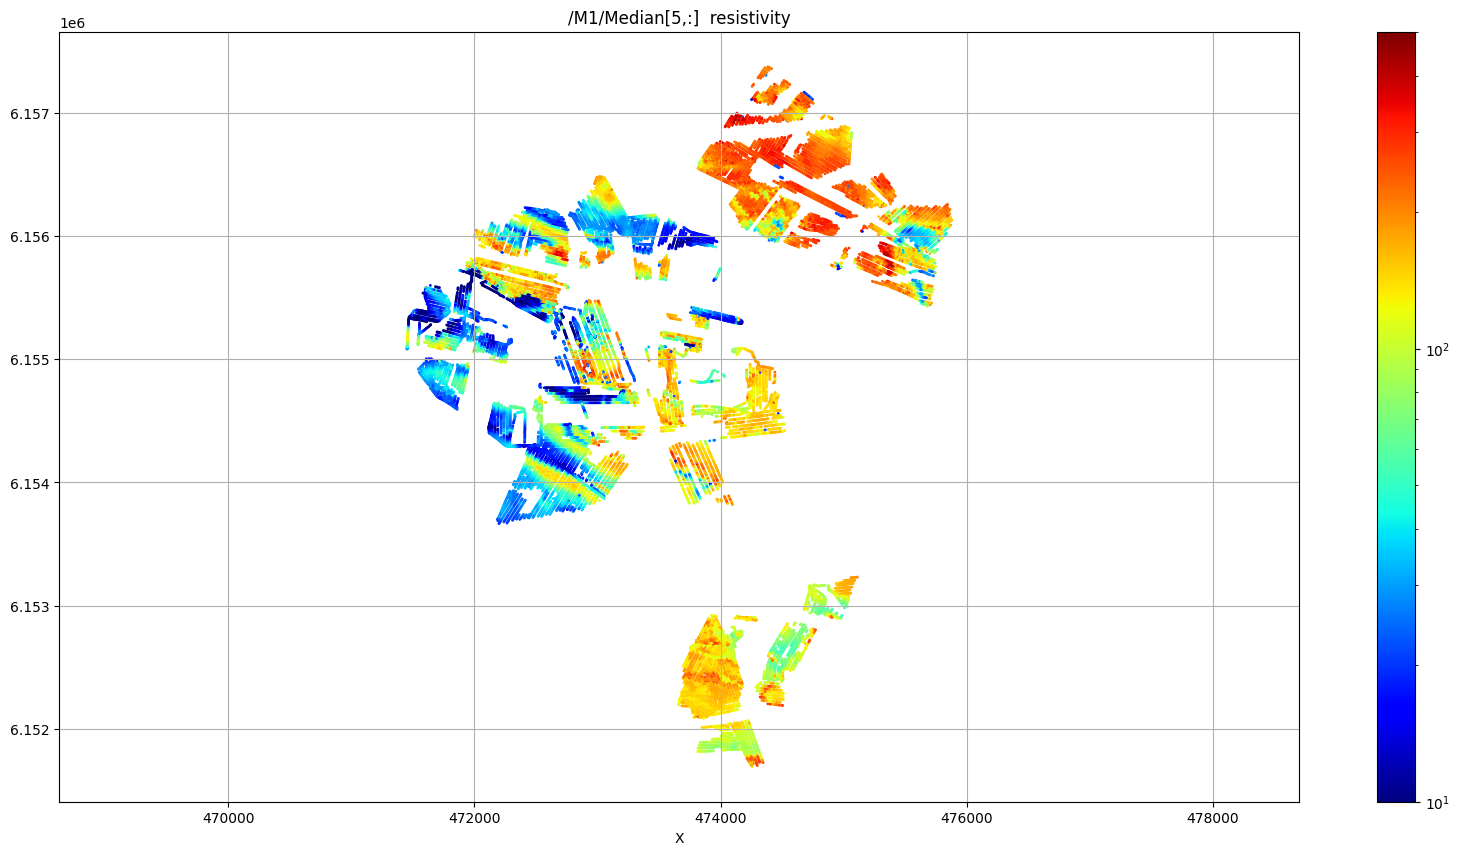

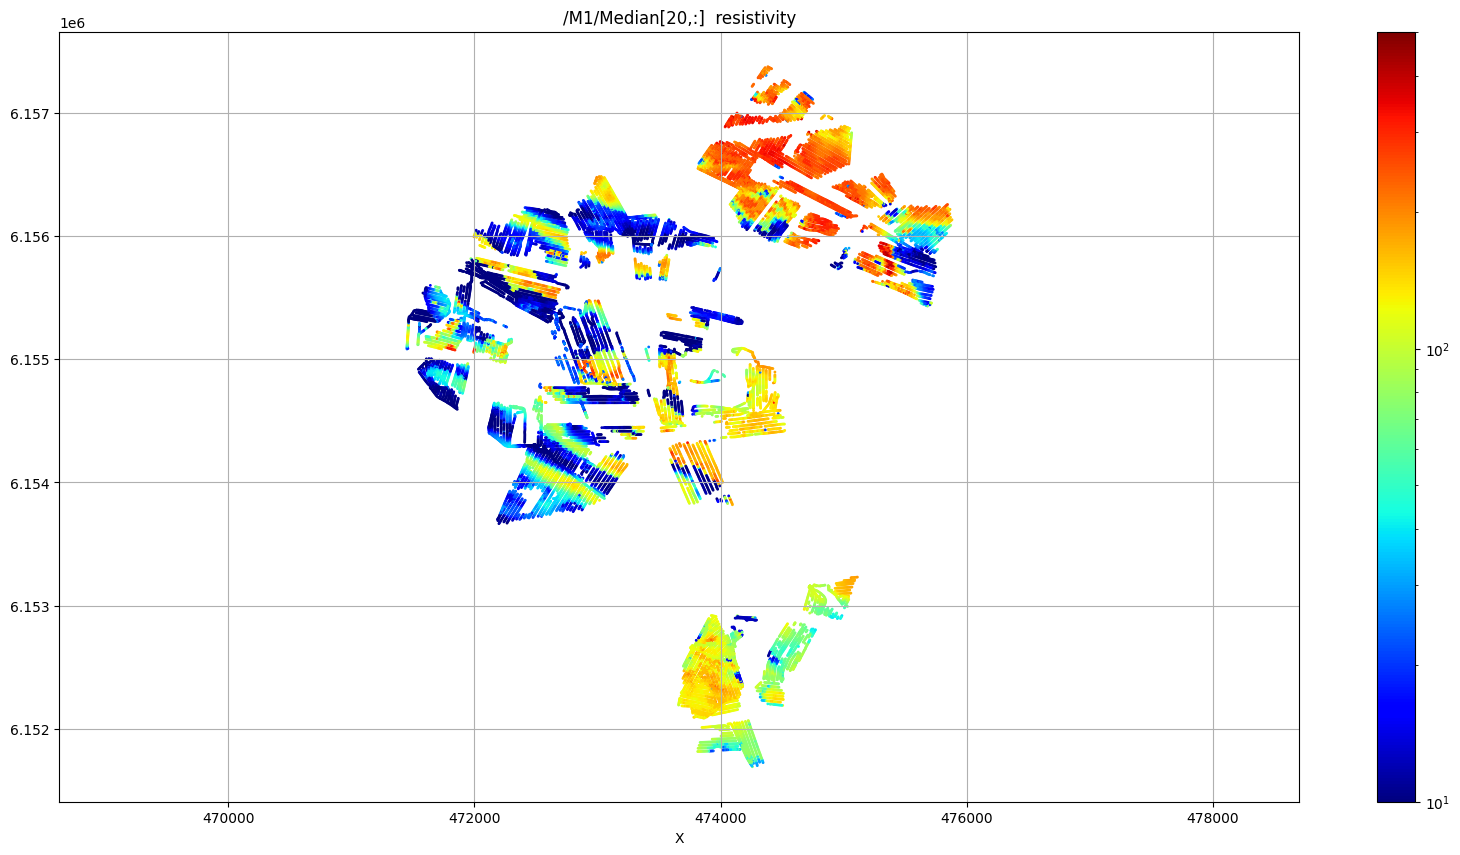

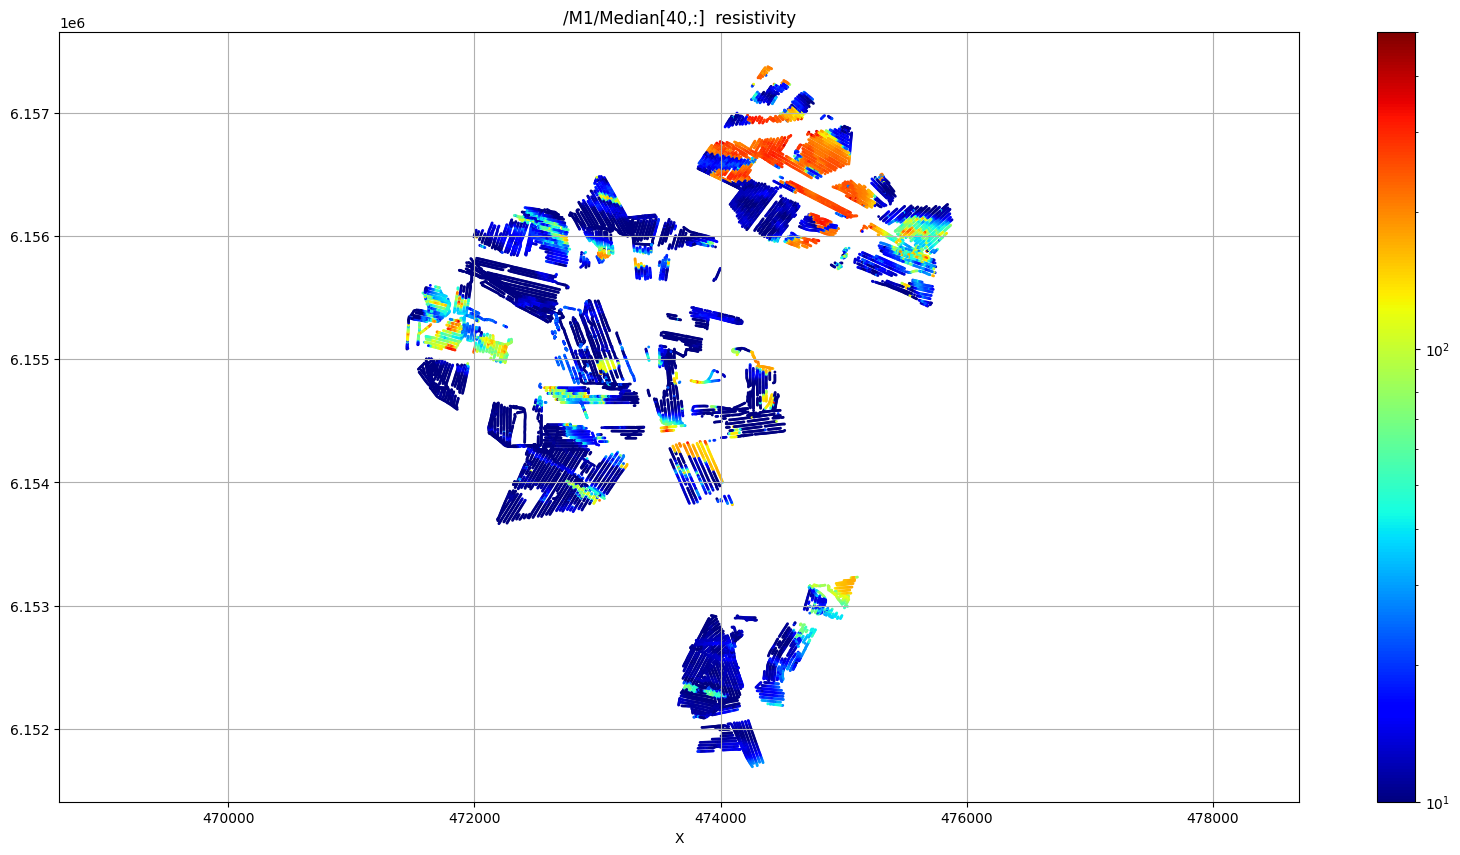

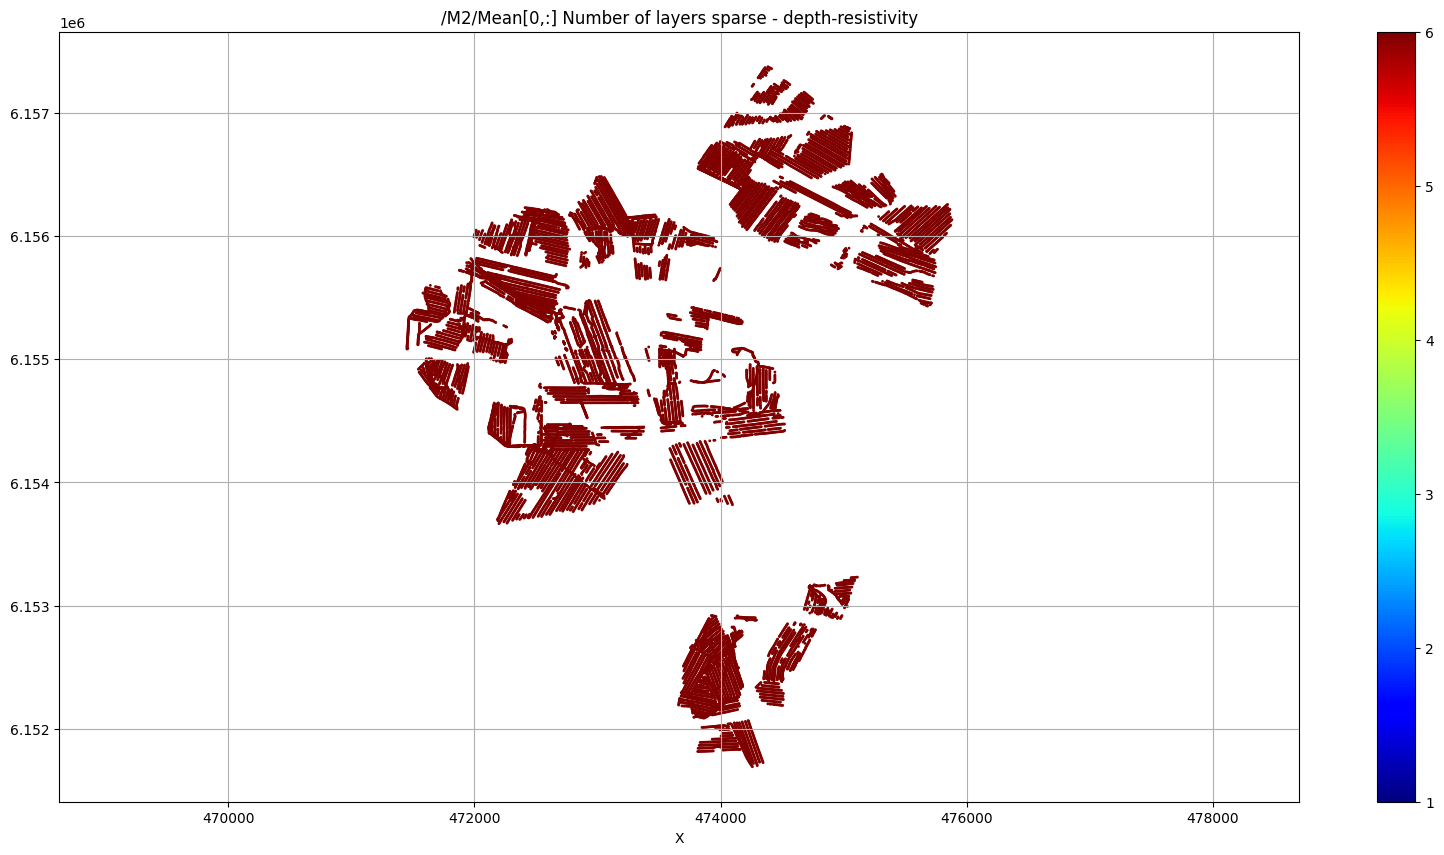

In [11]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=20, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=40, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()

#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Mean', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=1, hardcopy=hardcopy)
    plt.show()
except:
    pass

In [12]:
# f_csv, f_point_csv = ig.post_to_csv(f_post_h5)